<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

### Tutorial Group: T02
### Student Name: Reuben Yap Jing Xiang
### Student Number: S10243134

In [1]:
# import the packages

# import the pacakges
import numpy as np
import pandas as pd
import sklearn
import feature_engine

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats



#  (a) Dealing with Outliers

# dealing outliers with Winsorisation / Capping
from feature_engine.outliers import Winsorizer

# dealing outliers with Zero-coding
from feature_engine.outliers import ArbitraryOutlierCapper

# (b) Transforming Numerical Variables

# Using Scikit_learn
from sklearn.preprocessing import FunctionTransformer            # For Logarithmic, Reciprocal, Square Root, Cube Root, Power
                                                                 # transformation
    
from sklearn.preprocessing import PowerTransformer               # For Box-Cox, Yeo-Johnson Transformation
    
# Using Feature-engine
from feature_engine.transformation import LogTransformer         # For Logarithmic transformation
from feature_engine.transformation import ReciprocalTransformer  # For Reciprocal transformation
from feature_engine.transformation import PowerTransformer       # For Square Root, Cube Root, Power transformation
from feature_engine.transformation import BoxCoxTransformer      # For Box-Cox Transformation
from feature_engine.transformation import YeoJohnsonTransformer  # For Yeo-Johnson Transformation


# Train and Test Split
# to split the datasets
from sklearn.model_selection import train_test_split


# Missing Value Imputation

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import EndTailImputer
from feature_engine.imputation import RandomSampleImputer
import feature_engine.imputation as mdi
from feature_engine.imputation import CategoricalImputer


# Categorical Data Encoding

# Using Scikit_learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Using Feature-engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import RareLabelEncoder


# Variable Discretization / Binning

# Using Scikit_learn
from sklearn.preprocessing import KBinsDiscretizer

# Using Feature-engine
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser


# Feature Engine

# (a) Scaling
# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# the scalers - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

### Step 1: Load and Explore the Data

In [2]:
# Loading the circuits_mod dataset into a dataframe variable named "circuits"
circuits = pd.read_csv('./datasets/f1db_csv_mod/circuits_mod.csv')

# Loading the constructor_results_mod dataset into a dataframe variable named "constructor_results"
constructor_results = pd.read_csv('./datasets/f1db_csv_mod/constructor_results_mod.csv')

# Loading the constructor_standings_mod dataset into a dataframe variable named "constructor_standings"
constructor_standings = pd.read_csv('./datasets/f1db_csv_mod/constructor_standings_mod.csv')

# Loading the constructors_mod dataset into a dataframe variable named "constructosr"
constructors = pd.read_csv('./datasets/f1db_csv_mod/constructors_mod.csv')

# Loading the driver_standings_mod dataset into a dataframe variable named "driver_standings"
driver_standings = pd.read_csv('./datasets/f1db_csv_mod/driver_standings_mod.csv')

# Loading the drivers_mod dataset into a dataframe variable named "drivers"
drivers = pd.read_csv('./datasets/f1db_csv_mod/drivers_mod.csv')

# Loading the lap_times_mod dataset into a dataframe variable named "lap_times"
lap_times = pd.read_csv('./datasets/f1db_csv_mod/lap_times_mod.csv')

# Loading the pit_stops_mod dataset into a dataframe variable named "pit_stops"
pit_stops = pd.read_csv('./datasets/f1db_csv_mod/pit_stops_mod.csv')

# Loading the qualifying_mod dataset into a dataframe variable named "qualifying"
qualifying = pd.read_csv('./datasets/f1db_csv_mod/qualifying_mod.csv')

# Loading the races_mod dataset into a dataframe variable named "races_mod"
races = pd.read_csv('./datasets/f1db_csv_mod/races_mod.csv')

# Loading the results_mod dataset into a dataframe variable named "results_mod"
results = pd.read_csv('./datasets/f1db_csv_mod/results_mod.csv')

# Loading the seasons_mod dataset into a dataframe variable named "seasons"
seasons = pd.read_csv('./datasets/f1db_csv_mod/seasons_mod.csv')

# Loading the status_mod dataset into a dataframe variable named "status"
status = pd.read_csv('./datasets/f1db_csv_mod/status_mod.csv')

### Circuits Dataframe

In [3]:
# Displaying first 5 rows
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [4]:
# View last 5 rows
circuits.tail()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.2270,-8.6267,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.9975,11.3719,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,\N,http://en.wikipedia.org/wiki/Losail_Internatio...
78,79,miami,Miami International Autodrome,Miami,United States,25.9581,-80.2389,\N,https://en.wikipedia.org/wiki/Miami_Internatio...


#### Basic Summary of Circuits Dataframe

In [5]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(circuits.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(circuits.size)   

(79, 9)
711


#### In-depth Overview of Circuits Dataframe

In [6]:
# View number of items and data type of each column
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


### Constructor_Results Dataframe

In [7]:
# Displaying first 5 rows
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [8]:
# View last 5 rows
constructor_results.tail()

,constructorResultsId,raceId,constructorId,points,status
11945,16445,1073,214,6.0,\N
11946,16446,1073,117,0.0,\N
11947,16447,1073,210,0.0,\N
11948,16448,1073,3,0.0,\N
11949,16449,1073,51,0.0,\N


#### Basic Summary of Constructor_Results Dataframe

In [9]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(constructor_results.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(constructor_results.size)   

(11950, 5)
59750


#### In-depth Overview of Constructor_Results Dataframe

In [10]:
# View number of items and data type of each column
constructor_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11950 non-null  int64  
 1   raceId                11950 non-null  int64  
 2   constructorId         11950 non-null  int64  
 3   points                11950 non-null  float64
 4   status                11950 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 466.9+ KB


### Constuctor_Standings Dataframe

In [11]:
# Displaying first 5 rows
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [12]:
# View last 5 rows
constructor_standings.tail()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
12711,27938,1074,210,0.0,6,-,0
12712,27939,1074,1,0.0,7,-,0
12713,27940,1074,131,0.0,8,-,0
12714,27941,1074,9,0.0,9,-,0
12715,27942,1074,3,0.0,10,-,0


#### Basic Summary of Constructor_Standings Dataframe

In [13]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(constructor_standings.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(constructor_standings.size)   

(12716, 7)
89012


#### In-depth Overview of Constructor_Standings Dataframe

In [14]:
# View number of items and data type of each column
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB


### Constuctors Dataframe

In [15]:
# Displaying first 5 rows
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [16]:
# View last 5 rows
constructors.tail()

,constructorId,constructorRef,name,nationality,url
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


#### Basic Summary of Constructors Dataframe

In [17]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(constructors.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(constructors.size)   

(211, 5)
1055


#### In-depth Overview of Constructors Dataframe

In [18]:
# View number of items and data type of each column
constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


### Driver_Standings Dataframe

In [19]:
# Displaying first 5 rows
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [20]:
# View last 5 rows
driver_standings.tail()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
33389,70776,1074,840,0,16,-,0
33390,70777,1074,852,0,17,-,0
33391,70778,1074,830,0,18,-,0
33392,70779,1074,20,0,19,-,0
33393,70780,1074,855,0,20,-,0


#### Basic Summary of Driver_Standings Dataframe

In [21]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(driver_standings.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(driver_standings.size)   

(33394, 7)
233758


#### In-depth Overview of Driver_Standings Dataframe

In [22]:
# View number of items and data type of each column
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


### Drivers Dataframe

In [23]:
# Displaying first 5 rows
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [24]:
# View last 5 rows
drivers.tail()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,\N,ZHO,Guanyu,Zhou,1999-05-30,Chinese,https://en.wikipedia.org/wiki/Guanyu_Zhou


#### Basic Summary of Drivers Dataframe

In [25]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(drivers.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(drivers.size)   

(854, 9)
7686


#### In-depth Overview of Drivers Dataframe

In [26]:
# View number of items and data type of each column
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


### Lap_Times Dataframe

In [27]:
# Displaying first 5 rows
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [28]:
# View last 5 rows
lap_times.tail()

,raceId,driverId,lap,position,time,milliseconds
514587,1073,847,22,15,1:30.821,90821
514588,1073,847,23,15,1:30.647,90647
514589,1073,847,24,14,1:31.577,91577
514590,1073,847,25,16,1:32.794,92794
514591,1073,847,26,18,2:46.262,166262


#### Basic Summary of Lap_Times Dataframe

In [29]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(lap_times.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(lap_times.size)   

(514592, 6)
3087552


#### In-depth Overview of Lap_Times Dataframe

In [30]:
# View number of items and data type of each column
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB


### Pit_Stops Dataframe

In [31]:
# Displaying first 5 rows
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [32]:
# View last 5 rows
pit_stops.tail()

,raceId,driverId,stop,lap,time,duration,milliseconds
8823,1073,840,2,52,18:22:55,22.661,22661
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909
8827,1073,842,2,54,18:25:56,21.920,21920


#### Basic Summary of Pit_Stops Dataframe

In [33]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(pit_stops.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(pit_stops.size)   

(8828, 7)
61796


#### In-depth Overview of Pit_Stops Dataframe

In [34]:
# View number of items and data type of each column
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8828 non-null   int64 
 1   driverId      8828 non-null   int64 
 2   stop          8828 non-null   int64 
 3   lap           8828 non-null   int64 
 4   time          8828 non-null   object
 5   duration      8828 non-null   object
 6   milliseconds  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB


### Qualifying Dataframe

In [35]:
# Displaying first 5 rows
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [36]:
# View last 5 rows
qualifying.tail()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
9130,9171,1073,849,3,6,16,1:24.338,\N,\N
9131,9172,1073,847,3,63,17,1:24.423,\N,\N
9132,9173,1073,8,51,7,18,1:24.779,\N,\N
9133,9174,1073,854,210,47,19,1:24.906,\N,\N
9134,9175,1073,853,210,9,20,1:25.685,\N,\N


#### Basic Summary of Qualifying Dataframe

In [37]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(qualifying.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(qualifying.size)   

(9135, 9)
82215


#### In-depth Overview of Qualifying Dataframe

In [38]:
# View number of items and data type of each column
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB


### Races Dataframe

In [39]:
# Displaying first 5 rows
races.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [40]:
# View last 5 rows
races.tail()

,raceId,round,circuitId,name,date,time,url
1075,1092,19,22,Japanese Grand Prix,10/9/2022,5:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076,1093,20,69,United States Grand Prix,10/23/2022,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...
1077,1094,21,32,Mexico City Grand Prix,10/30/2022,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078,1095,22,18,São Paulo Grand Prix,11/13/2022,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...
1079,1096,23,24,Abu Dhabi Grand Prix,11/20/2022,13:00:00,https://en.wikipedia.org/wiki/2022_Abu_Dhabi_G...


#### Basic Summary of Races Dataframe

In [41]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(races.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(races.size)   

(1080, 7)
7560


#### In-depth Overview of Races Dataframe

In [42]:
# View number of items and data type of each column
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


### Results Data

In [43]:
# Displaying first 5 rows
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [44]:
# View last 5 rows
results.tail()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,01:26.4,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,01:29.3,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,01:29.4,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,01:30.6,209.732,6
25398,25404,1073,8,51,7,18,\N,R,19,0.0,25,\N,\N,23,18,01:29.7,211.951,23


#### Basic Summary of Results Dataframe

In [45]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(results.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(results.size)   

(25399, 18)
457182


#### In-depth Overview of Results Dataframe

In [46]:
# View number of items and data type of each column
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

### Seasons Dataframe

In [47]:
# Displaying first 5 rows
seasons.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


In [48]:
# View last 5 rows
seasons.tail()

,year,url
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...
71,2021,https://en.wikipedia.org/wiki/2021_Formula_One...
72,2022,https://en.wikipedia.org/wiki/2022_Formula_One...


#### Basic Summary of Seasons Dataframe

In [49]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(seasons.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(seasons.size)   

(73, 2)
146


#### In-depth Overview of Seasons Dataframe

In [50]:
# View number of items and data type of each column
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    73 non-null     int64 
 1   url     73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


### Status Dataframe

In [51]:
# Displaying first 5 rows
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [52]:
# View last 5 rows
status.tail()

,statusId,status
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris
136,139,Illness


#### Basic Summary of Status Dataframe

In [53]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(status.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(status.size)   

(137, 2)
274


#### In-depth Overview of Status Dataframe

In [54]:
# View number of items and data type of each column
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


## Formulating My Prediction Problem

After exploring the given datasets and understanding the given datasets, my prediction problem is...

"Predicting the Lap Number of the First Pit Stop made by each drivers at a particular Circuit."

It will be a Regression problem.

## Rationale of Prediction Problem

Using the above mentioned prediction problem, a constructor is then able to understand the properties of drivers and circuits which play a key role in determining the Lap Number of the First Pit Stop made by Drivers.


## Tables that I would be using to solve the problem

I would be using information from 4 tables to solve the above mentioned Regression Problem and they are:

1. circuits_mod

2. drivers_mod

3. pit_stops_mod

4. races_mod


This is because these 4 tables contains useful information that helps to answer the Prediction Problem as stated above.

### Step 2: Data Wrangling on multiple tables 

I need to do this step to combine all the selected 4 dataframes into one dataframe to answer my Prediction Problem.

## 2.1. Subsetting, Grouping and Filtering Tables

Before I combine all the selected 4 dataframes into one dataframe, I need to subset, group and filter the necessary dataframes. 

### 2.1.1. Subsetting

I would not be subsetting any of the 4 dataframes as I would be using all the rows in each of the 4 dataframe.

### 2.1.2. Grouping

Similarly, I would not be grouping any of the 4 dataframes because...

1. My Prediction Problem is a Regression Problem. 


2. It is not neccessary to group data by values in columns to get information about that Group. I do not need information of a particular Group. This is because I am most likely not going use the grouping results to get information of a particular Group.


### 2.1.3. Filtering

I would be filtering one of the 4 dataframes.

According to my Prediction Problem, I am predicting the Lap Number of the First Pit Stop made by each drivers and their respective Constructors (Decision for the driver to pit is made by their Constructors) at a particular Circuit. With that, it is necessary for me to filter tables.

I need to filter the pit_stops mod table. I would be filtering out the rows of data in pit_stops_mod table that are not of First Pit Stop. (i.e. excluding rows with stop Column != 1 in pit_stops_mod table)

After filtering, I would then have rows of data in pit_stops_mod table that are only of First Pit Stop (i.e. getting rows with stop Column = 1 in pit_stops_mod table). With that, I am able to answer my Prediction Problem and obtain accurate results for my Prediction Problem.

### Filtering Pit_Stops Dataframe

In [55]:
# Getting rows in pit_stops dataframe that are of First Pit Stop.
first_pit_stops = pit_stops[pit_stops['stop']==1]

# Displaying the result
first_pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8812,1073,20,1,23,17:38:23,21.221,21221
8813,1073,849,1,28,17:46:18,21.241,21241
8814,1073,822,1,30,17:48:30,21.669,21669
8818,1073,4,1,36,17:58:06,21.304,21304


I would now be using First_Pit_Stops Dataframe instead of Pit_Stop Dataframe.

## 2.2. Concatenation, Merging and Joining Tables

After subsetting, grouping and filtering the necessary dataframes, I am now going to combine all the selected 4 dataframes into one dataframe.

There are 3 ways to combine multiple dataframes into one dataframe and they are:

1) Concatenation

2) Merging

3) Joining

### 2.2.1. Concatenation

There are 2 types of Concatenation and they are:

1) Vertical

2) Horizontal

#### 2.2.1.1. Vertical Concatenation

I would not be vertically concatenating any of the 4 dataframes with another dataframe because all 4 dataframes have a different type of dataframe (i.e Different Number of Columns, Different Column Names, etc). With that, I am unable to vertically concatenating any of the 4 dataframes with another dataframe.

#### 2.2.1.2. Horizontal Concatenation

It is possible to horizontally concatenate all 4 dataframes into a single dataframe. However, if I were to horizontally concatenate all 4 dataframes into a single dataframe,

1. There would be NaN values for columns that a partcular dataframe do not have data on. This is because some dataframes have certain columns that other dataframes do not, where these columns would contain values. This is due to, similar explanation as mentioned earlier, all 4 dataframes having different types of dataframe (i.e Different Number of Columns, Different Column Names, etc). 


2. There would be many NaN values in each row which is not recommended.


3. There would be many NaN values in each column which is not recommended.


4. There would be many NaN values in the entire final dataframe which is not recommended.


5. There would be a repetition of Column Names in the final dataframe. This is because some dataframes have the same Column Name as another column in another dataframe. 


6. Continuing from point 5, it also means that values that are originally in the same column of same Column Name are now placed in different columns of the same Column Name. It would be better if all values from the same Column Name are in the same column. This so that I can get a more accurate result for my Prediction Problem.


7. There would be a tedious and time-consuming Data Cleaning process later on. This is due to, the things that I mentioned earlier, the many NaN values in each row, the many NaN values in each column, the many NaN values in the entire final dataframe, the repetition of Column Names, the values being placed in different columns of the same Column Name. With that, I would have to spend many hours typing codes to solve these errors for my Data Cleaning process. I would not want to do that.


Lastly, the dataframes seems to be related to one another in a way. This is because as mentioned earlier, some dataframes have the same Column Name as another column in another dataframe. In addition, according to the given data dictionary for all the give datasets in f1_db_data_dictionary file, certain dataframes are indeed related to one another. This is because the data dictionary lists the Primary Key for each dataframe and Foreign Keys that are relating to another dataframe. 


Thus, with all the disadvantages of Horizontal Concatenation as mentioned earlier and the fact that all 4 dataframes are related in a way, it is not ideal to horizontally concatenate all 4 dataframes into a single dataframe. It is better to use another way to combine all these 4 dataframe into one final dataframe.

Therefore, I would not be horizontally concatenating all 4 dataframes into a single dataframe.

### 2.2.2. Merging

Merging combines tables together based on a selected ID column.

With that, Merging is a suitable way to combine the selected 6 dataframes. It is suitable because as mentioned earlier in section 2.2.1.2., the 4 dataframes are related to one another in a way. There are some dataframes that have the same Column Name as another column in another dataframe. Thus, the dataframes with the same Column Name are able to merge with each other.

In addition, there are a few advantages of using Merging as compared to Horizontal Concatenation to combine the selected 4 dataframes and they are:

1. Having lesser NaN values in the Final Dataframe

2. Having no repetition of Column Names in the final dataframe

3. Having all values from the same Column Name in the same column

4. Having an easier Data Cleaning process

Therefore, I would be using Merging to combine all the selected 4 dataframes into one dataframe. 

### Primary Key and Foriegn Keys in Each Selected 4 Dataframe

As mentioned earlier, Merging combines tables together based on same Column Names. Thus, it is important to know the Primary Key and Foreign Keys in each Dataframe to know the common Column Names between dataframes.

The Primary and Foreign Keys in Each selected 4 Dataframe given by f1_db_data_dictionary file are as shown below:

1. Circuits Dataframe
  - Primary Key: circuitId
   
   
2. Drivers Dataframe
  - Primary Key: driverId
  
  
3. First_Pit_Stops Dataframe
  - Primary Key: raceId
  - Foreign Key: driverId
  

4. Races Dataframe
  - Primary Key: raceId
  - Foreign Key: year, circuitId
 

### Relationships among the Selected 4 Dataframes

After knowing the Primary Key and Foreign Keys in each selected 4 Dataframe, I now know the common Column Names between dataframes. 

After knowing the common Column Names between dataframes, I need to identify all the relationships among the selected 4 dataframes. This is so I that know the different dataframes that I can merge with for each Dataframe.

The relationships among the selected 4 Dataframes and their respective connecting Column Names are as shown below:

1. Circuits Dataframe
  - Relationship with Races Dataframe by circuitId
  
  
2. Drivers Dataframe
  - Relationship with First_Pit_Stops Dataframe by driverId
  
  
3. First_Pit_Stops Dataframe
  - Relationship with Races Dataframe by raceId
  - Relationship with Drivers Dataframe by driverId


4. Races Dataframe
  - Relationship with First_Pit_Stops Dataframe by raceId
  - Relationship with Circuits Dataframe by circuitId
  

### Finalised Way to Merge the Selected 4 Dataframes

After looking at all relationships among the Selected 4 Dataframes, I have found a way to merge all 4 Dataframes correctly.

The way to merge all 4 Dataframes corectly is as shown below:

1. Merge Drivers Dataframe to First_Pit_Stop Dataframe by driverId

2. Merge First_Pit_Stops Dataframe to Races Dataframe by raceId

3. Merge Circuits Dataframe to Races Dataframe by circuitId

### Merging Drivers Dataframe to First_Pit_Stops Dataframe by driverId

In [56]:
# Merging Drivers Dataframe to First_Pit_Stop Dataframe by driverId
first_pit_stops = pd.merge(first_pit_stops,drivers,on='driverId',how='inner').drop_duplicates()
first_pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url
0,841,153,1,1,17:05:23,26.898,26898,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
1,842,153,1,16,16:32:25,23.584,23584,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
2,843,153,1,9,15:19:36,22.419,22419,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
3,844,153,1,13,15:24:25,22.713,22713,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
4,845,153,1,11,14:20:28,20.741,20741,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,1069,853,1,1,14:05:35,30.673,30673,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
4285,1070,853,1,13,13:24:11,25.094,25094,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
4286,1071,853,1,7,14:12:56,17.995,17995,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
4287,1051,853,1,31,17:51:36,26.515,26515,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


### Merging First_Pit_Stops Dataframe to Races Dataframe by raceId

In [57]:
# Merging First_Pit_Stops Dataframe to Races Dataframe by raceId
races = pd.merge(races,first_pit_stops,on='raceId',how='inner').drop_duplicates()
races

,raceId,round,circuitId,name,date,time_x,url_x,driverId,stop,lap,...,duration,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url_y
0,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,153,1,1,...,26.898,26898,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
1,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,30,1,1,...,25.021,25021,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
2,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,17,1,11,...,23.426,23426,webber,\N,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
3,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,4,1,12,...,23.251,23251,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,13,1,13,...,23.842,23842,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,1073,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00,http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...,844,1,15,...,22.461,22461,leclerc,16,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc
4285,1073,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00,http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...,846,1,17,...,21.380,21380,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
4286,1073,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00,http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...,849,1,28,...,21.241,21241,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi
4287,1073,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00,http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...,854,1,10,...,22.124,22124,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


### Merging Circuits Dataframe to Races Dataframe by circuitId

In [58]:
# Merging Circuits Dataframe to Races Dataframe by circuitId
final_merge = pd.merge(races,circuits,on='circuitId',how='inner').drop_duplicates()
final_merge

,raceId,round,circuitId,name_x,date,time_x,url_x,driverId,stop,lap,...,nationality,url_y,circuitRef,name_y,location,country,lat,lng,alt,url
0,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,153,1,1,...,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,30,1,1,...,German,http://en.wikipedia.org/wiki/Michael_Schumacher,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,17,1,11,...,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,4,1,12,...,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,13,1,13,...,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,846,1,10,...,British,http://en.wikipedia.org/wiki/Lando_Norris,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
4285,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,847,1,9,...,British,http://en.wikipedia.org/wiki/George_Russell_%2...,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
4286,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,849,1,10,...,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
4287,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,852,1,13,...,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...


With that, I am done combining all the selected 4 dataframes into one dataframe.

### 2.2.3. Joining

Joining combines tables together based on their index. 

Both join and merge can be used to combines two dataframes but the join method combines two dataframes on the basis of their indexes whereas the merge method is more versatile and allows us to specify columns beside the index to join on for both dataframes.

For me, I decided to use Merging instead of Joining to combine all the selected 4 dataframes into one dataframe because...

1. Codes for Merging is more easier to understand

2. There is a need to set the Indexes for dataframes when using Joining

Since I have already combine all 4 dataframes into one dataframe, I would not be using doing Joining to combine all the selected 4 dataframes into one dataframe.

### Final Combined Dataframe of the Selected 4 Dataframes

My Final Combined Dataframe of the Selected 4 Dataframes is now stored in 'final_merge' variable. From now on, I would be using 'final_merge'.

## 2.3. Combined Dataframe Preprocessing

In [59]:
# Displaying first 5 rows
final_merge.head()

,raceId,round,circuitId,name_x,date,time_x,url_x,driverId,stop,lap,...,nationality,url_y,circuitRef,name_y,location,country,lat,lng,alt,url
0,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,153,1,1,...,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,30,1,1,...,German,http://en.wikipedia.org/wiki/Michael_Schumacher,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,17,1,11,...,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,4,1,12,...,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,841,1,1,Australian Grand Prix,3/27/2011,6:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,13,1,13,...,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [60]:
# View last 5 rows
final_merge.tail()

,raceId,round,circuitId,name_x,date,time_x,url_x,driverId,stop,lap,...,nationality,url_y,circuitRef,name_y,location,country,lat,lng,alt,url
4284,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,846,1,10,...,British,http://en.wikipedia.org/wiki/Lando_Norris,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
4285,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,847,1,9,...,British,http://en.wikipedia.org/wiki/George_Russell_%2...,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
4286,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,849,1,10,...,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
4287,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,852,1,13,...,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
4288,1072,21,77,Saudi Arabian Grand Prix,12/5/2021,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,853,1,13,...,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.5433,39.1728,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...


#### Basic Summary of Combined Dataframe

In [61]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(final_merge.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(final_merge.size)   

(4289, 29)
124381


#### In-depth Overview of Combined Dataframe

In [62]:
# View number of items and data type of each column
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 4288
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   raceId        4289 non-null   int64  
 1   round         4289 non-null   int64  
 2   circuitId     4289 non-null   int64  
 3   name_x        4289 non-null   object 
 4   date          4156 non-null   object 
 5   time_x        4289 non-null   object 
 6   url_x         4289 non-null   object 
 7   driverId      4289 non-null   int64  
 8   stop          4289 non-null   int64  
 9   lap           4289 non-null   int64  
 10  time_y        4289 non-null   object 
 11  duration      4289 non-null   object 
 12  milliseconds  4289 non-null   int64  
 13  driverRef     4289 non-null   object 
 14  number        4289 non-null   object 
 15  code          4289 non-null   object 
 16  forename      4289 non-null   object 
 17  surname       4289 non-null   object 
 18  dob           4289 non-null 

### 2.3.1. Dropping Columns

I would be dropping columns that does not affect the Lap Number of the First Pit Stop made by Drivers for each circuit.

In [63]:
# Dropping raceId Column
final_merge = final_merge.drop(['raceId'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping round Column
final_merge = final_merge.drop(['round'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping circuitId Column
final_merge = final_merge.drop(['circuitId'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping date Column
final_merge = final_merge.drop(['date'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping time_x Column
final_merge = final_merge.drop(['time_x'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping url_x Column
final_merge = final_merge.drop(['url_x'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping driverId Column
final_merge = final_merge.drop(['driverId'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping stop Column
final_merge = final_merge.drop(['stop'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping time_y Column
final_merge = final_merge.drop(['time_y'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping duration Column
final_merge = final_merge.drop(['duration'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping miliseconds Column
final_merge = final_merge.drop(['milliseconds'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping driverRef Column
final_merge = final_merge.drop(['driverRef'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping number Column
final_merge = final_merge.drop(['number'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping code Column
final_merge = final_merge.drop(['code'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping dob Column
final_merge = final_merge.drop(['dob'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping nationality Column
final_merge = final_merge.drop(['nationality'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping url_y Column
final_merge = final_merge.drop(['url_y'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping circuitRef Column
final_merge = final_merge.drop(['circuitRef'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping url Column
final_merge = final_merge.drop(['url'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'


final_merge.head()

,name_x,lap,forename,surname,name_y,location,country,lat,lng,alt
0,Australian Grand Prix,1,Jaime,Alguersuari,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
1,Australian Grand Prix,1,Michael,Schumacher,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
2,Australian Grand Prix,11,Mark,Webber,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
3,Australian Grand Prix,12,Fernando,Alonso,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
4,Australian Grand Prix,13,Felipe,Massa,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10


### 2.3.2. Renaming Columns

I would be renaming those columns where the Column Names does not make sense.

In [64]:
# Renaming Column Name name_x and name_y

final_merge = final_merge.rename(columns={'name_x': 'race_name', 'name_y': 'circuit_name'})
final_merge.head()

,race_name,lap,forename,surname,circuit_name,location,country,lat,lng,alt
0,Australian Grand Prix,1,Jaime,Alguersuari,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
1,Australian Grand Prix,1,Michael,Schumacher,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
2,Australian Grand Prix,11,Mark,Webber,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
3,Australian Grand Prix,12,Fernando,Alonso,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
4,Australian Grand Prix,13,Felipe,Massa,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10


### 2.3.3. Combining Columns

I would be combining forename Column and surname Column as both represents a driver's name. Afterwards, I would drop forename and surname Columns.

In [65]:
# Combining forename and surname Columns into driver_name
final_merge['driver_name'] = final_merge['forename'] + ' ' +final_merge['surname']
final_merge.head()

,race_name,lap,forename,surname,circuit_name,location,country,lat,lng,alt,driver_name
0,Australian Grand Prix,1,Jaime,Alguersuari,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Jaime Alguersuari
1,Australian Grand Prix,1,Michael,Schumacher,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Michael Schumacher
2,Australian Grand Prix,11,Mark,Webber,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Mark Webber
3,Australian Grand Prix,12,Fernando,Alonso,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Fernando Alonso
4,Australian Grand Prix,13,Felipe,Massa,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Felipe Massa


In [66]:
# Dropping forename Column
final_merge = final_merge.drop(['forename'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

# Dropping surname Column
final_merge = final_merge.drop(['surname'], axis=1)  # axis values: 0 to drop rows, 1 to drop columns. Default is 0.'

final_merge.head()

,race_name,lap,circuit_name,location,country,lat,lng,alt,driver_name
0,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Jaime Alguersuari
1,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Michael Schumacher
2,Australian Grand Prix,11,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Mark Webber
3,Australian Grand Prix,12,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Fernando Alonso
4,Australian Grand Prix,13,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,Felipe Massa


## 2.4. Create Features with Transactional Data or Time Series Data

Since my dataframe do not contain any Transactional Data or Time Series Data, this section does not apply to me.


## 2.5. Applying Mathematical Calculations to Features

Similarly, since my dataframe do not contain any Transactional Data or Time Series Data, this section does not apply to me.

## 2.6. Extract Features from Unstructured Data


Since my dataframe do not contain any Transactional Data or Time Series Data, this section does not apply to me.


### Step 3: Data Cleansing and Transformation

## 3.1. Data Cleansing

### 3.1.1. Identifying Variable Types

#### Checking Data Types of Different Columns

In [67]:
# print variable types
print(final_merge.dtypes)

race_name        object
lap               int64
circuit_name     object
location         object
country          object
lat             float64
lng             float64
alt              object
driver_name      object
dtype: object


In [68]:
# Check the number of variables storing a partcular data type
final_merge.dtypes.value_counts()

object     6
float64    2
int64      1
dtype: int64

### 3.1.2. Quantifying Missing Data / Null Values

Missing data occurs when no data is stored for certain observations within a variable. In other words, missing data is the absence of values, and is a common occurrence in most data sets.

I will now be quantifying and visualizing missing information in all variables.

In [69]:
# Check for null values in each column
final_merge.isnull().any()

race_name       False
lap             False
circuit_name    False
location        False
country         False
lat             False
lng             False
alt             False
driver_name     False
dtype: bool

In [70]:
# Check the number of null values in data
final_merge.isnull().sum()

race_name       0
lap             0
circuit_name    0
location        0
country         0
lat             0
lng             0
alt             0
driver_name     0
dtype: int64

### 3.1.3. Determining Cardinality

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [71]:
# Viewing the number of unique values in each variable
final_merge.nunique()

# Note: nunique() ignores missing data by default

race_name       38
lap             54
circuit_name    33
location        33
country         29
lat             33
lng             33
alt             31
driver_name     68
dtype: int64

In [72]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

final_merge.nunique(dropna=False)

race_name       38
lap             54
circuit_name    33
location        33
country         29
lat             33
lng             33
alt             31
driver_name     68
dtype: int64

### Inspecting Unique Categories in Each Variable

In [73]:
# For Variable 'race_name'
final_merge['race_name'].sort_values().unique()

array(['70th Anniversary Grand Prix', 'Abu Dhabi Grand Prix',
       'Australian Grand Prix', 'Austrian Grand Prix',
       'Azerbaijan Grand Prix', 'Bahrain Grand Prix',
       'Belgian Grand Prix', 'Brazilian Grand Prix', 'British Grand Prix',
       'Canadian Grand Prix', 'Chinese Grand Prix', 'Dutch Grand Prix',
       'Eifel Grand Prix', 'Emilia Romagna Grand Prix',
       'European Grand Prix', 'French Grand Prix', 'German Grand Prix',
       'Hungarian Grand Prix', 'Indian Grand Prix', 'Italian Grand Prix',
       'Japanese Grand Prix', 'Korean Grand Prix', 'Malaysian Grand Prix',
       'Mexican Grand Prix', 'Mexico City Grand Prix',
       'Monaco Grand Prix', 'Portuguese Grand Prix', 'Qatar Grand Prix',
       'Russian Grand Prix', 'Sakhir Grand Prix',
       'Saudi Arabian Grand Prix', 'Singapore Grand Prix',
       'Spanish Grand Prix', 'Styrian Grand Prix', 'São Paulo Grand Prix',
       'Turkish Grand Prix', 'Tuscan Grand Prix',
       'United States Grand Prix'], dtype=o

In [74]:
# For Variable 'lap'
final_merge['lap'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53,
       56, 58, 64], dtype=int64)

In [75]:
# For Variable 'circuit_name'
final_merge['circuit_name'].sort_values().unique()

array(['Albert Park Grand Prix Circuit', 'Autodromo Enzo e Dino Ferrari',
       'Autodromo Internazionale del Mugello',
       'Autodromo Nazionale di Monza', 'Autódromo Hermanos Rodríguez',
       'Autódromo Internacional do Algarve', 'Autódromo José Carlos Pace',
       'Bahrain International Circuit', 'Baku City Circuit',
       'Buddh International Circuit', 'Circuit Gilles Villeneuve',
       'Circuit Park Zandvoort', 'Circuit Paul Ricard',
       'Circuit de Barcelona-Catalunya', 'Circuit de Monaco',
       'Circuit de Spa-Francorchamps', 'Circuit of the Americas',
       'Hockenheimring', 'Hungaroring', 'Istanbul Park',
       'Jeddah Street Circuit', 'Korean International Circuit',
       'Losail International Circuit', 'Marina Bay Street Circuit',
       'Nürburgring', 'Red Bull Ring', 'Sepang International Circuit',
       'Shanghai International Circuit', 'Silverstone Circuit',
       'Sochi Autodrom', 'Suzuka Circuit', 'Valencia Street Circuit',
       'Yas Marina Circuit'

In [76]:
# For Variable 'location'
final_merge['location'].sort_values().unique()

array(['Abu Dhabi', 'Al Daayen', 'Austin', 'Baku', 'Budapest',
       'Hockenheim', 'Imola', 'Istanbul', 'Jeddah', 'Kuala Lumpur',
       'Le Castellet', 'Marina Bay', 'Melbourne', 'Mexico City',
       'Monte-Carlo', 'Montmeló', 'Montreal', 'Monza', 'Mugello',
       'Nürburg', 'Portimão', 'Sakhir', 'Shanghai', 'Silverstone',
       'Sochi', 'Spa', 'Spielberg', 'Suzuka', 'São Paulo',
       'Uttar Pradesh', 'Valencia', 'Yeongam County', 'Zandvoort'],
      dtype=object)

In [77]:
# For Variable 'country'
final_merge['country'].sort_values().unique()

array(['Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Belgium',
       'Brazil', 'Canada', 'China', 'France', 'Germany', 'Hungary',
       'India', 'Italy', 'Japan', 'Korea', 'Malaysia', 'Mexico', 'Monaco',
       'Netherlands', 'Portugal', 'Qatar', 'Russia', 'Saudi Arabia',
       'Singapore', 'Spain', 'Turkey', 'UAE', 'UK', 'USA'], dtype=object)

In [78]:
# For Variable 'lat'
final_merge['lat'].sort_values().unique()

array([-37.8497 , -23.7036 ,   1.2914 ,   2.76083,  19.4042 ,  21.5433 ,
        24.4672 ,  25.49   ,  26.0325 ,  28.3487 ,  30.1328 ,  31.3389 ,
        34.7333 ,  34.8431 ,  37.227  ,  39.4589 ,  40.3725 ,  40.9517 ,
        41.57   ,  43.2506 ,  43.4057 ,  43.7347 ,  43.9975 ,  44.3439 ,
        45.5    ,  45.6156 ,  47.2197 ,  47.5789 ,  49.3278 ,  50.3356 ,
        50.4372 ,  52.0786 ,  52.3888 ])

In [79]:
# For Variable 'lng'
final_merge['lng'].sort_values().unique()

array([-99.0907  , -97.6411  , -73.5228  , -46.6997  ,  -8.6267  ,
        -1.01694 ,  -0.331667,   2.26111 ,   4.54092 ,   5.79167 ,
         5.97139 ,   6.9475  ,   7.42056 ,   8.56583 ,   9.28111 ,
        11.3719  ,  11.7167  ,  14.7647  ,  19.2486  ,  29.405   ,
        39.1728  ,  39.9578  ,  49.8533  ,  50.5106  ,  51.4542  ,
        54.6031  ,  77.5331  , 101.738   , 103.864   , 121.22    ,
       126.417   , 136.541   , 144.968   ])

In [80]:
# For Variable 'alt'
final_merge['alt'].sort_values().unique()

array(['-7', '0', '10', '103', '108', '109', '13', '130', '15', '153',
       '161', '162', '18', '194', '2', '2227', '255', '264', '3', '37',
       '4', '401', '432', '45', '5', '578', '6', '678', '7', '785', '\\N'],
      dtype=object)

In [81]:
# For Variable 'driver_name'
final_merge['driver_name'].sort_values().unique()

array(['Adrian Sutil', 'Alexander Albon', 'Alexander Rossi',
       'Antonio Giovinazzi', 'Brendon Hartley', 'Bruno Senna',
       'Carlos Sainz', 'Charles Leclerc', 'Charles Pic',
       'Daniel Ricciardo', 'Daniil Kvyat', 'Esteban Gutiérrez',
       'Esteban Ocon', 'Felipe Massa', 'Felipe Nasr', 'Fernando Alonso',
       'George Russell', 'Giedo van der Garde', 'Heikki Kovalainen',
       'Jack Aitken', 'Jaime Alguersuari', 'Jarno Trulli',
       'Jean-Éric Vergne', 'Jenson Button', 'Jolyon Palmer',
       'Jules Bianchi', "Jérôme d'Ambrosio", 'Kamui Kobayashi',
       'Karun Chandhok', 'Kevin Magnussen', 'Kimi Räikkönen',
       'Lance Stroll', 'Lando Norris', 'Lewis Hamilton',
       'Marcus Ericsson', 'Mark Webber', 'Max Chilton', 'Max Verstappen',
       'Michael Schumacher', 'Mick Schumacher', 'Narain Karthikeyan',
       'Nicholas Latifi', 'Nick Heidfeld', 'Nico Hülkenberg',
       'Nico Rosberg', 'Nikita Mazepin', 'Pascal Wehrlein',
       'Pastor Maldonado', 'Paul di Resta', 

### 3.1.4. Types of Variables in Dataframe

### 3.1.4.1. Numerical Variables

In [82]:
# Finding Numerical Variables, then display first 5 rows
num_cols = [c for c in final_merge.columns if final_merge[c].dtype!='O']
final_merge[num_cols].head()

,lap,lat,lng
0,1,-37.8497,144.968
1,1,-37.8497,144.968
2,11,-37.8497,144.968
3,12,-37.8497,144.968
4,13,-37.8497,144.968


In [83]:
# View five-number summary of numeric variables
final_merge[num_cols].describe()

,lap,lat,lng
count,4289.000000,4289.000000,4289.000000
mean,16.236419,30.961497,27.849982
std,10.056815,22.830013,63.769801
min,1.000000,-37.849700,-99.090700
25%,10.000000,26.032500,2.261110
50%,14.000000,40.951700,14.764700
75%,23.000000,45.615600,54.603100
max,64.000000,52.388800,144.968000


#### Distinguishing Variable distributions

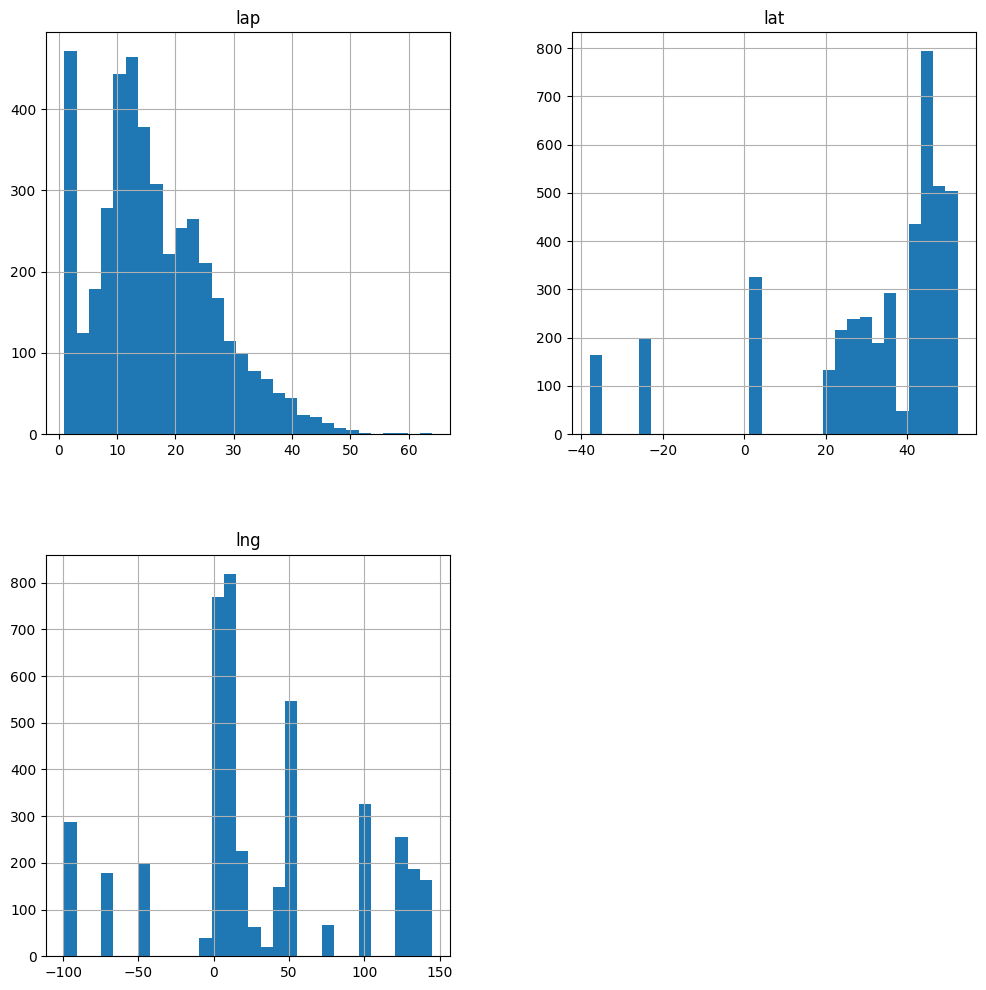

In [84]:
final_merge[num_cols].hist(bins=30, figsize=(12, 12))
plt.show()

### 3.1.4.2. Categorical Variables

In [85]:
# Finding Categorical Variables, then display first 5 rows.
#'O' is Object
cat_cols = [c for c in final_merge.columns if final_merge[c].dtypes=='O'] 
final_merge[cat_cols].head()

,race_name,circuit_name,location,country,alt,driver_name
0,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,10,Jaime Alguersuari
1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,10,Michael Schumacher
2,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,10,Mark Webber
3,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,10,Fernando Alonso
4,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,10,Felipe Massa


### A Need to Clean the Data?

From the section 'Inspecting Unique Values in Each Variable' in  3.1.3. Determining Cadinality, I found out that there are some errors in the values in alt variable. Thus, I need to clean the data.


###  alt Variable 

####  '\\N' values in alt variable

From the section 'Inspecting Unique Values in Each Variable' in  3.1.3. Determining Cadinality, I found out that there are '\\\N' values in alt variable. There should only be numerical values in altitude. '\\\N' values in alt variable suggest that there are no specified altitude values for that particular circuit. With that, I decide to change these values to nan values.

#### Changing '\\N' values to NaN values

In [86]:
# Replacing '\\N' values with NaN values using .replace function
final_merge['alt'] = final_merge['alt'].replace('\\N', np.nan)

In [87]:
# Displaying the result of unique values in 'alt' Variable after rectifying errors
final_merge['alt'].sort_values().unique()

array(['-7', '0', '10', '103', '108', '109', '13', '130', '15', '153',
       '161', '162', '18', '194', '2', '2227', '255', '264', '3', '37',
       '4', '401', '432', '45', '5', '578', '6', '678', '7', '785', nan],
      dtype=object)

####  Object Data Type for alt variable

After making the changes, I also noticed that alt variable is of object data type from the section 'Checking Data Types of Different Columns' in 3.1.1. Identifying Variable Types. As mentioned earlier, there should only be numerical values in altitude. With that, I decide to change alt variable data type from object to float.

#### Changing object Data Type to float Data Type

In [88]:
# Re-casting alt variable to float types 
final_merge['alt'] = final_merge['alt'].astype('float')

In [89]:
# Displaying the result of the data type of alt variable after rectifying errors
print(final_merge['alt'].dtypes)

float64


With that, I am done cleaning the data. I can now wrangle the data.

## 3.2. Data Transformation

### 3.2.1. Outliers Removal


### Outliers
An outlier is a data point which is significantly different from the remaining data. Outliers can only be found in numerical varaibles.

### Highlighting Outliers

There are 2 ways to identify outliers:

1. Boxplots


2. Inter-Quantile Range Proximity Rule

### Highlighting Outliers using Boxplots

Text(0.5, 1.0, 'Boxplot')

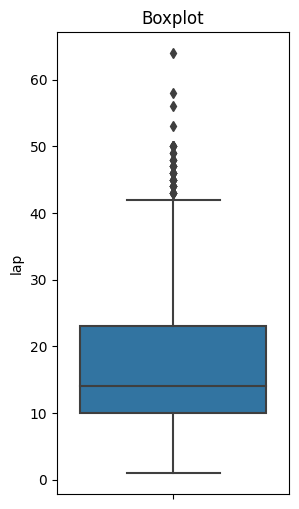

In [90]:
# Boxplot of Numerical Variable 'lap'

plt.figure(figsize=(3,6))
sns.boxplot(y=final_merge['lap'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

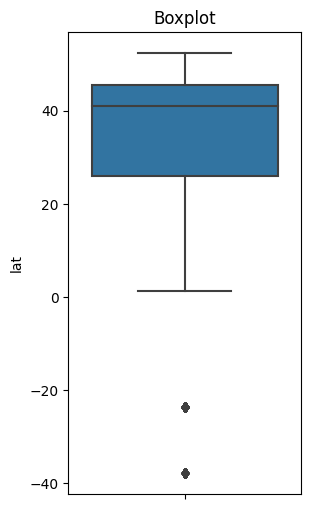

In [91]:
# Boxplot of Numerical Variable 'lat'

plt.figure(figsize=(3,6))
sns.boxplot(y=final_merge['lat'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

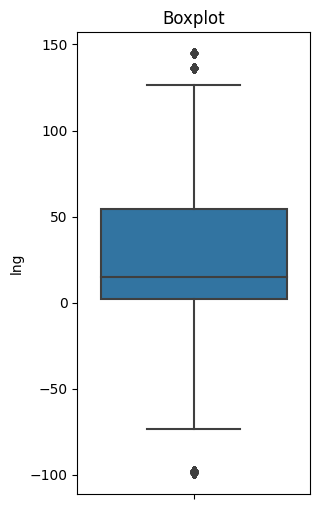

In [92]:
# Boxplot of Numerical Variable 'lng'

plt.figure(figsize=(3,6))
sns.boxplot(y=final_merge['lng'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

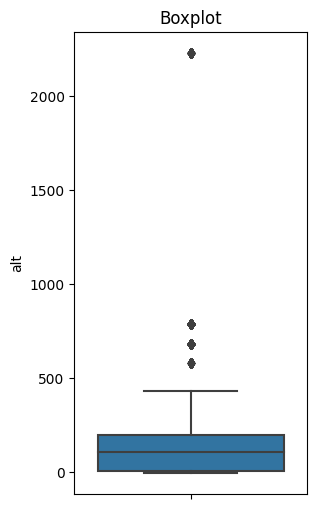

In [93]:
# Boxplot of Numerical Variable 'alt'

plt.figure(figsize=(3,6))
sns.boxplot(y=final_merge['alt'])
plt.title('Boxplot')

### Highlighting Outliers using Inter-Quantile Range proximity rule

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

- IQR = 75th quantile - 25th quantile

In [94]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# also passing the distance as a function argument
# to allow for versatility

def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

### Finding Outliers in lap Variable using IQR proximity rule

In [95]:
# Finding the boudaries for the variable 'lap'

# Setting distance as 1.5 because of IQR proximity rule
upper_boundary, lower_boundary = find_boundaries(final_merge, 'lap', 1.5)   
upper_boundary, lower_boundary

(42.5, -9.5)

In [96]:
# Flagging the outliers in the data set

outliers = np.where(final_merge['lap'] > upper_boundary, True,
                    np.where(final_merge['lap'] < lower_boundary, True, False))

In [97]:
# how many outliers did we find?
outliers.sum()

50

### Finding Outliers in lat Variable using IQR proximity rule

In [98]:
# Finding the boudaries for the variable 'lap'

# Setting distance as 1.5 because of IQR proximity rule
upper_boundary, lower_boundary = find_boundaries(final_merge, 'lat', 1.5)   
upper_boundary, lower_boundary

(74.99025, -3.3421500000000037)

In [99]:
# Flagging the outliers in the data set

outliers = np.where(final_merge['lat'] > upper_boundary, True,
                    np.where(final_merge['lat'] < lower_boundary, True, False))

In [100]:
# how many outliers did we find?
outliers.sum()

362

### Finding Outliers in lng Variable using IQR proximity rule

In [101]:
# Finding the boudaries for the variable 'lap'

# Setting distance as 1.5 because of IQR proximity rule
upper_boundary, lower_boundary = find_boundaries(final_merge, 'lng', 1.5)   
upper_boundary, lower_boundary

(133.116085, -76.25187499999998)

In [102]:
# Flagging the outliers in the data set

outliers = np.where(final_merge['lng'] > upper_boundary, True,
                    np.where(final_merge['lng'] < lower_boundary, True, False))

In [103]:
# how many outliers did we find?
outliers.sum()

638

### Finding Outliers in alt Variable using IQR proximity rule

In [104]:
# Finding the boudaries for the variable 'lap'

# Setting distance as 1.5 because of IQR proximity rule
upper_boundary, lower_boundary = find_boundaries(final_merge, 'alt', 1.5)   
upper_boundary, lower_boundary

(474.5, -273.5)

In [105]:
# Flagging the outliers in the data set

outliers = np.where(final_merge['alt'] > upper_boundary, True,
                    np.where(final_merge['alt'] < lower_boundary, True, False))

In [106]:
# how many outliers did we find?
outliers.sum()

558

### Summary of Findings about Outliers in each Numerical Variable

Here are the results of outliers in each Numerical Variable after highlighting them using boxplots and Inter-Quantile Range proximity rule :

- lap Variable: 50 outliers
- lat Variable: 362 outliers
- lng Variable: 638 outliers
- alt Variable: 558 outliers

### Are there any Outliers?

According to the results above, there are indeed outliers in the dataset. There are 4 variables with outliers.

The 4 Variables with Outliers are:

1. lap  (50 outliers)


2. lat (362 outliers)


3. lng (638 outliers)


4. alt (558 outliers)

### Dealing with Outliers

With outliers in our dataset, we could not just leave it as is. We need to do something about it. 

This is because... 
- Statistical parameters (e.g. mean, variance) are sensitive to outliers
- Outliers may affect the performance of some machine learning models



### Handling Outliers in lap Variable

Since lap Variable is the Target variable for my prediction problem, I decided not to deal with the outliers in lap variable. This is so that the variable maintains its original values from the dataset and does not affect the model performance greatly.

### Handling Outliers in lat Variable

### Method 1: Trimming 

Trimming, or truncating, is the process of removing observations that show outliers in one or more variables in the dataset. There are three commonly used methods to set the boundaries beyond which a value can be considered an outlier. 

For normally distributed variables:

 - Method A: Trimming by setting limits to the mean plus or minus three times the standard deviation
 
   - This is because approximately 99% of the data will be distributed between those limits. 

For normally & not normally, distributed variables:

- Method B: Trimming by setting limits using the inter-quartile range proximity rules

- Method C: Trimming by setting limits to the 5th and 95th quantiles

### Method 1A: Trimming by Setting Limits via Standard Deviation (3 SD away from mean)

In [107]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 3 standard deviation away from mean

# also passing the distance as a function argument
# to allow for versatility

def find_boundaries_1(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

In [108]:
# Finding the boudaries for the variable 'lat' using find_boundaries_1() method

IV_upper_limit, IV_lower_limit = find_boundaries_1(final_merge, 'lat', 3)
IV_upper_limit, IV_lower_limit

(99.45153604486846, -37.52854268510852)

In [109]:
# Flagging outliers in lat Variable

outliers_IV = np.where(final_merge['lat'] > IV_upper_limit, True,
                       np.where(final_merge['lat'] < IV_lower_limit, True, False))

In [110]:
# Trimming the dataset by removing lat outliers

lat_trimmed_1a = final_merge.loc[~outliers_IV ]

final_merge.shape, lat_trimmed_1a.shape                    # Result is ((4289, 9), (4125, 9))

((4289, 9), (4125, 9))

### Method 1B: Trimming by Setting Limits via Inter-Quantile Range proximity rule

In [111]:
# Finding outliers in the dataframe:

def find_boundaries_2(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [112]:
# Finding the boudaries for the variable 'lat' using find_boundaries_2() method

IV_upper_limit, IV_lower_limit = find_boundaries_2(final_merge, 'lat', 3)
IV_upper_limit, IV_lower_limit

(104.3649, -32.716800000000006)

In [113]:
# Flagging outliers in lat Variable

outliers_IV = np.where(final_merge['lat'] > IV_upper_limit, True,
                       np.where(final_merge['lat'] < IV_lower_limit, True, False))

In [114]:
# Trimming the dataset by removing lat outliers

lat_trimmed_1b = final_merge.loc[~outliers_IV ]

final_merge.shape, lat_trimmed_1b.shape                    # Result is ((4289, 9), (4125, 9))

((4289, 9), (4125, 9))

### Method 1C: Trimming by Setting Limits via Arbitrary Percentile method

In [115]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 5th and 95th quantiles

def find_boundaries_3(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

In [116]:
# Finding the boudaries for the variable 'lat' using find_boundaries_3() method

IV_upper_limit, IV_lower_limit = find_boundaries_3(final_merge, 'lat')
IV_upper_limit, IV_lower_limit

(52.0786, -23.7036)

In [117]:
# Flagging outliers in lat Variable

outliers_IV = np.where(final_merge['lat'] > IV_upper_limit, True,
                       np.where(final_merge['lat'] < IV_lower_limit, True, False))

In [118]:
# Trimming the dataset by removing lat outliers

lat_trimmed_1c = final_merge.loc[~outliers_IV ]

final_merge.shape, lat_trimmed_1c.shape                    # Result is ((4289, 9), (4105, 9))

((4289, 9), (4105, 9))

### Method 2: Winsorisation

Winsorization, or winsorizing, is the process of transforming the data by limiting outliers to a certain arbitrary value that is closer to the mean of the distribution. Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. A typical strategy involves setting outliers to a specified percentile.

For example, with 90% winsorization, we set all data below the 5th percentile to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile. 

Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution provides an unbiased representation of the distribution of the variable. 

In [119]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('lat quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


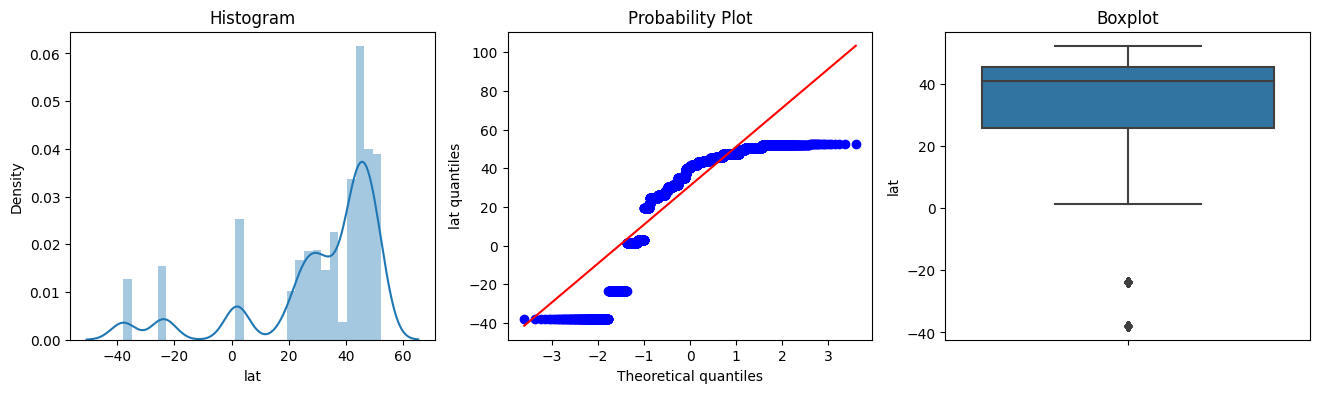

In [120]:
# finding outliers in 'lat'

diagnostic_plots(final_merge, 'lat')

In [121]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [122]:
# Replacing lat outliers by the percentiles

# final_merge['lat']= winsorise(final_merge, 'lat', final_merge['lat'].quantile(0.95), 
                                   # final_merge['lat'].quantile(0.05))

In [123]:
# let's explore outliers in the trimmed dataset

# diagnostic_plots(final_merge, 'lat')

### Censoring with feature-engine

In [124]:
windsorizer = Winsorizer(capping_method ='quantiles',      
                        tail='both', # cap left, right or both tails
                        fold=0.05,
                        variables=['lat'])

windsorizer.fit(final_merge)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['lat'])

Note: Windsorizer function is able to select how far out to cap the maximum or minimum values with the parameter ‘fold’ with the above fuction.

If `capping_method ='gaussian'` fold gives the value to multiply the std.

If `capping_method ='iqr'` fold is the value to multiply the IQR.

If `capping_method ='quantiles'`, fold is the percentile on each tail that should be censored. For example, if fold=0.05, the limits will be the 5th and 95th percentiles. If fold=0.1, the limits will be the 10th and 90th percentiles.

In [125]:
lat_w = windsorizer.transform(final_merge)

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


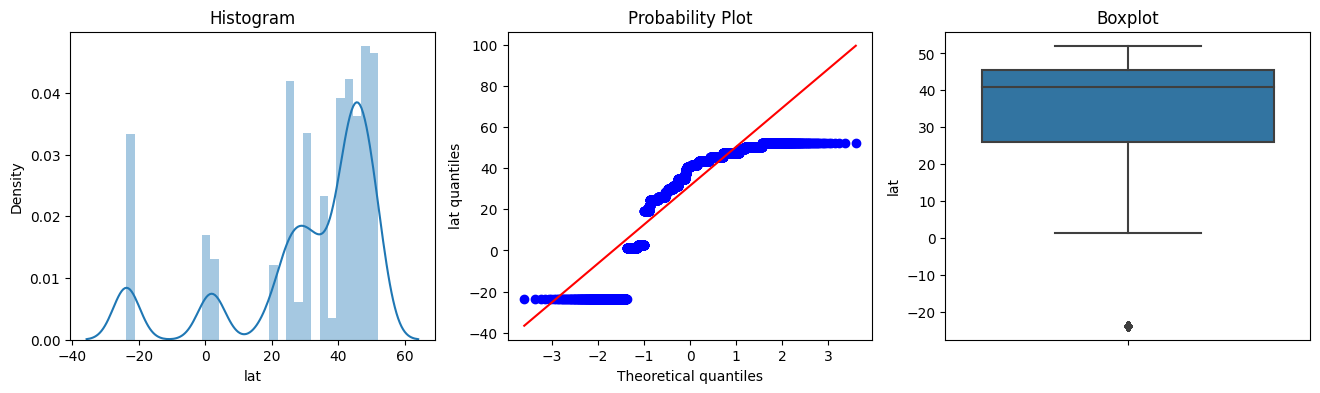

In [126]:
diagnostic_plots(lat_w, 'lat')

In [127]:
# we can inspect the minimum caps for lat variable
windsorizer.left_tail_caps_

{'lat': -23.7036}

In [128]:
# we can inspect the maximum caps for lat variable
windsorizer.right_tail_caps_

{'lat': 52.0786}

### Method 3: Capping

Similarly to winsorization, we can replace the extreme values by values closer to other values in the variable, by determining the maximum and minimum boundaries with the mean plus or minus the standard deviation, or the inter-quartile range proximity rule. 

This procedure is also called bottom and top coding, censoring, or capping. We can cap both extremes of the distribution or just one of the tails, depending on where we find the outliers in the variable. 

In [129]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [130]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + df[variable].std() * distance
    lower_boundary = df[variable].mean() - df[variable].std() * distance

    return upper_boundary, lower_boundary

In [131]:
# Finding the boudaries for the variable 'lat' using find_skewed_boundaries() mtd

IV_upper_limit, IV_lower_limit = find_skewed_boundaries(final_merge, 'lat', 3)
IV_upper_limit, IV_lower_limit

(104.3649, -32.716800000000006)

In [132]:
# Now let's replace the outliers by the maximum and minimum limit

# final_merge['lat']= np.where(final_merge['lat'] > IV_upper_limit, IV_upper_limit,
                       # np.where(final_merge['lat'] < IV_lower_limit, IV_lower_limit, final_merge['lat']))

In [133]:
# let's explore outliers in the capped dataset

# diagnostic_plots(final_merge, 'lat')

In [134]:
# Finding the boudaries for the variable 'lat' using find_normal_boundaries() mtd

IV_upper_limit, IV_lower_limit = find_normal_boundaries(final_merge, 'lat', 3)
IV_upper_limit, IV_lower_limit

(99.45153604486846, -37.52854268510852)

In [135]:
# Now let's replace the outliers by the maximum and minimum limit

# final_merge['lat']= np.where(final_merge['lat'] > IV_upper_limit, IV_upper_limit,
                       # np.where(final_merge['lat'] < IV_lower_limit, IV_lower_limit, final['lat']))

In [136]:
# let's explore outliers in the capped dataset

# diagnostic_plots(final_merge, 'lat')

### Censoring with feature-engine

In [137]:
# create the capper

windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['lat'])

windsorizer.fit(final_merge)

Winsorizer(tail='both', variables=['lat'])

In [138]:
lat_c = windsorizer.transform(final_merge)

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


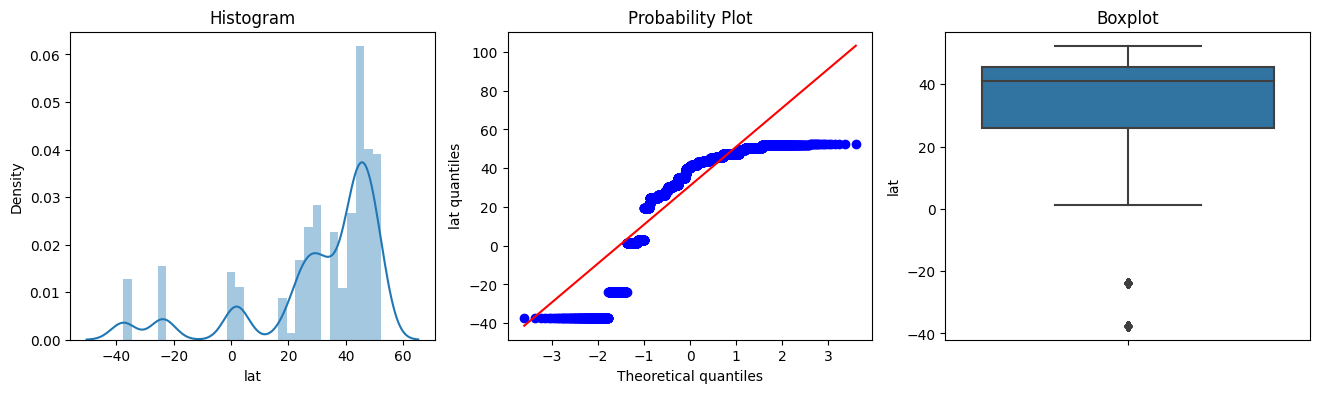

In [139]:
diagnostic_plots(lat_c, 'lat')

In [140]:
# we can inspect the minimum caps for lat variable
windsorizer.left_tail_caps_

{'lat': -37.520557836423265}

In [141]:
# we can inspect the maximum caps for lat variable
windsorizer.right_tail_caps_

{'lat': 99.44355119618321}

### Method 4: Zero-coding

Zero-coding is a variant of bottom-coding and refers to the process of capping, usually the lower value of the variable, at zero. It is commonly used for variables that cannot take negative values, such as age or income. 

In [142]:
# Take a look at the Minimum value in 'lat'
final_merge['lat'].min()

-37.8497

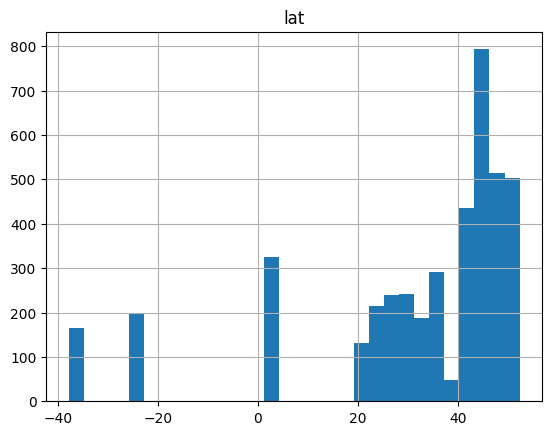

In [143]:
# Histogram of lat before Zero-coding
final_merge['lat'].hist(bins=30)
plt.title('lat')
plt.show()

In [144]:
# Perform Zero-coding

final_merge.loc[final_merge['lat'] < 0, 'lat'] = 0      

# Take a look at the Minimum value in 'lat'
final_merge['lat'].min()

0.0

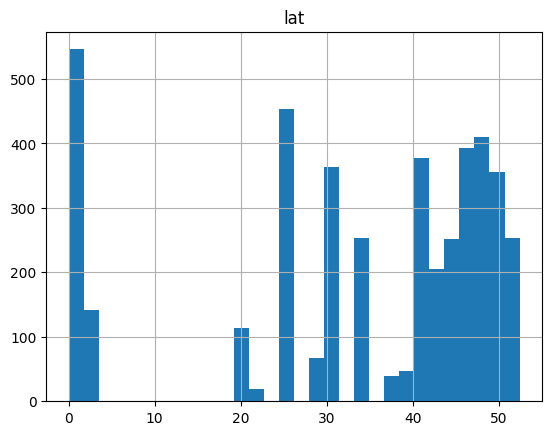

In [145]:
# Histogram of lat after Zero-coding
final_merge['lat'].hist(bins=30)
plt.title('lat')
plt.show()

### Zero-coding with feature-engine

In [146]:
# create the capper

windsoriser = ArbitraryOutlierCapper(max_capping_dict=None,
                                     min_capping_dict={'lat':0})

windsoriser.fit(final_merge)

ArbitraryOutlierCapper(min_capping_dict={'lat': 0})

In [147]:
lat_z = windsoriser.transform(final_merge)

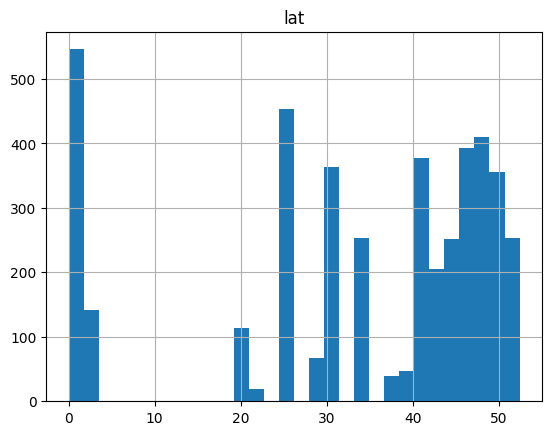

In [148]:
# Histogram of lat after Zero-coding

lat_z['lat'].hist(bins=30)
plt.title('lat')
plt.show()

In [149]:
# Inspecting the minimum caps for 'lat' variable
windsoriser.left_tail_caps_

{'lat': 0}

In [150]:
# Inspecting the maximum caps for 'lat' variable
windsoriser.right_tail_caps_

{}

### Decision on the Ideal Method to Deal with Outliers in lat Variable

After trying all the different methods to deal with Outliers in lat Variable, I can conclude that using Censoring with feature-engine by Winsorisation is the best method to deal with with Outliers in lat Variable.

This is because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in lat Variable. By being able to retain most of the values in the dataset using Winsorisation, I would be able to get a better model performance result.


2. Compared to Capping method, I get to deal with more outliers in lat Variable. 


3. Compared to Zero-coding, dealing with Outliers in lat Variable by Winsorisation is way better. Zero-coding is a process of capping the lower value of the variable, at zero. Thus, when using Zero-coding, all negative values became 0. However, there must be negative values for latitude. By changing all negative values to 0, it might affect the model performance result later on. 

Now, I would be using 'lat_w' instead of 'final_merge' for the remaining steps.

### Handling Outliers in lng Variable

### Method 1: Trimming 

### Method 1A: Trimming by Setting Limits via Standard Deviation (3 SD away from mean)

In [151]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 3 standard deviation away from mean

# also passing the distance as a function argument
# to allow for versatility

def find_boundaries_1(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

In [152]:
# Finding the boudaries for the variable 'lng' using find_boundaries_1() method

IV_upper_limit, IV_lower_limit = find_boundaries_1(lat_w, 'lng', 3)
IV_upper_limit, IV_lower_limit

(219.15938426596406, -163.4594207448632)

In [153]:
# Flagging outliers in lng Variable

outliers_IV = np.where(lat_w['lng'] > IV_upper_limit, True,
                       np.where(lat_w['lng'] < IV_lower_limit, True, False))

In [154]:
# Trimming the dataset by removing lng outliers

lng_trimmed_1a = lat_w.loc[~outliers_IV ]

lat_w.shape, lng_trimmed_1a.shape                    # Result is ((4289, 9), (4289, 9))

((4289, 9), (4289, 9))

### Method 1B: Trimming by Setting Limits via Inter-Quantile Range proximity rule

In [155]:
# Finding outliers in the dataframe:

def find_boundaries_2(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [156]:
# Finding the boudaries for the variable 'lng' using find_boundaries_2() method

IV_upper_limit, IV_lower_limit = find_boundaries_2(lat_w, 'lng', 3)
IV_upper_limit, IV_lower_limit

(211.62906999999996, -154.76485999999997)

In [157]:
# Flagging outliers in lng Variable

outliers_IV = np.where(lat_w['lng'] > IV_upper_limit, True,
                       np.where(lat_w['lng'] < IV_lower_limit, True, False))

In [158]:
# Trimming the dataset by removing lng outliers

lng_trimmed_1b = lat_w.loc[~outliers_IV ]

lat_w.shape, lng_trimmed_1b.shape                    # Result is ((4289, 9), (4289, 9))

((4289, 9), (4289, 9))

### Method 1C: Trimming by Setting Limits via Arbitrary Percentile method

In [159]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 5th and 95th quantiles

def find_boundaries_3(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

In [160]:
# Finding the boudaries for the variable 'lng' using find_boundaries_3() method

IV_upper_limit, IV_lower_limit = find_boundaries_3(lat_w, 'lng')
IV_upper_limit, IV_lower_limit

(136.541, -97.6411)

In [161]:
# Flagging outliers in lng Variable

outliers_IV = np.where(lat_w['lng'] > IV_upper_limit, True,
                       np.where(lat_w['lng'] < IV_lower_limit, True, False))

In [162]:
# Trimming the dataset by removing lng outliers

lng_trimmed_1c = lat_w.loc[~outliers_IV ]

lat_w.shape, lng_trimmed_1c.shape                    # Result is ((4289, 9), (4012, 9))

((4289, 9), (4012, 9))

### Method 2: Winsorisation

In [163]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('lng quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


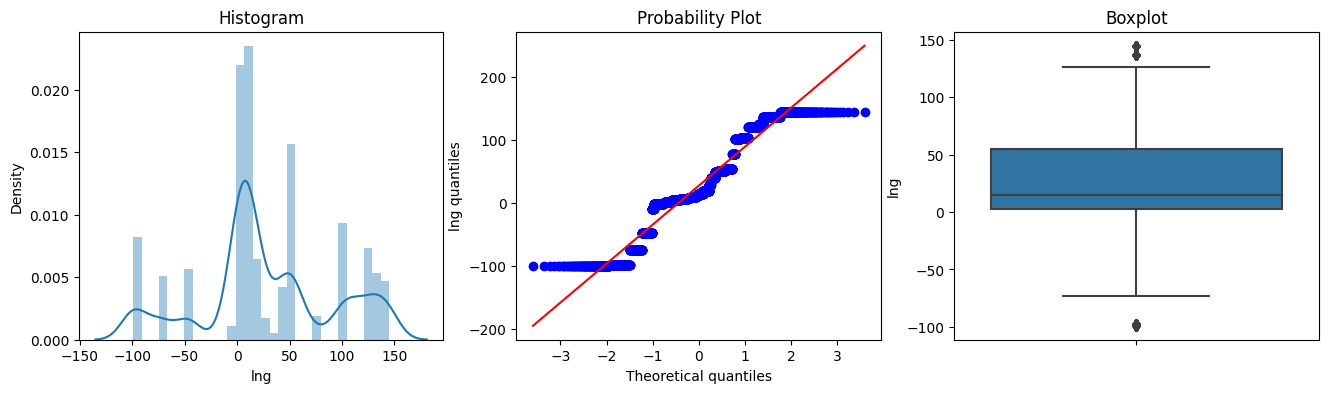

In [164]:
# finding outliers in 'lng'

diagnostic_plots(lat_w, 'lng')

In [165]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [166]:
# Replacing lng outliers by the percentiles

# lat_w['lng']= winsorise(lat_w, 'lng', lat_w['lng'].quantile(0.95), 
                                   # lat_w['lng'].quantile(0.05))

In [167]:
# let's explore outliers in the trimmed dataset

# diagnostic_plots(lat_w, 'lng')

### Censoring with feature-engine

In [168]:
windsorizer = Winsorizer(capping_method ='quantiles',      
                        tail='both', # cap left, right or both tails
                        fold=0.05,
                        variables=['lng'])

windsorizer.fit(lat_w)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['lng'])

In [169]:
lng_w = windsorizer.transform(lat_w)

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


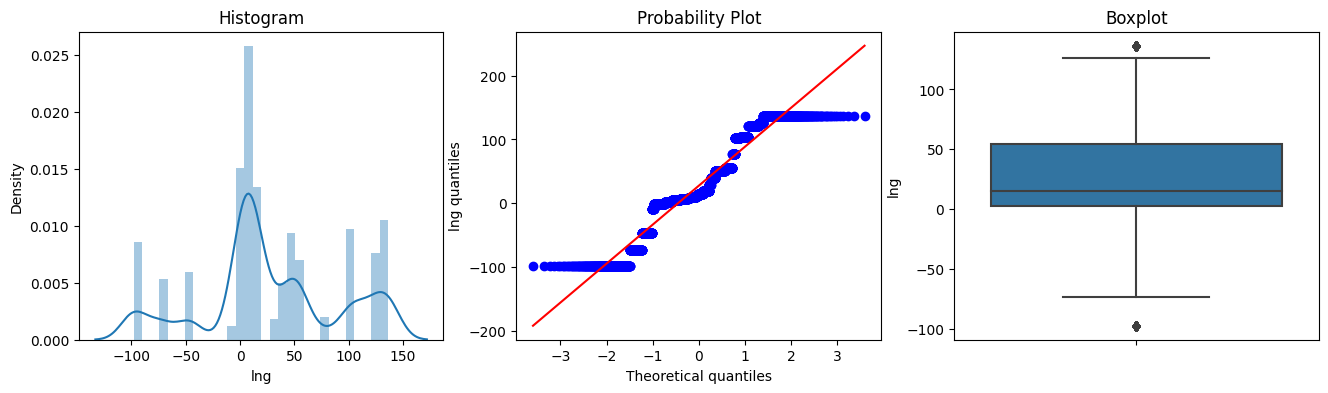

In [170]:
diagnostic_plots(lng_w, 'lng')

In [171]:
# we can inspect the minimum caps for lng variable
windsorizer.left_tail_caps_

{'lng': -97.6411}

In [172]:
# we can inspect the maximum caps for lng variable
windsorizer.right_tail_caps_

{'lng': 136.541}

### Method 3: Capping

In [173]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [174]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + df[variable].std() * distance
    lower_boundary = df[variable].mean() - df[variable].std() * distance

    return upper_boundary, lower_boundary

In [175]:
# Finding the boudaries for the variable 'lng' using find_skewed_boundaries() mtd

IV_upper_limit, IV_lower_limit = find_skewed_boundaries(lat_w, 'lng', 3)
IV_upper_limit, IV_lower_limit

(211.62906999999996, -154.76485999999997)

In [176]:
# Now let's replace the outliers by the maximum and minimum limit

# lat_w['lng']= np.where(lat_w['lng'] > IV_upper_limit, IV_upper_limit,
                       # np.where(lat_w['lng'] < IV_lower_limit, IV_lower_limit, lat_w['lng']))

In [177]:
# let's explore outliers in the capped dataset

# diagnostic_plots(lat_w, 'lng')

In [178]:
# Finding the boudaries for the variable 'lng' using find_normal_boundaries() mtd

IV_upper_limit, IV_lower_limit = find_normal_boundaries(lat_w, 'lng', 3)
IV_upper_limit, IV_lower_limit

(219.15938426596406, -163.4594207448632)

In [179]:
# Now let's replace the outliers by the maximum and minimum limit

# lat_w['lng']= np.where(lat_w['lng'] > IV_upper_limit, IV_upper_limit,
                       # np.where(lat_w['lng'] < IV_lower_limit, IV_lower_limit, lat_w['lng']))

In [180]:
# let's explore outliers in the capped dataset

# diagnostic_plots(lat_w, 'lng')

### Censoring with feature-engine

In [181]:
# create the capper

windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['lng'])

windsorizer.fit(lat_w)

Winsorizer(tail='both', variables=['lng'])

In [182]:
lng_c = windsorizer.transform(lat_w)

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


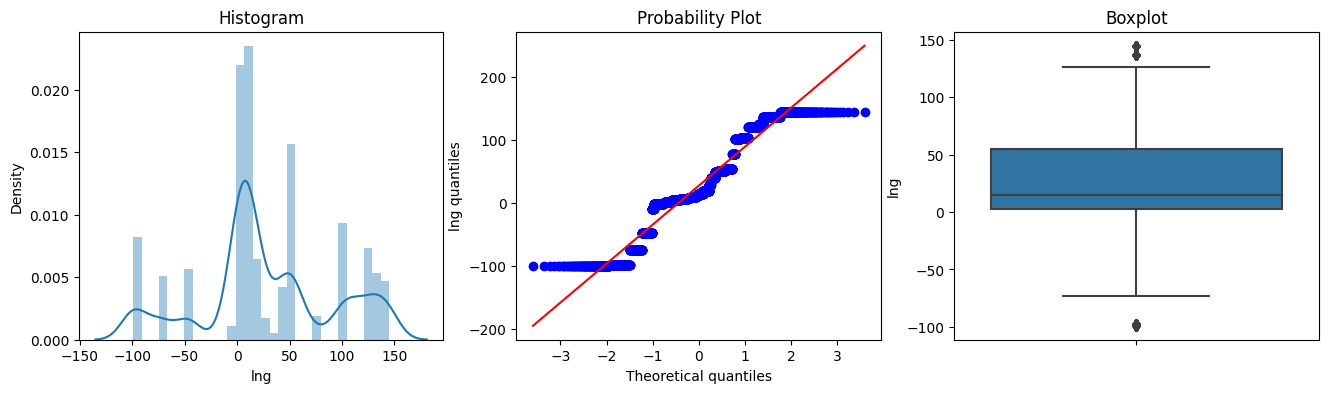

In [183]:
diagnostic_plots(lng_c, 'lng')

In [184]:
# we can inspect the minimum caps for lng variable
windsorizer.left_tail_caps_

{'lng': -163.437117112901}

In [185]:
# we can inspect the maximum caps for lng variable
windsorizer.right_tail_caps_

{'lng': 219.13708063400188}

### Method 4: Zero-coding

In [186]:
# Take a look at the Minimum value in 'lng'
lat_w['lng'].min()

-99.0907

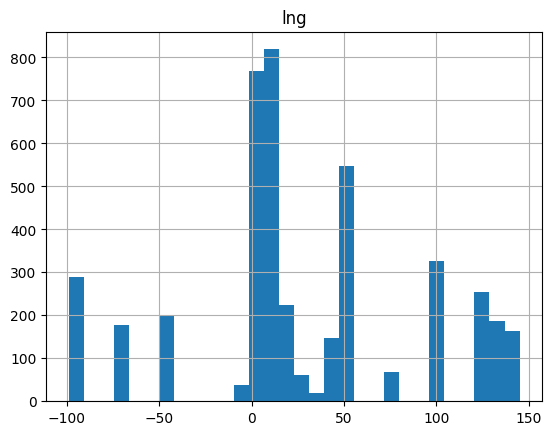

In [187]:
# Histogram of lng before Zero-coding
lat_w['lng'].hist(bins=30)
plt.title('lng')
plt.show()

In [188]:
# Perform Zero-coding

lat_w.loc[lat_w['lng'] < 0, 'lng'] = 0      

# Take a look at the Minimum value in 'lng'
lat_w['lng'].min()

0.0

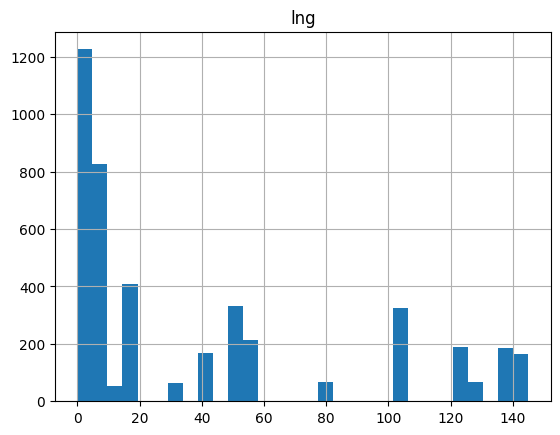

In [189]:
# Histogram of lng after Zero-coding
lat_w['lng'].hist(bins=30)
plt.title('lng')
plt.show()

### Zero-coding with feature-engine

In [190]:
# create the capper

windsoriser = ArbitraryOutlierCapper(max_capping_dict=None,
                                     min_capping_dict={'lng':0})

windsoriser.fit(lat_w)

ArbitraryOutlierCapper(min_capping_dict={'lng': 0})

In [191]:
lng_z = windsoriser.transform(lat_w)

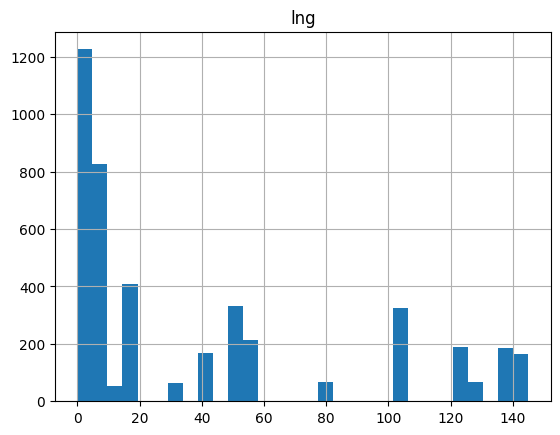

In [192]:
# Histogram of lng after Zero-coding

lng_z['lng'].hist(bins=30)
plt.title('lng')
plt.show()

In [193]:
# Inspecting the minimum caps for 'lng' variable
windsoriser.left_tail_caps_

{'lng': 0}

In [194]:
# Inspecting the maximum caps for 'lng' variable
windsoriser.right_tail_caps_

{}

### Decision on the Ideal Method to Deal with Outliers in lng Variable

After trying all the different methods to deal with Outliers in lng Variable, I can conclude that using Censoring with feature-engine by Winsorisation is the best method to deal with with Outliers in lng Variable.

This is because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in lng Variable. By being able to retain most of the values in the dataset using Winsorisation, I would be able to get a better model performance result. Furthermore, Trimming method does not really work on lng variable to deal with Outliers. No rows are removed after using Trimming method. This means that the outliers are not dealt with.


2. Compared to Capping method, I get to deal with more outliers in lng Variable. 


3. Compared to Zero-coding, dealing with Outliers in lng Variable by Winsorisation is way better. Zero-coding is a process of capping the lower value of the variable, at zero. Thus, when using Zero-coding, all negative values became 0. However, there must be negative values for longitude. By changing all negative values to 0, it might affect the model performance result later on. 

Now, I would be using 'lng_w' instead of 'lat_w' for the remaining steps.

### Handling Outliers in alt Variable

Since there are null values in alt Variable due to me changing '\\\N' values to NaN values in alt variable during data cleaning, I am unable to handle the Outliers in alt Variable. I will be handling the Outliers in alt Variable later on.

### 3.2.2. Transforming Numerical Variables

### Inspecting Variable Distributions

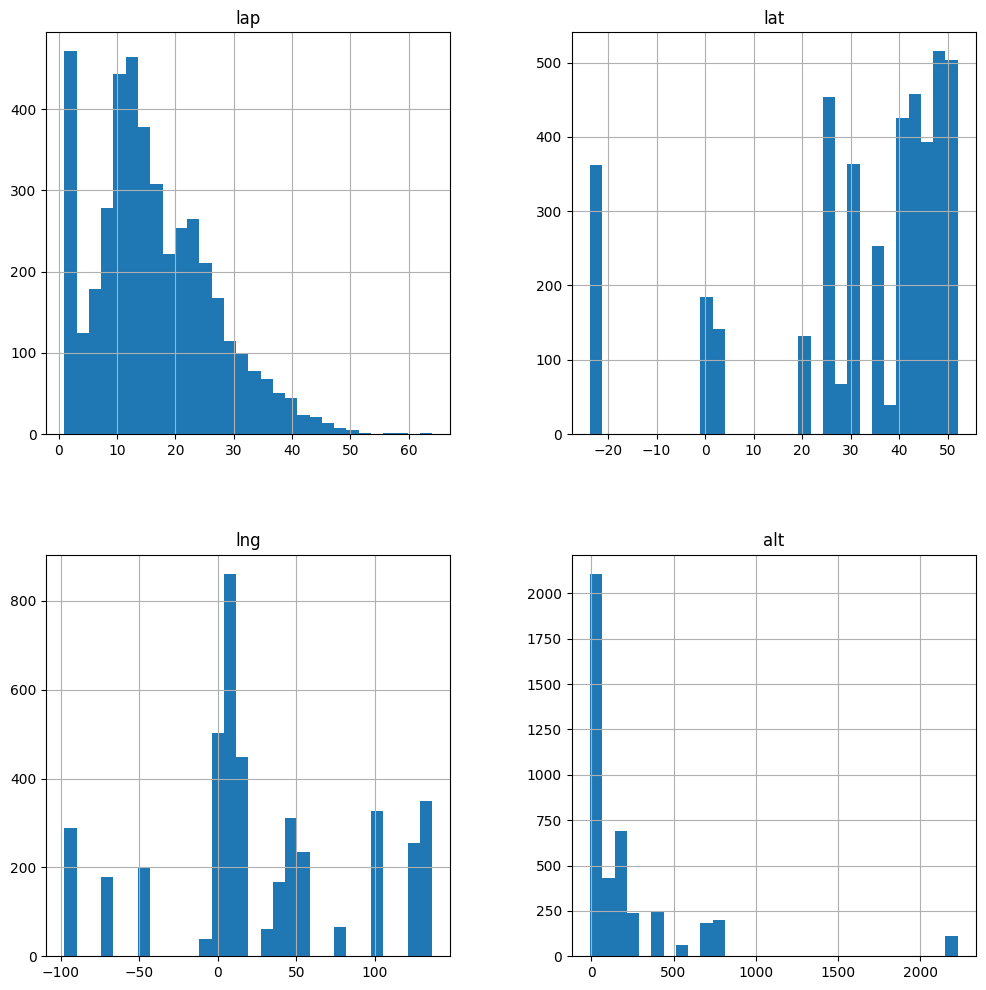

In [195]:
# plotting of histogram to inspect variable distributions 

lng_w.hist(bins=30, figsize=(12,12))
plt.show()

In [196]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In a Q-Q plot we plot the quantiles of the variable in the y-axis and the expected quantiles of the normal distribution in the x-axis. If the variable follows a normal distribution, the dots in the Q-Q plot should fall in a 45 degree diagonal line

### Checking whether each Numerical Variable follows a Normal Distribution

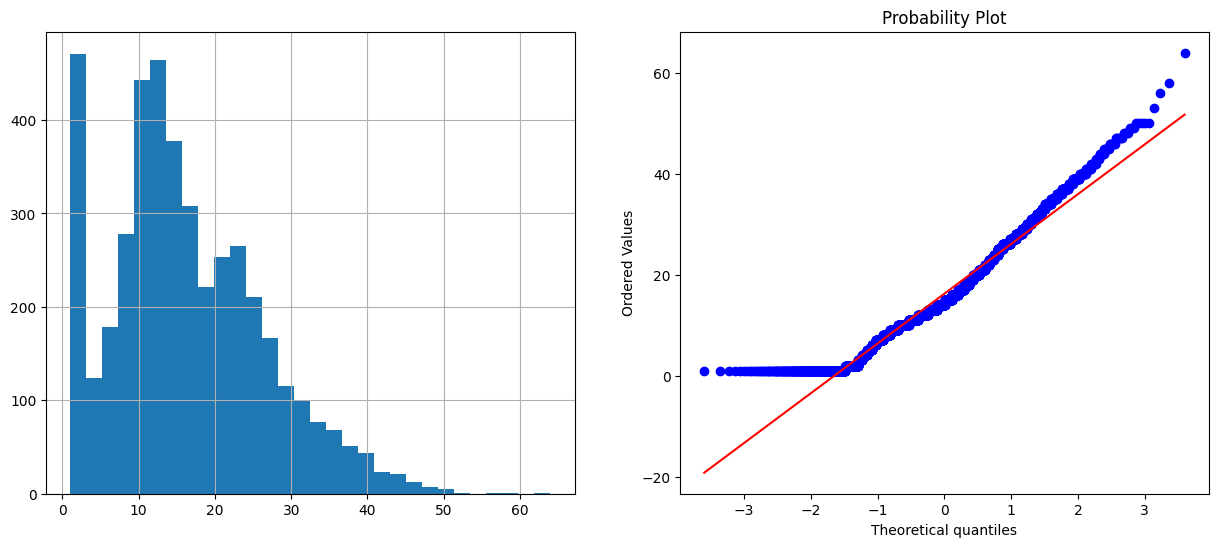

In [197]:
# check original distribution of lap Variable

diagnostic_plots(lng_w, 'lap')

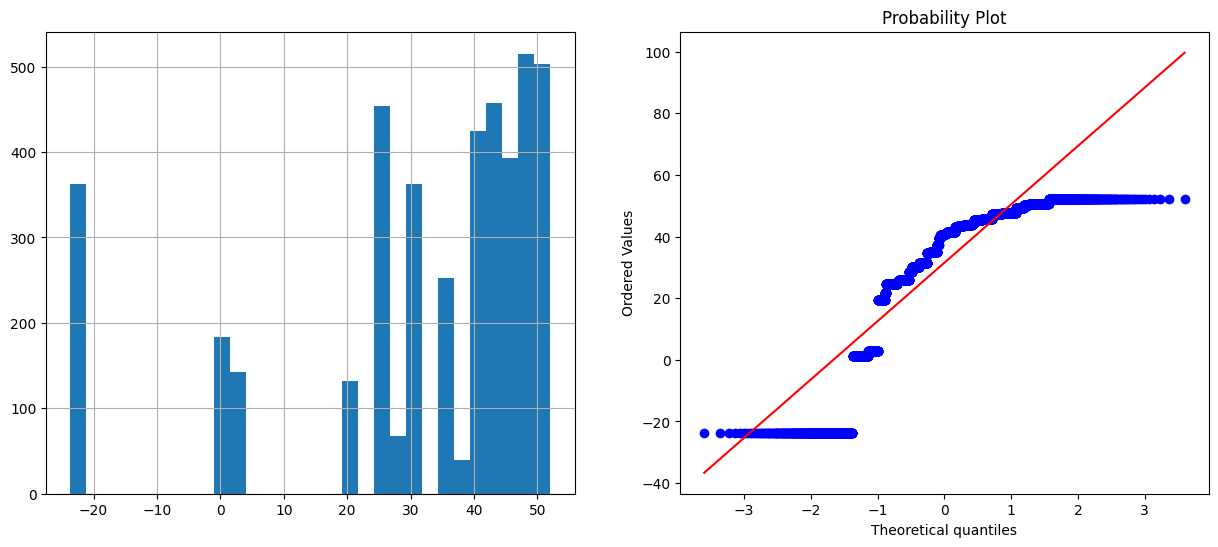

In [198]:
# check original distribution of lat Variable

diagnostic_plots(lng_w, 'lat')

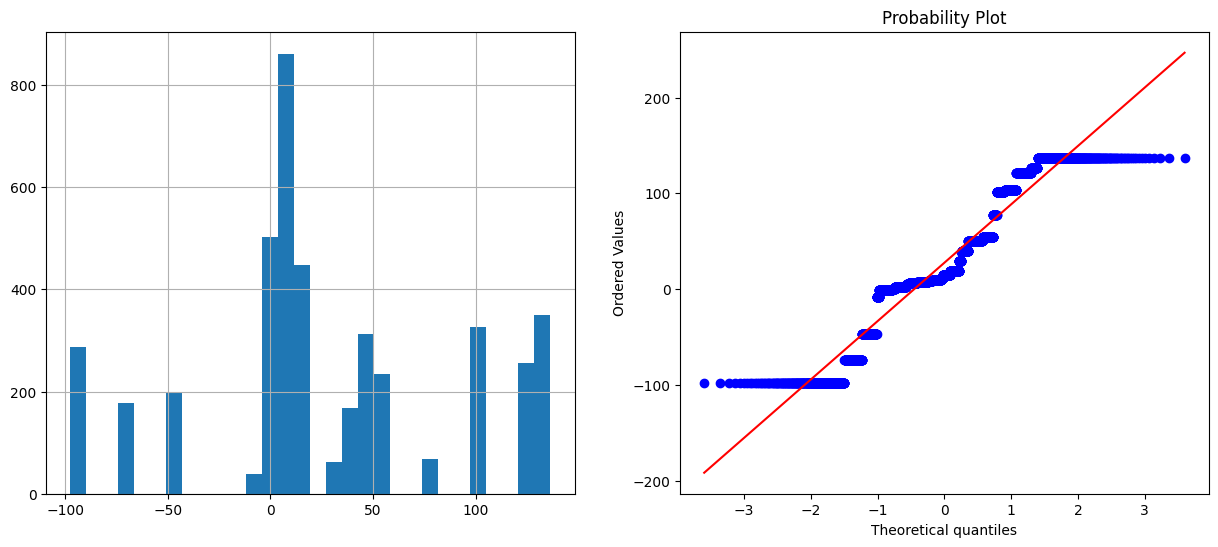

In [199]:
# check original distribution of lng Variable

diagnostic_plots(lng_w, 'lng')

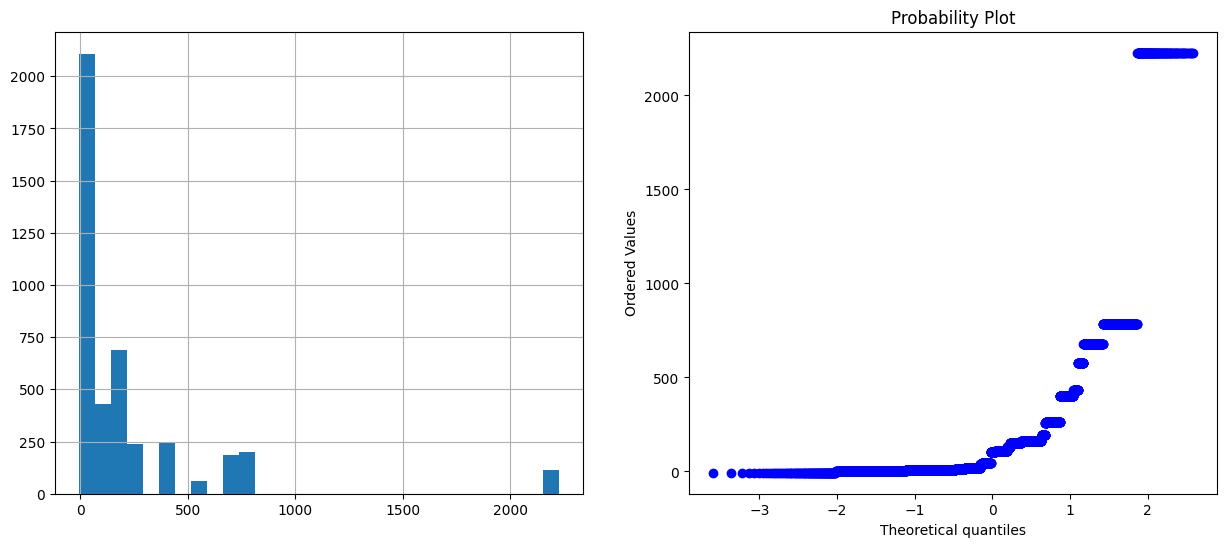

In [200]:
# check original distribution of alt Variable

diagnostic_plots(lng_w, 'alt')

### A Need to Transform the Numerical Variables?

According to the results above, I think it is necessary to transform the numerical variables using proper transformation methods. 

This is because all numerical variables - 'lap', 'lat', 'lng' and 'alt' do not follow a normal distribution. The dots in each Numerical variable's  Q-Q plot does not fall perfectly onto the 45 degree red diagonal line. 

The numerical variables need to be normal distributed as some machine learning models assume that input variables are normally distributed. If the numerical variables are not normally distributed, the results achieved from some machine learning language may not be accurate. In addition, transforming numerical variables may sometimes help in finding the linear relationship among variables and the target.

### List of Numerical Variables that needs to be transformed to achieve a Normal Distribution 

1. lat

2. lng

3. alt

Note: Even though, numerical variable lap do not follow a normal distribution, they do not need to be transformed to achieve a Normal distribution.

### Reasons why Numerical Variable lap do not need to be transformed to achieve a Normal Distribution

As mentioned earlier, lap Variable is the Target variable for my Prediction Problem. With lap variable not being transformed, the variable maintains its original values from the dataset and does not affect the model performance greatly.

### Checking for Null Values in lat, lng, alt Variables before transformation

It is important to check that there are no null values in variables that are going to be transformed before transforming as we may get errors when transforming.

In [201]:
# Check for null values in any column before transformation
lng_w.isnull().any()

race_name       False
lap             False
circuit_name    False
location        False
country         False
lat             False
lng             False
alt              True
driver_name     False
dtype: bool

Since there are null values in alt Variable, we are unable to transform alt Variable. This is because we may get errors when transforming alt Variable. I will be transforming alt Variable later on.

### Transforming Iat & lng Variables

### Method 1: Logarithmic Transformation

The logarithm function is commonly used to transform variables. It has a strong effect on the shape of the variable distribution and can only be applied to positive variables. 

\begin{equation}
X_t = \log(X)
\end{equation}

### Logarithmic transformation with Feature-engine

In [202]:
# initialize the transformer
lt = LogTransformer(variables=['lat', 'lng'])
                        
# fit transformer to data set
# lt.fit(lng_w)


# Result: An error occured as shown below.

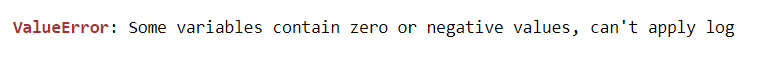

In [203]:
# The error occurred because there are negative values in lat & lng variables after transformation
# There are negative values in lat & lng variable after transformation because there are values between 0 to 1 in 
# lat & lng variables before transformation.
# When applying Logarithm calculation, the values becomes negative.
# This means that we are unable to transform lat & lng variable using Logarithm calculation.

### Method 2: Reciprocal Transformation

The reciprocal function is a strong transformation with a very drastic effect on the variable distribution. It isn't defined for the value 0, but it can be applied to negative numbers.

\begin{equation}
X_t = 1/X
\end{equation}

### Reciprocal transformation with Feature-engine

In [204]:
# initialize the transformer
rt = ReciprocalTransformer(variables = ['lat', 'lng'])

# fit transformer to the entire dataframe
rt.fit(lng_w)

ReciprocalTransformer(variables=['lat', 'lng'])

In [205]:
# transform the indicated variables within our data set
transform_method_2 = rt.transform(lng_w)

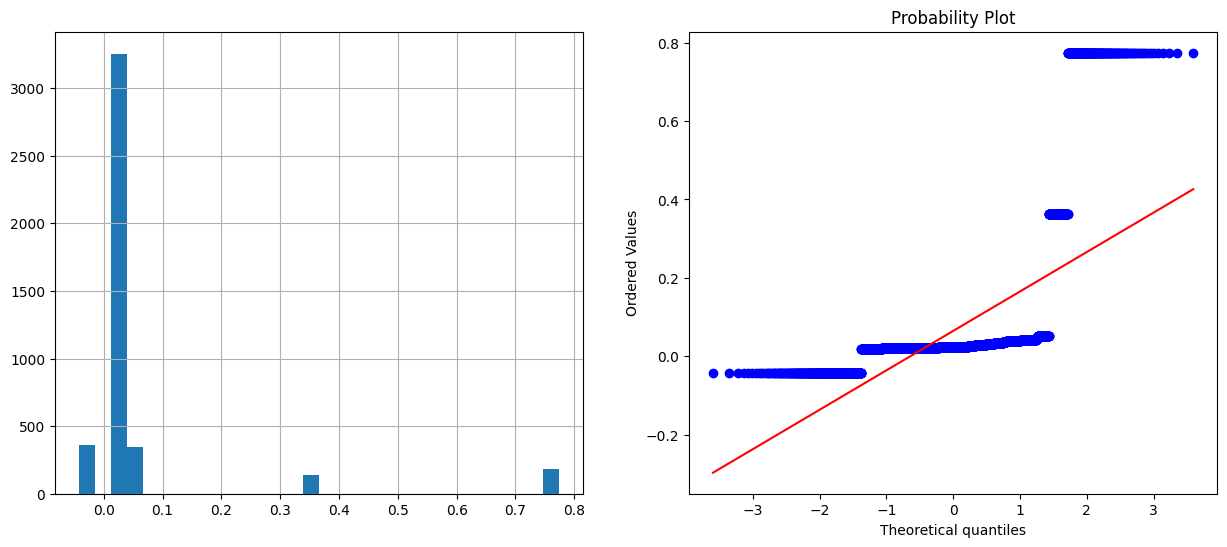

In [206]:
# use diagnostic plot function to evaluate transformation

# For lat Variable
diagnostic_plots(transform_method_2, 'lat')

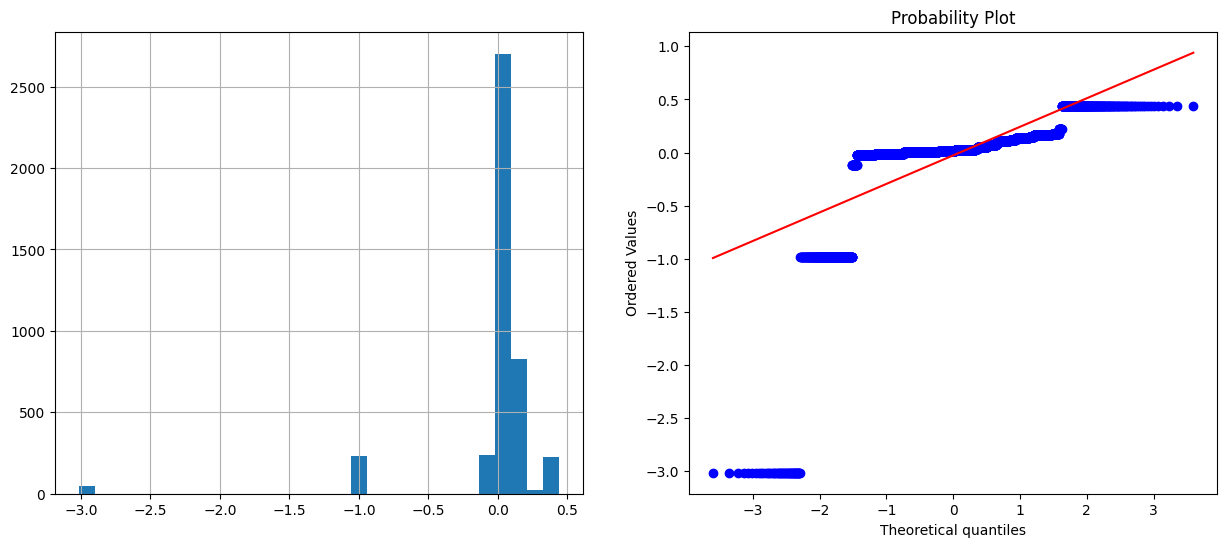

In [207]:
# For lng Variable
diagnostic_plots(transform_method_2, 'lng')

In [208]:
transform_method_2

,race_name,lap,circuit_name,location,country,lat,lng,alt,driver_name
0,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-0.042188,0.007324,10.0,Jaime Alguersuari
1,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-0.042188,0.007324,10.0,Michael Schumacher
2,Australian Grand Prix,11,Albert Park Grand Prix Circuit,Melbourne,Australia,-0.042188,0.007324,10.0,Mark Webber
3,Australian Grand Prix,12,Albert Park Grand Prix Circuit,Melbourne,Australia,-0.042188,0.007324,10.0,Fernando Alonso
4,Australian Grand Prix,13,Albert Park Grand Prix Circuit,Melbourne,Australia,-0.042188,0.007324,10.0,Felipe Massa
...,...,...,...,...,...,...,...,...,...
4284,Saudi Arabian Grand Prix,10,Jeddah Street Circuit,Jeddah,Saudi Arabia,0.046418,0.025528,15.0,Lando Norris
4285,Saudi Arabian Grand Prix,9,Jeddah Street Circuit,Jeddah,Saudi Arabia,0.046418,0.025528,15.0,George Russell
4286,Saudi Arabian Grand Prix,10,Jeddah Street Circuit,Jeddah,Saudi Arabia,0.046418,0.025528,15.0,Nicholas Latifi
4287,Saudi Arabian Grand Prix,13,Jeddah Street Circuit,Jeddah,Saudi Arabia,0.046418,0.025528,15.0,Yuki Tsunoda


### Method 3: Square Root / Cube Root Transformation

The square and cube root transformations are two specific forms of power transformations where the exponents are 1/2 and 1/3, respectively. 


\begin{equation}
X_t = X^{1/2} \text{ (square root)}
\end{equation}

\begin{equation}
X_t = X^{1/3} \text{ (cube root)}
\end{equation}

The square root transformation is not defined for negative values, so make sure to only transform those variables whose values are >=0; otherwise, it will introduce NaN or receive an error message.

### Method 3A: Square Root Transformation with Feature-Engine

In [209]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['lat', 'lng'], exp=1/2) # for square root

# fit transformer to data 
et.fit(lng_w)

PowerTransformer(variables=['lat', 'lng'])

In [210]:
# transform indicated variables within our dataframe
transform_method_3a = et.transform(lng_w)

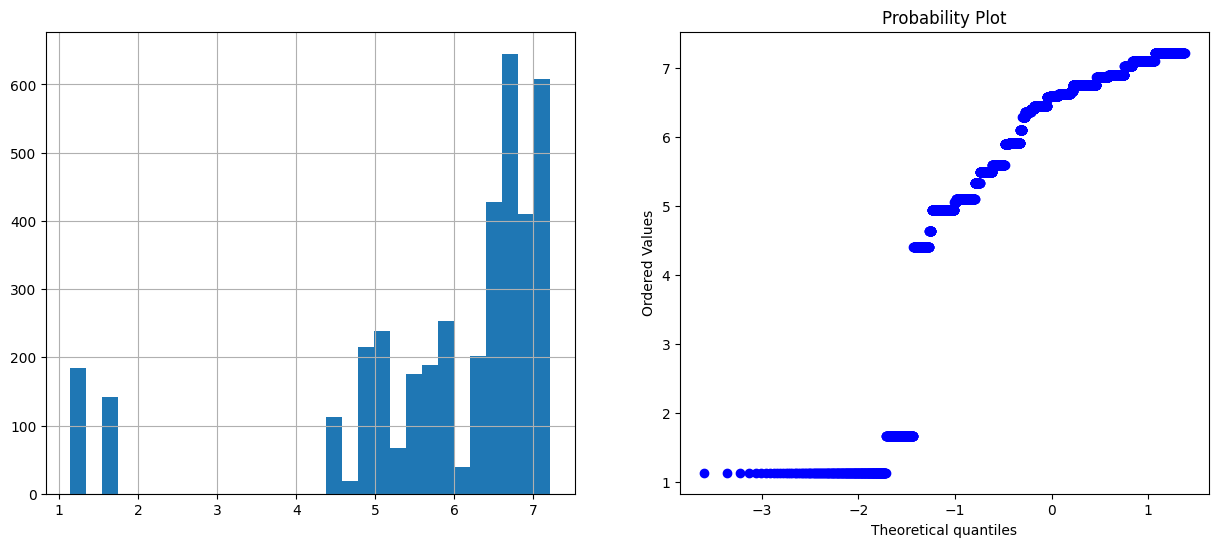

In [211]:
# use diagnostic plot function to evaluate transformation

# For lat Variable
diagnostic_plots(transform_method_3a, 'lat')

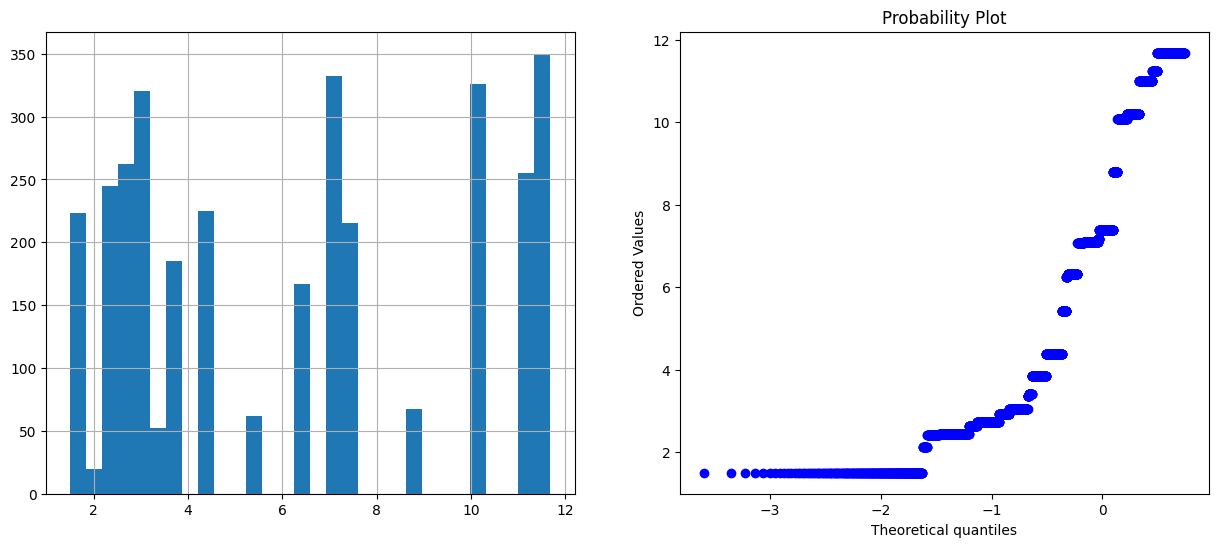

In [212]:
# For lng Variable
diagnostic_plots(transform_method_3a, 'lng')

In [213]:
transform_method_3a

,race_name,lap,circuit_name,location,country,lat,lng,alt,driver_name
0,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,11.685076,10.0,Jaime Alguersuari
1,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,11.685076,10.0,Michael Schumacher
2,Australian Grand Prix,11,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,11.685076,10.0,Mark Webber
3,Australian Grand Prix,12,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,11.685076,10.0,Fernando Alonso
4,Australian Grand Prix,13,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,11.685076,10.0,Felipe Massa
...,...,...,...,...,...,...,...,...,...
4284,Saudi Arabian Grand Prix,10,Jeddah Street Circuit,Jeddah,Saudi Arabia,4.641476,6.258818,15.0,Lando Norris
4285,Saudi Arabian Grand Prix,9,Jeddah Street Circuit,Jeddah,Saudi Arabia,4.641476,6.258818,15.0,George Russell
4286,Saudi Arabian Grand Prix,10,Jeddah Street Circuit,Jeddah,Saudi Arabia,4.641476,6.258818,15.0,Nicholas Latifi
4287,Saudi Arabian Grand Prix,13,Jeddah Street Circuit,Jeddah,Saudi Arabia,4.641476,6.258818,15.0,Yuki Tsunoda


### Method 3B: Cube Root Transformation with Feature-engine

In [214]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['lat', 'lng'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(lng_w)

PowerTransformer(exp=0.3333333333333333, variables=['lat', 'lng'])

In [215]:
# transform indicated variables within our dataframe
transform_method_3b = et.transform(lng_w)

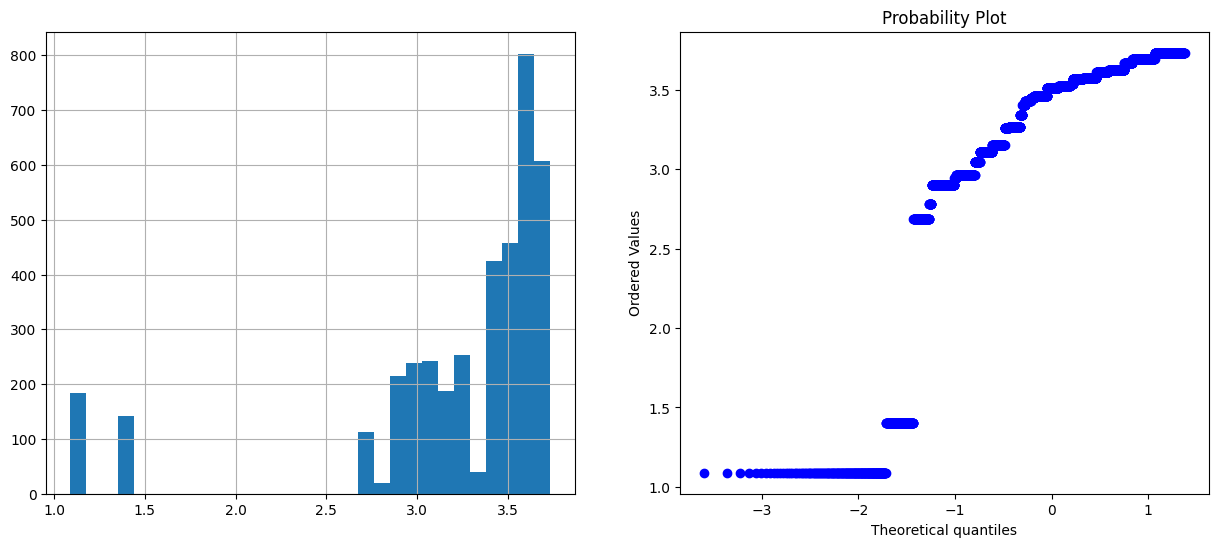

In [216]:
# use diagnostic plot function to evaluate transformation

# For lat Variable
diagnostic_plots(transform_method_3b, 'lat')

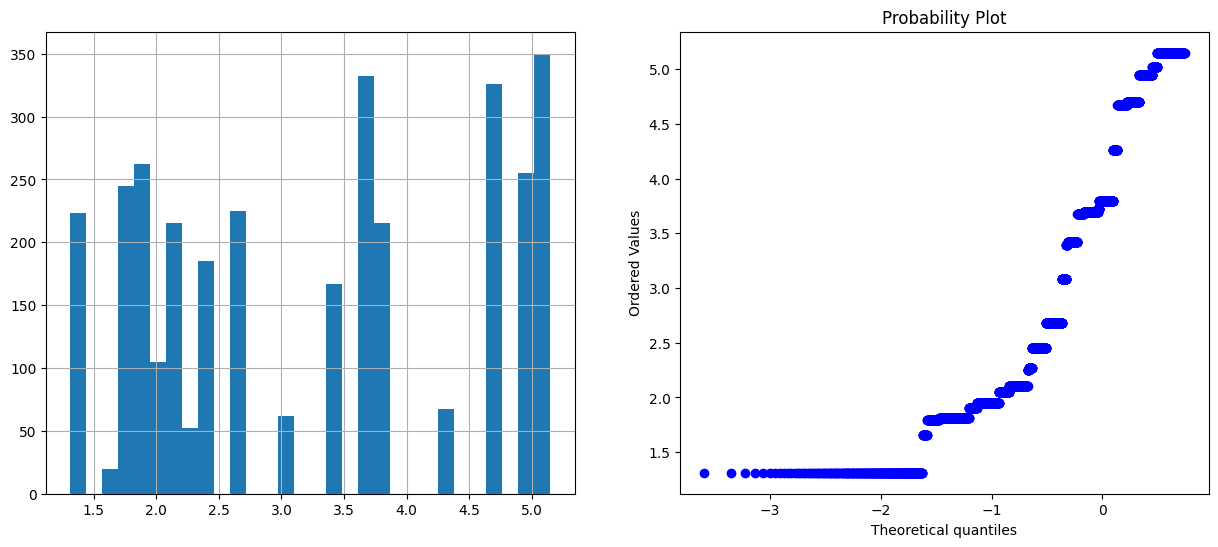

In [217]:
# For lng Variable
diagnostic_plots(transform_method_3b, 'lng')

In [218]:
transform_method_3b

,race_name,lap,circuit_name,location,country,lat,lng,alt,driver_name
0,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,5.149373,10.0,Jaime Alguersuari
1,Australian Grand Prix,1,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,5.149373,10.0,Michael Schumacher
2,Australian Grand Prix,11,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,5.149373,10.0,Mark Webber
3,Australian Grand Prix,12,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,5.149373,10.0,Fernando Alonso
4,Australian Grand Prix,13,Albert Park Grand Prix Circuit,Melbourne,Australia,NaN,5.149373,10.0,Felipe Massa
...,...,...,...,...,...,...,...,...,...
4284,Saudi Arabian Grand Prix,10,Jeddah Street Circuit,Jeddah,Saudi Arabia,2.782514,3.396213,15.0,Lando Norris
4285,Saudi Arabian Grand Prix,9,Jeddah Street Circuit,Jeddah,Saudi Arabia,2.782514,3.396213,15.0,George Russell
4286,Saudi Arabian Grand Prix,10,Jeddah Street Circuit,Jeddah,Saudi Arabia,2.782514,3.396213,15.0,Nicholas Latifi
4287,Saudi Arabian Grand Prix,13,Jeddah Street Circuit,Jeddah,Saudi Arabia,2.782514,3.396213,15.0,Yuki Tsunoda


### Method 4: Power Transformation

Exponential or power functions are mathematical transformations that follow 

\begin{equation}
X_t = X^{\lambda} 
\end{equation}

where $\lambda$ can be any exponent. 

The square and cube root transformations are special cases of power transformations where $\lambda$ is 1/2 or 1/3, respectively.

### Exponential transformation with Feature-engine

In [219]:
# initialize the transformer with the variables to transform and 
# the desired exponent

et = PowerTransformer(variables = ['lat', 'lng'], exp=0.3)

# fit transformer to data
et.fit(lng_w)

PowerTransformer(exp=0.3, variables=['lat', 'lng'])

In [220]:
# transform indicated variables in the dataset
transform_method_4 = et.transform(lng_w)

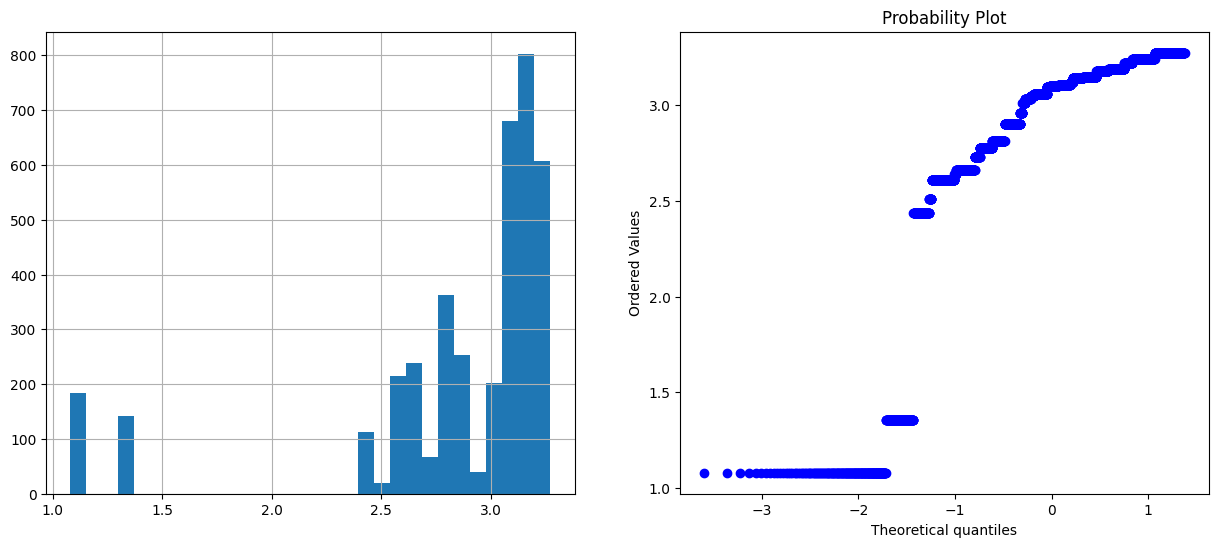

In [221]:
# use diagnostic plot function to evaluate transformation

# For lat Variable
diagnostic_plots(transform_method_4, 'lat')

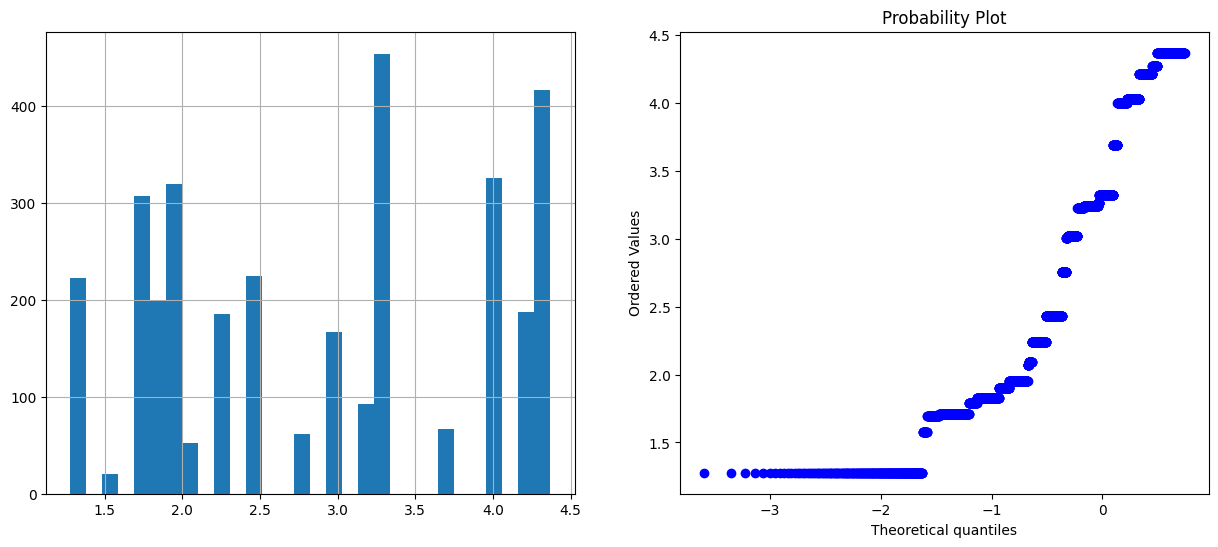

In [222]:
# For lng Variable
diagnostic_plots(transform_method_4, 'lng')

### Method 5: Box-Cox Transformation

The Box-Cox transformation belongs to the power family of functions and is defined by 

\begin{equation}
X_t = 
\begin{cases}
  (X^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0 \\    
  \log(X)  & \text{if } \lambda =0
\end{cases}
\end{equation}

where $X$ is the variable and λ is the transformation parameter. 

In the Box-Cox transformation, several values of λ are considered and the λ that returns the best transformation is selected.

### Box-Cox transformation with Feature-engine

In [223]:
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['lat', 'lng'] )

# fit transformer to the data set
# bct.fit(lng_w)


# Result: An error occured as shown below.

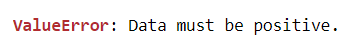

In [224]:
# The error states that the data in lat and lng variables before transformation is not positive
# This is because there are indeed negative values in lat and lng variables before transformation.
# This means that we are unable to transform lat and lng variables using Box-Cox transformation.

### Method 6: Yeo-Johnson Transformation

The Yeo-Johnson transformation is an extension of the Box-Cox transformation and can be used on variables with zero and negative values, as well as positive values. These transformations can be defined as follows:


\begin{equation}
X_t = 
\begin{cases}
  ((X+1)^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0, X \geq 0 \\    
  \log(X+1)  & \text{if } \lambda =0, X \geq 0\\
  -[(-X+1)^{2-\lambda} - 1] / (2-\lambda) & \text{if } \lambda \neq 2, X < 0 \\
   -\log(-X+1)  & \text{if } \lambda =2, X < 0\\
\end{cases}
\end{equation}


where $X$ is the variable and λ is the transformation parameter. 

### Yeo-Johnson transformation with Feature-engine

In [225]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['lat', 'lng'])

# fit transformer to the dataframe
yjt.fit(lng_w)

YeoJohnsonTransformer(variables=['lat', 'lng'])

In [226]:
# transform indicated variables

transform_method_6 = yjt.transform(lng_w)

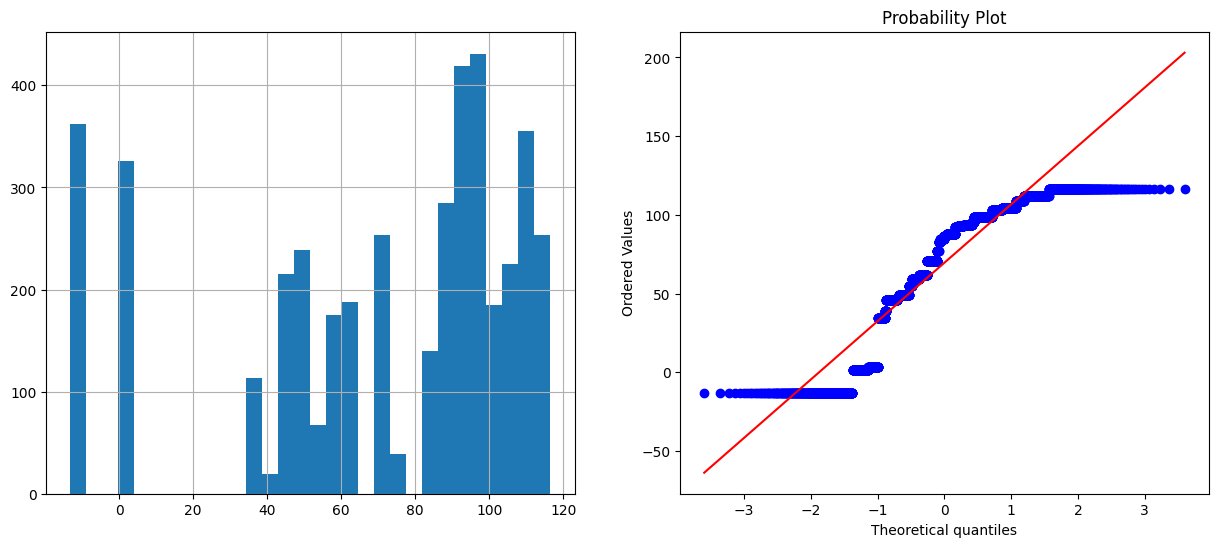

In [227]:
# use diagnostic plot function to evaluate transformation

# For lat Variable
diagnostic_plots(transform_method_6, 'lat')

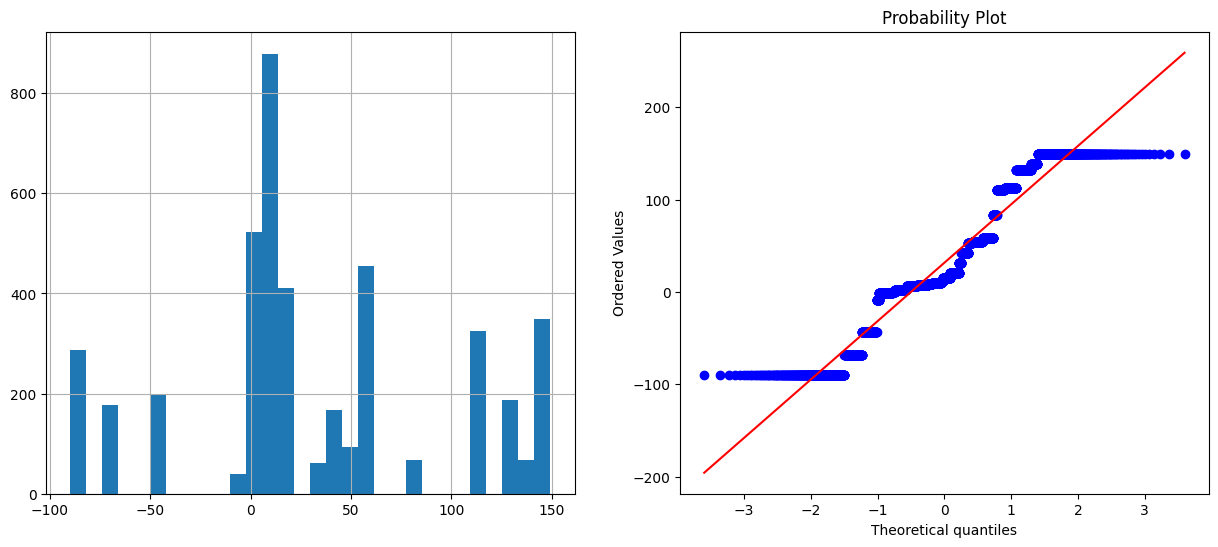

In [228]:
# For lng Variable
diagnostic_plots(transform_method_6, 'lng')

In [229]:
# the transformer stores the learned parameters for each variable
# in a dictionary as an attribute

yjt.lambda_dict_

{'lat': 1.2573333291673, 'lng': 1.0226759478096412}

### Distribution of Iat Variable Before Transformation

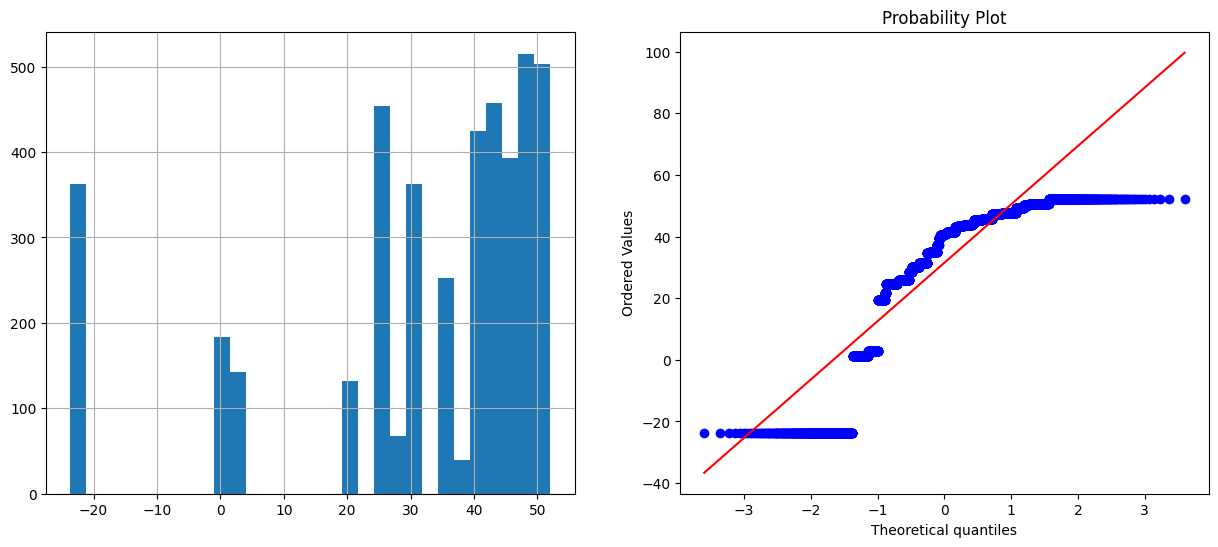

In [230]:
# check original distribution of lat Variable

diagnostic_plots(lng_w, 'lat')

### Summary of Results of the Different Methods to Transform lat Variable

In [231]:
# Using Logarithmic Transformation

# Result: An error occured.
# The error occurred because there are negative values in lat variable after transformation
# There are negative values in lat variable after transformation because there are values between 0 to 1 in 
# lat variables before transformation.
# When applying Logarithm calculation, the values becomes negative.
# This means that we are unable to transform lat variable using Logarithm calculation.

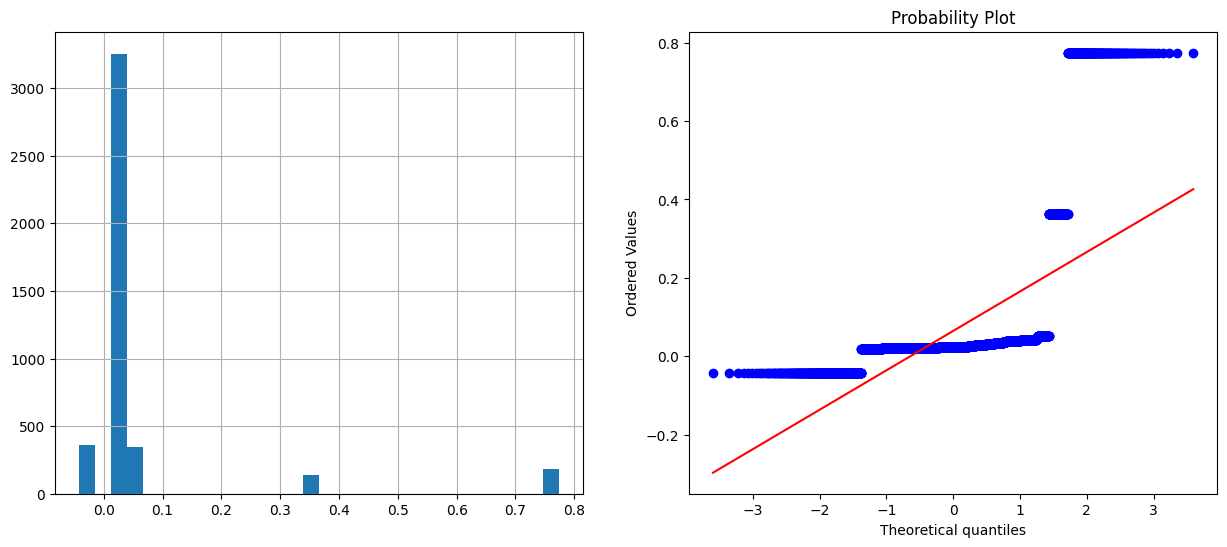

In [232]:
# Using Reciprocal Transformation

# For lat Variable
diagnostic_plots(transform_method_2, 'lat')

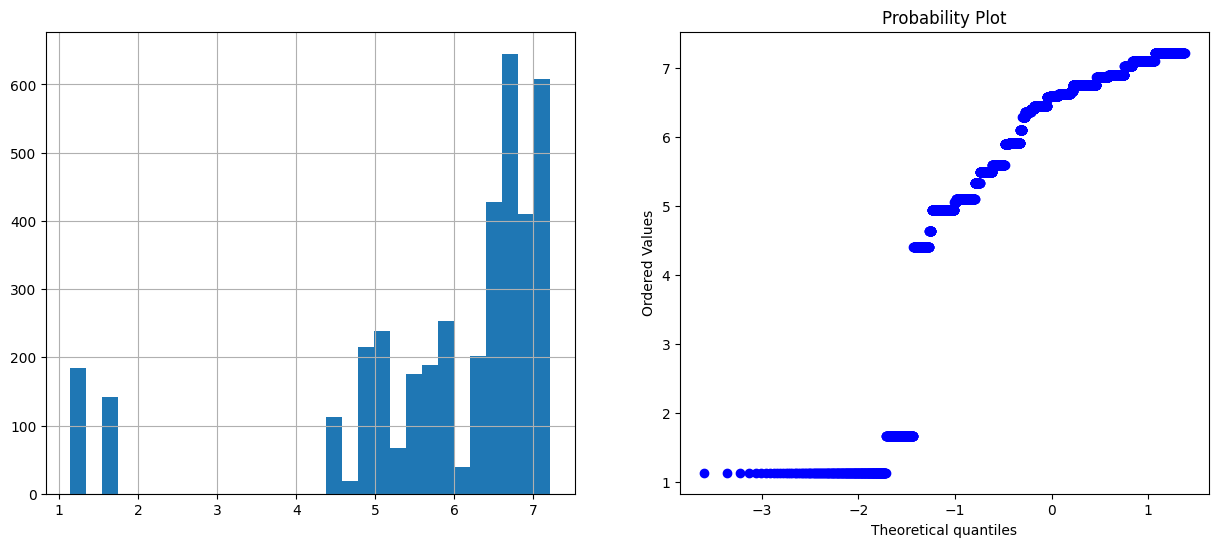

In [233]:
# Using Square Root Transformation

# For lat Variable
diagnostic_plots(transform_method_3a, 'lat')

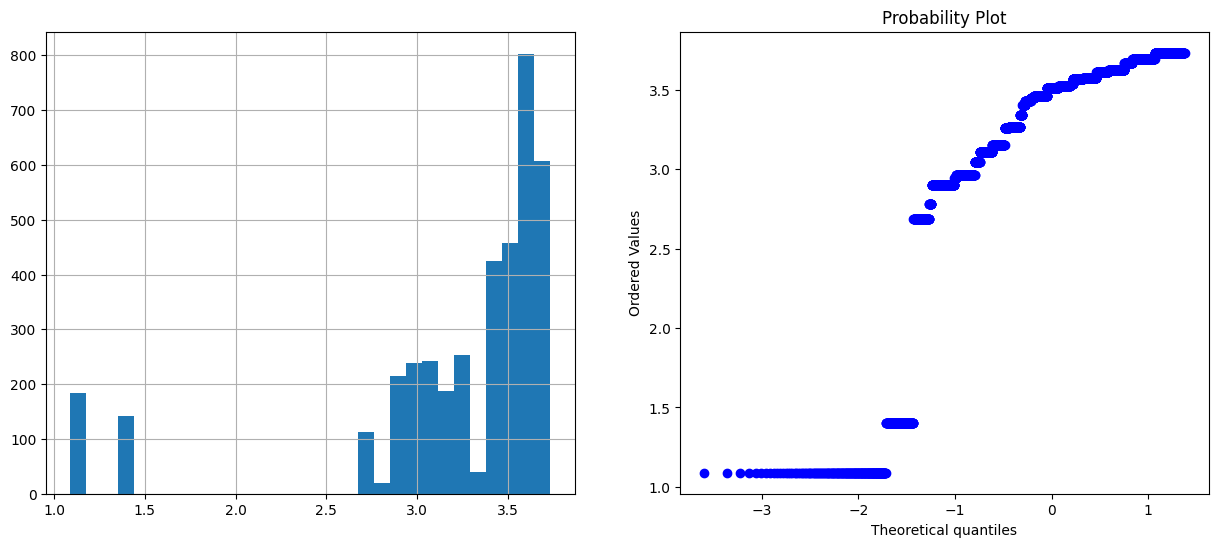

In [234]:
# Using Cube Root Transformation

# For lat Variable
diagnostic_plots(transform_method_3b, 'lat')

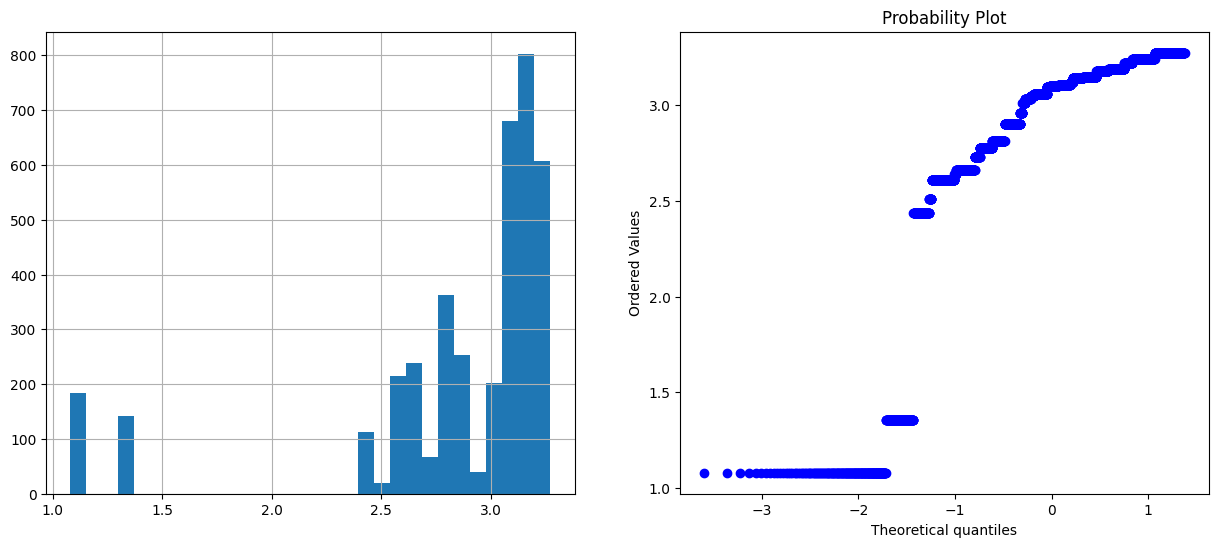

In [235]:
# Using Power Transformation

# For lat Variable
diagnostic_plots(transform_method_4, 'lat')

In [236]:
# Using Box-Cox Transformation

# Result: An error occured.
# The error states that the data in lat variable before transformation is not positive
# This is because there are indeed negative values in lat variable before transformation.
# This means that we are unable to transform lat variable using Box-Cox transformation.

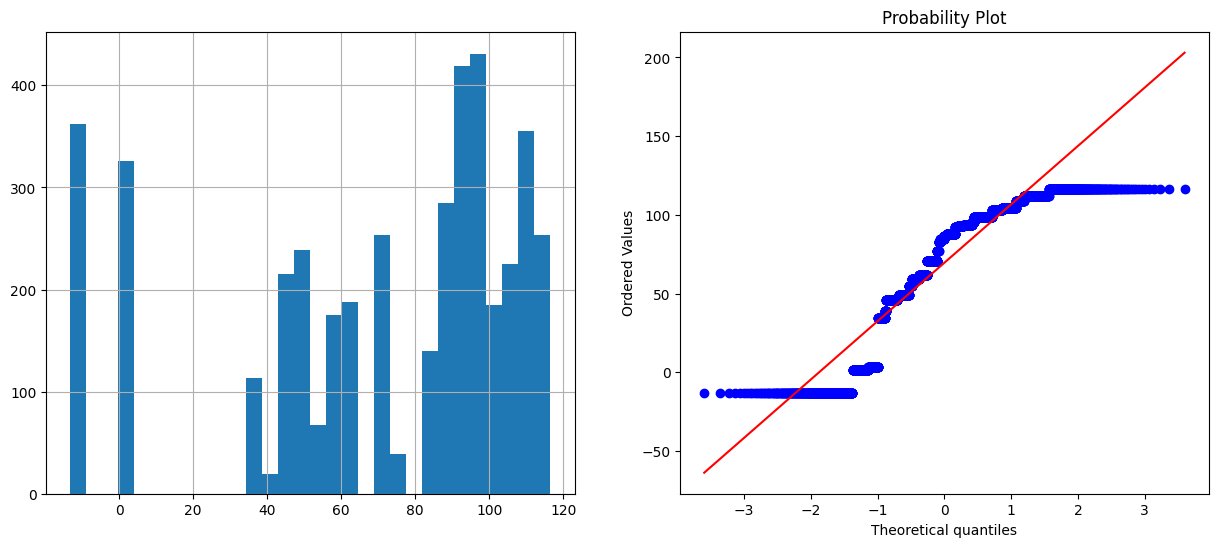

In [237]:
# Using Yeo-Johnson Transformation

# For lat Variable
diagnostic_plots(transform_method_6, 'lat')

### Decision on the Ideal Method to Transform Iat Variable into a Normal Distribution 

After trying all the different above methods to transform lat Variable, I can conclude that using Yeo-Johnson Transformation with Feature-engine is the best method to transform Iat Variable into a Normal Distribution. This is because there are more dots in the Q-Q plot of the post Yeo-Johnson Transformation with Feature-engine on lat Variable falling on the 45 degree red diagonal line than Q-Q plots of other post transformation methods on lat Variable. 

### Distribution of lng Variable Before Transformation

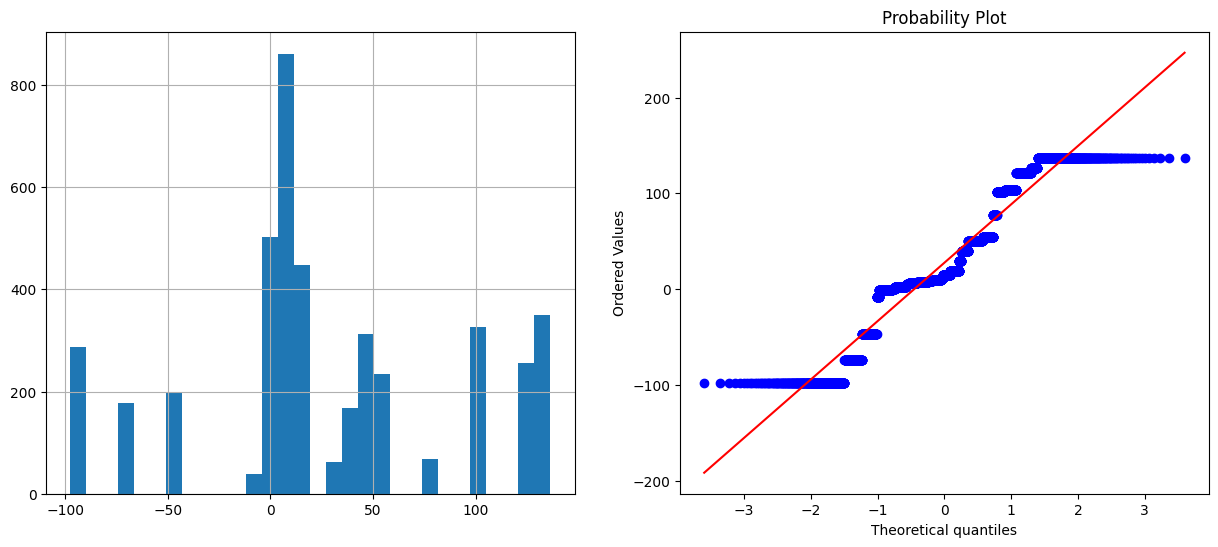

In [238]:
# check original distribution of lng Variable

diagnostic_plots(lng_w, 'lng')

### Summary of Results of the Different Methods to Transform lng Variable

In [239]:
# Using Logarithmic Transformation

# Result: An error occured.
# The error occurred because there are negative values in lng variable after transformation
# There are negative values in lng variable after transformation because there are values between 0 to 1 in 
# lng variables before transformation.
# When applying Logarithm calculation, the values becomes negative.
# This means that we are unable to transform lng variable using Logarithm calculation.

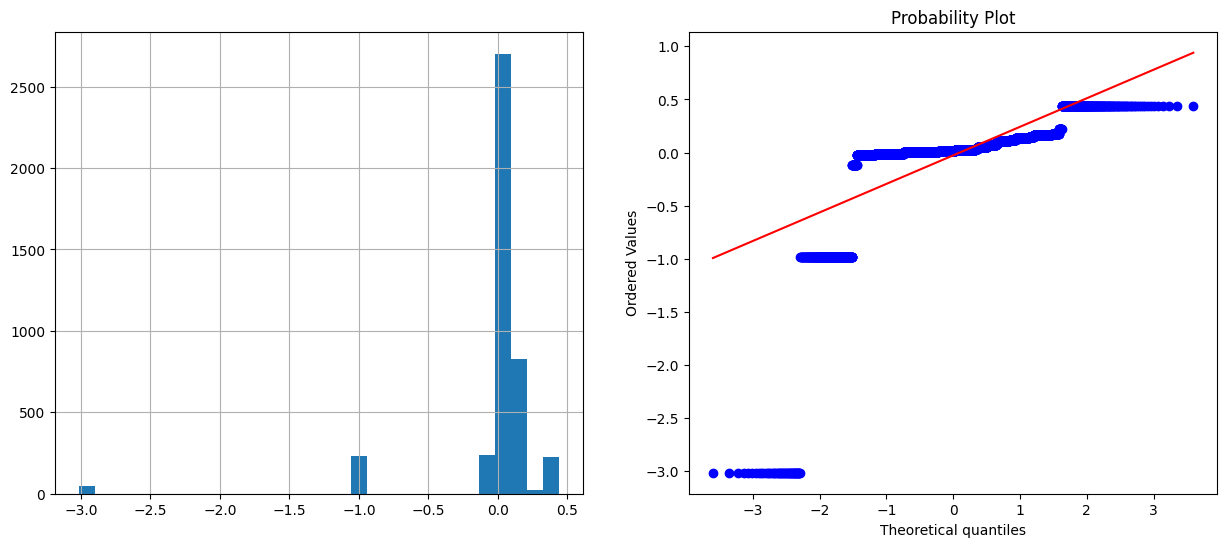

In [240]:
# Using Reciprocal Transformation

# For lng Variable
diagnostic_plots(transform_method_2, 'lng')

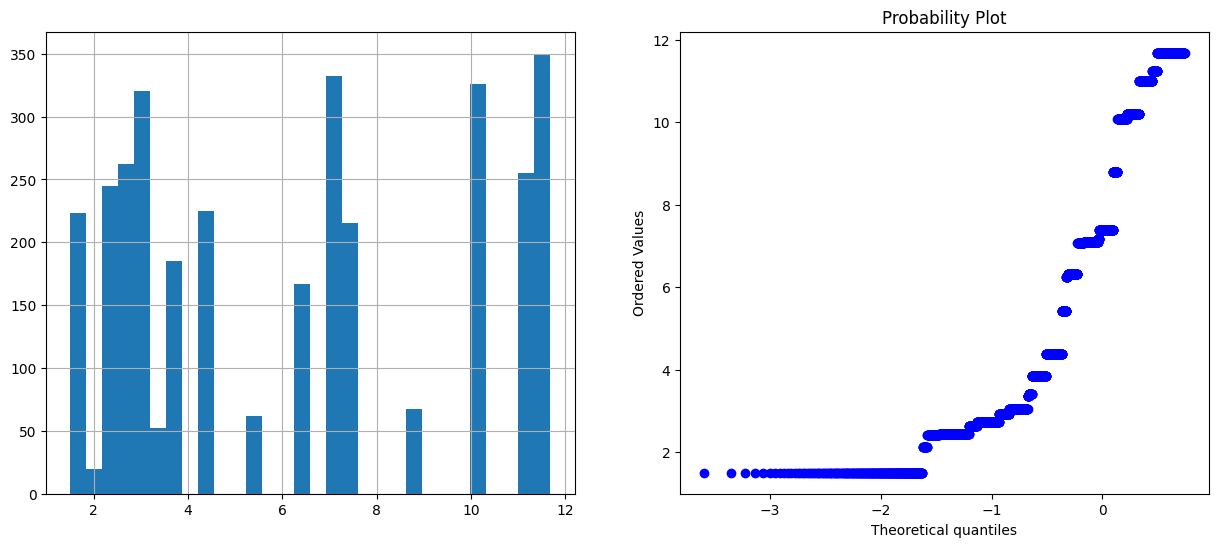

In [241]:
# Using Square Root Transformation

# For lng Variable
diagnostic_plots(transform_method_3a, 'lng')

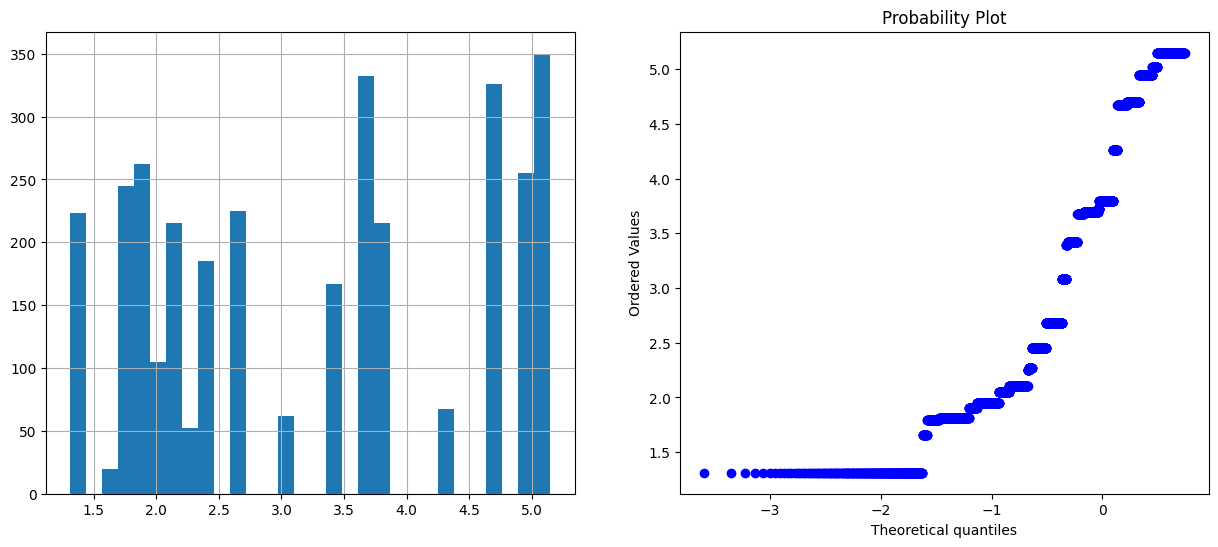

In [242]:
# Using Cube Root Transformation

# For lng Variable
diagnostic_plots(transform_method_3b, 'lng')

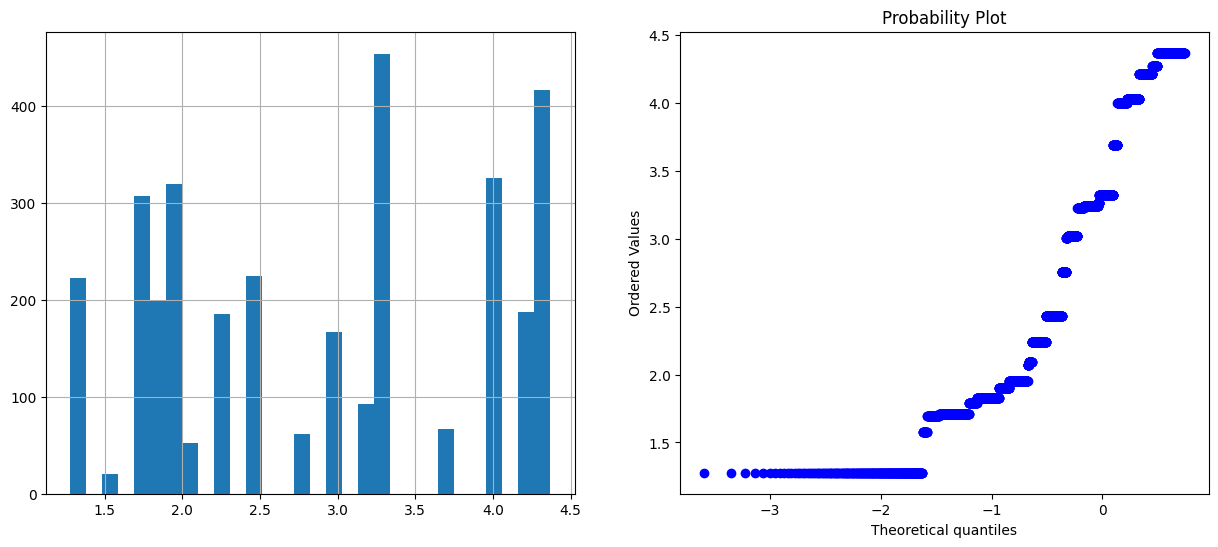

In [243]:
# Using Power Transformation

# For lng Variable
diagnostic_plots(transform_method_4, 'lng')

In [244]:
# Using Box-Cox Transformation

# Result: An error occured.
# The error states that the data in lng variable before transformation is not positive
# This is because there are indeed negative values in lng variable before transformation.
# This means that we are unable to transform lng variable using Box-Cox transformation.

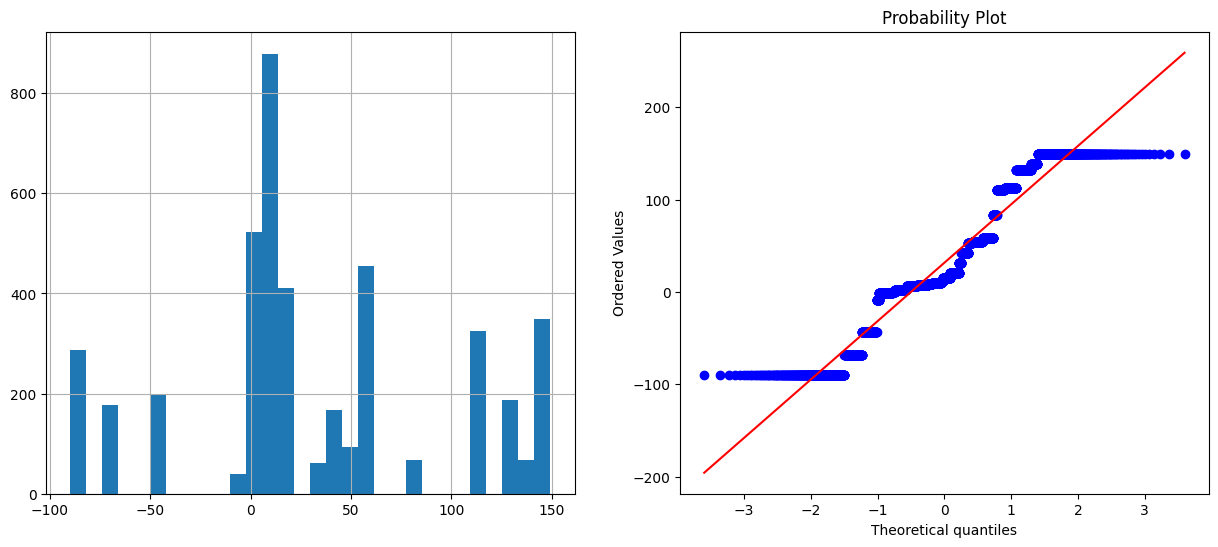

In [245]:
# Using Yeo-Johnson Transformation

# For lng Variable
diagnostic_plots(transform_method_6, 'lng')

### Decision on the Ideal Method to Transform lng Variable into a Normal Distribution 

After trying all the different above methods to transform lng Variable, I can conclude that using Yeo-Johnson Transformation with Feature-engine is also the best method to transform lng Variable into a Normal Distribution. This is because there are more dots in the Q-Q plot of the post Yeo-Johnson Transformation with Feature-engine on lng Variable falling on the 45 degree red diagonal line than Q-Q plots of other post transformation methods on lng Variable.

However, after comparing the results of distribution of post Yeo-Johnson Transformation with Feature-engine on lng variable to the distribution of lng Variable before transformation, there is not much difference between the distribution before and after transformation. This is because both results showed a similar number of dots falling on the 45 degree red diagonal line in the Q-Q plot. The only difference is the height of each bar in the histogram. It would be better if lng variable does not transformed into a Normal Distribution. By maintaining its values, lng variable would have a better model performance with lap variable later on.

Therefore, I decided not to transform lng Variable into a Normal Distribution.

### Final Confirmed Transformation of lat & lng Variables

In [246]:
# Based on the above decisions:

# 1. I would use Yeo-Johnson Transformation (Method 6) to tranform lat variable
# 2. I would not transform lng variable

In [247]:
# make a copy of the dataframe where we will store the modified
# variables

final_confirm_tran = lng_w.copy()

In [248]:
# Transforming lng variable using Yeo-Johnson Transformation (Method 6)

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['lat'])

# fit transformer to the dataframe
yjt.fit(lng_w)

YeoJohnsonTransformer(variables=['lat'])

In [249]:
# transform indicated variables in the dataset
final_confirm_tran = yjt.transform(lng_w)

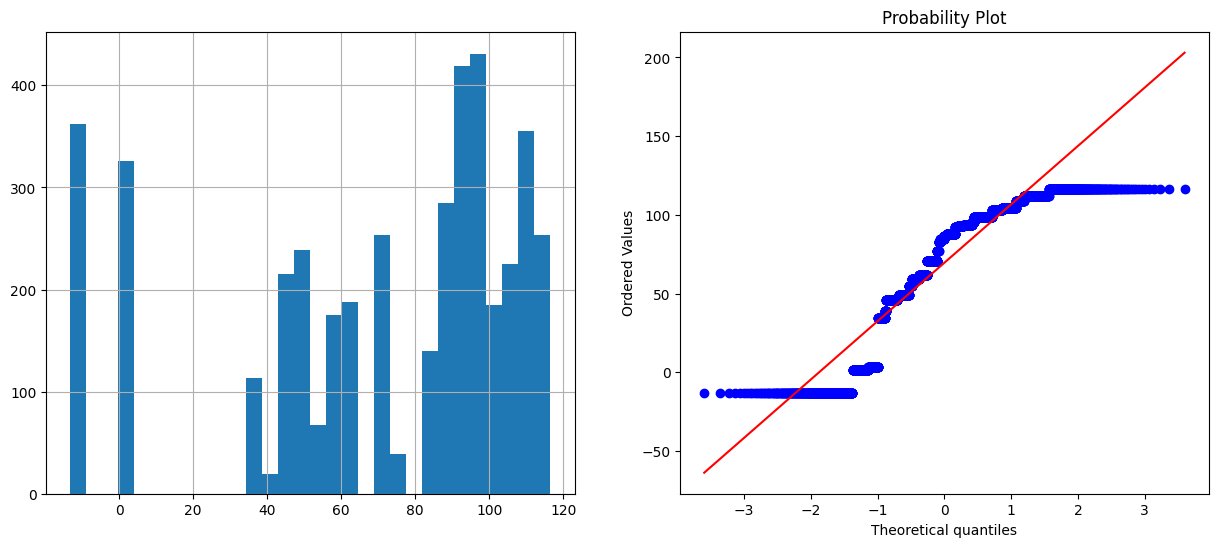

In [250]:
# use diagnostic plot function to evaluate transformation

# For lat Variable
diagnostic_plots(final_confirm_tran, 'lat')

I would now be using 'final_confirm_tran' instead of 'lng_w' for the remaining steps.

### 3.2.3. Train and Test Split

In [251]:
# Separating into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    final_confirm_tran.drop(labels=['lap'], axis=1),  # predictors
    final_confirm_tran['lap'],  # target
    test_size=0.3,  # percentage of observation in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((3002, 8), (1287, 8))

### 3.2.4. Missing Value Imputation

Missing Values are data that is not stored for certain observations within a variable. In other words, Missing Values is the absence of values, and is a common occurrence in most data sets.

It is necessary to handle Missing Values because...

1. Missing Values is not permitted by most data sources
2. Missing Values may also cause problems for many data transformation & feature engineering techniques

### Checking for Missing Values

In order to deal with Missing Values, we need to first check for null values in all variables.

In [252]:
# View number of items and data type of each column 
final_confirm_tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 4288
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   race_name     4289 non-null   object 
 1   lap           4289 non-null   int64  
 2   circuit_name  4289 non-null   object 
 3   location      4289 non-null   object 
 4   country       4289 non-null   object 
 5   lat           4289 non-null   float64
 6   lng           4289 non-null   float64
 7   alt           4269 non-null   float64
 8   driver_name   4289 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 335.1+ KB


In [253]:
# Check for null values in each column 
final_confirm_tran.isnull().any()

race_name       False
lap             False
circuit_name    False
location        False
country         False
lat             False
lng             False
alt              True
driver_name     False
dtype: bool

In [254]:
# Check the number of null values in data 
final_confirm_tran.isnull().sum()

race_name        0
lap              0
circuit_name     0
location         0
country          0
lat              0
lng              0
alt             20
driver_name      0
dtype: int64

### Are there any Missing Values?

From the results above, there is only 1 variable with missing values:

1. alt (Numerical Variable) (20 null values)

### Handling Missing Values in alt Variable (Numerical Variable)

Since alt Variable is a numerical variable, there are 6 methods to handle missing values in a Numerical Variable. 

Note that I would be imputing Missing Values with Feature-engine only.

### Method 1: Removing Observations with Missing Data

Complete Case Analysis (CCA), also called list-wise deletion of cases, consists of discarding those observations where the values in any of the variables are missing. CCA can be applied to categorical and numerical variables. CCA is quick and easy to implement and has the advantage that it preserves the distribution of the variables, provided the data is missing at random and only a small proportion of the data is missing. However, if data is missing across many variables, CCA may lead to the removal of a big portion of the dataset.

In [255]:
# make a copy of the dataframe where we will store result of the handling of missing values in alt Variable

data_impute_mtd_1 = final_confirm_tran.copy()

In [256]:
# create a complete case data set, indicate the variable "alt" that we would like the complete
data_cca = data_impute_mtd_1.dropna(subset=['alt'])

In [257]:
print('Number of total observations: {}'.format(len(final_confirm_tran)))
print('Number of observations with complete cases in Item_Weight Variable: {}'.format(len(data_cca)))

Number of total observations: 4289
Number of observations with complete cases in Item_Weight Variable: 4269


### Method 2: Performing Mean Imputation

Mean imputation consists of replacing missing values with the variable mean. This method can only be performed in numerical variables. 

The mean is calculated using a train set, and these values are used to impute missing data in train and test sets, as well as in future data that we intend to score with the machine learning model.

Note that using Mean Imputation may distort the distribution of the original variables.

Suitable to use Mean Imputation for Normally Distributed Variables.


### Mean Imputation with Feature-engine

In [258]:
# let's create a mean imputer

mean_imputer = MeanMedianImputer(imputation_method='mean',      
                                   variables=['alt'])

# Impute value is {'alt': 214.81517379679144}

### Method 3: Performing Median Imputation

Median imputation consists of replacing missing values with the variable median. This method can only be performed in numerical variables. 

The median is calculated using a train set, and these values are used to impute missing data in train and test sets, as well as in future data that we intend to score with the machine learning model. 

Note that using Median Imputation may distort the distribution of the original variables.

### Median Imputation with Feature-engine

In [259]:
# let's create a median imputer

median_imputer = MeanMedianImputer(imputation_method='median',  
                                   variables=['alt'])

# Impute value is {'alt': 45.0}

### Method 4: Replacing Missing Values by an Arbitrary Number

Arbitrary number means choosing any number that you would want for any reason you deem meaningful.  

Arbitrary number imputation consists of replacing missing values with an arbitrary value. Some commonly used values include 999, 9999, or -1 for positive distributions. This method is suitable for numerical variables. 

When replacing missing values with an arbitrary number, we need to be careful not to select a value close to the mean or the median, or any other common value of the distribution.

For Numerical Variables, the original variable distribution is likely distorted, thus this method is mostly used when...

- Data is not missing at random
- Building Non-Linear Models
- Percentage of Missing Values is High

### Arbitrary Imputation with Feature-engine

In [260]:
# let's create an arbitrary value imputer

arbit_imputer = ArbitraryNumberImputer(arbitrary_number=99,         
                                 variables=['alt'])

# Impute value is {'alt': 99}

### Method 5: Replacing Missing Values by a Value at the End of the Distribution

Replacing missing values with a value at the end of the variable distribution is equivalent to replacing them with an arbitrary value, but instead of identifying the arbitrary values manually, these values are automatically selected as those at the very end of the variable distribution. 

The values that are used to replace missing information are estimated using the mean plus or minus three times the standard deviation if the variable is normally distributed, or the inter-quartile range (IQR) proximity rule otherwise. According to the IQR proximity rule, missing values will be replaced with the 75th quantile + (IQR * 1.5) at the right tail or by the 25th quantile - (IQR * 1.5) at the left tail. The IQR is given by the 75th quantile - the 25th quantile.

The value that's used to replace missing information should be learned from the train set and stored to impute train, test, and future data. Feature-engine offers this functionality.

Note that End-of-tail imputation may distort the distribution of the original variables, so it may not be suitable for linear models.

### End tail imputation with Feature Engine

In [261]:
# End tail imputation with Feature-engine

# let's create a median imputer

# IQR limits -> right tail -> Q3 + 1.5*IQR
end_tail_imputer = EndTailImputer(imputation_method='iqr', tail='right', fold = 1.5,    
                         variables=['alt'])

# Impute value is {'alt': 474.5}

### Method 6: Random Sample Imputation

Random sampling imputation consists of extracting random observations from the pool of available values in the variable. Random sampling imputation preserves the original distribution, which differs from the other imputation techniques and is suitable for numerical and categorical variables alike. 

### Random Sample imputation with Feature Engine

In [262]:
# let's create a random sample imputer

ran_sam_imputer = RandomSampleImputer(variables=['alt'])

### Decision on the Ideal Method to handle Missing Values in alt Variable (Numerical Variable)

After trying all the different above methods to handle Missing Values in Item_Weight Variable, I decided to use Median Imputation to handle Missing Values in alt Variable.

This is because...

1. Method 1 which is about Removing Observations with Missing Data. It is quick and easy to implement. However, it does not  preserves the distribution of alt Variable even though the data is missing at random in alt Variable. If I were to use Method 1 to handle Missing Values in alt Variable, I would be only dropping 20 rows out of 4289 rows of data which is good. However, the current number of rows I have in the data is 4289. This number of rows is already quite little  for my prediction problem.


2. If I were to use Method 2, which is about Performing Mean Imputation, to handle Missing Values in alt Variable, values in alt variable would not have a consistent numerical format. This is because the impute value of the mean is 214.81517379679144. However, the maximum number of decimal places that a value would have in alt Variable is only 0. 


3. Method 3 which is about Performing Median Imputation is a great way to handle Missing Values in alt Variable. This is because the impute value of the median is 45.0. With that, the values in alt variable would have a consistent numerical format.


4. Method 4 is about Replacing missing values by an arbitrary number. The arbitrary value that I chose to impute is 99. There is just no particular reason to impute this number. It just does not make any sense. In addition, this method is only used when data is not missing at random. Values in alt variable does not satify this condition.


5. Method 5 which is about Replacing missing values by a value at the end of the distribution is similar to method 4. It is also not a great way to handle Missing Values in alt Variable. The value that I am imputing with this method is 474.5. If I were to use this method to handle Missing Values in altt Variable, the distribution of alt Variable will be affected.


6. Method 6 which is about using Random Sample Imputation. With method 6, I am able to preserve the original distribution. However, the range of values in alt variable is large. With a large range of values, the result of data modelling would be affected greatly by the imputation of random samples.

### Final Confirmed Missing Value Imputation Method for alt Variable

In [263]:
# For Missing Values in alt Variable (Using Median imputation with Feature Engine)

# Creating a median imputer
median_imputer = MeanMedianImputer(imputation_method='median',  
                                   variables=['alt'])

# Fitting the median imputer to the train set
median_imputer.fit(X_train)

MeanMedianImputer(variables=['alt'])

In [264]:
# transform the data
X_train_imputed = median_imputer.transform(X_train)
X_test_imputed = median_imputer.transform(X_test)

In [265]:
# check that null values in alt Variable were replaced
X_train_imputed['alt'].isnull().mean()

0.0

I would now be using 'X_train_imputed' instead of 'X_train' for the remaining steps.

### 3.2.5. Categorical Data Encoding

In [266]:
# Finding Categorical Variables in X_train_imputed, then display first 5 rows.
#'O' is Object

cat_cols = [c for c in X_train_imputed.columns if X_train_imputed[c].dtypes=='O'] 
X_train_imputed[cat_cols].head()

,race_name,circuit_name,location,country,driver_name
674,Spanish Grand Prix,Circuit de Barcelona-Catalunya,Montmeló,Spain,Romain Grosjean
2427,Japanese Grand Prix,Suzuka Circuit,Suzuka,Japan,Kimi Räikkönen
3100,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,Bahrain,Daniel Ricciardo
3430,United States Grand Prix,Circuit of the Americas,Austin,USA,Lewis Hamilton
3059,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,Bahrain,Narain Karthikeyan


### A Need to Encode the Categorical Data?

Based on the above results, I think it is necessary to encode the Categorical Data. This is so that Categorical Data can also be used as part of the overall revised dataset for computers to perform mathematical calculations and to determine suitable algorithms for models.

We can encode the Categorical Data by converting or transforming categorical data into numerical representations.


### Encoding race_name, circuit_name, location, country and driver_name Variables

Similarly, I would be encoding the Categorical Variables with Feature-engine only.

### Method 1: Creating Binary Variables through One-Hot Encoding

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

For example, we have a variable named **Gender**. **Gender** variable takes in 2 categories - **Male** and **Female**.

The one-hot encoded representation of the **Gender** variable with the categories of **Male** and **Female**  would then derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.

A categorical variable with k unique categories can be encoded in k-1 binary variables. For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information.

### One Hot Encoding with Feature-Engine

In [267]:
# let's create the encoder

ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=None,  
    
    # we can select which variables to encode
    variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'],
    
    # to indicate if we drop one of the binaries
    drop_last=True)    # to return k-1, false to return k

In [268]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train_imputed)

OneHotEncoder(drop_last=True,
              variables=['race_name', 'circuit_name', 'location', 'country',
                         'driver_name'])

In [269]:
# To see which variables the encoder will encode

ohe_enc.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [270]:
# let's transform train and test set

X_train_ohe_enc = ohe_enc.transform(X_train_imputed)
X_test_ohe_enc = ohe_enc.transform(X_test_imputed)

C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This

In [271]:
# let's inspect the encoded train set

X_train_ohe_enc.head()

,lat,lng,alt,race_name_Spanish Grand Prix,race_name_Japanese Grand Prix,race_name_Bahrain Grand Prix,race_name_United States Grand Prix,race_name_Qatar Grand Prix,race_name_Chinese Grand Prix,race_name_Italian Grand Prix,...,driver_name_Pedro de la Rosa,driver_name_Jarno Trulli,driver_name_Sergey Sirotkin,driver_name_Rubens Barrichello,driver_name_Karun Chandhok,driver_name_Nick Heidfeld,driver_name_Michael Schumacher,driver_name_Brendon Hartley,driver_name_Yuki Tsunoda,driver_name_Alexander Rossi
674,88.099370,2.26111,109.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2427,70.811669,136.54100,45.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3100,49.428265,50.51060,7.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3430,59.186889,-97.64110,161.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3059,49.428265,50.51060,7.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
# let's inspect the encoded test set

X_test_ohe_enc.head()

,lat,lng,alt,race_name_Spanish Grand Prix,race_name_Japanese Grand Prix,race_name_Bahrain Grand Prix,race_name_United States Grand Prix,race_name_Qatar Grand Prix,race_name_Chinese Grand Prix,race_name_Italian Grand Prix,...,driver_name_Pedro de la Rosa,driver_name_Jarno Trulli,driver_name_Sergey Sirotkin,driver_name_Rubens Barrichello,driver_name_Karun Chandhok,driver_name_Nick Heidfeld,driver_name_Michael Schumacher,driver_name_Brendon Hartley,driver_name_Yuki Tsunoda,driver_name_Alexander Rossi
499,86.479028,29.40500,130.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2771,45.799374,54.60310,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,3.410702,101.73800,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4130,92.534092,5.79167,432.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1877,111.975186,5.97139,401.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Method 2: Performing One-Hot Encoding of Frequent Categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. 

One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

### One Hot Encoding of Top Categories with Feature-Engine

In [273]:
# let's create the encoder

ohe_enc_top = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'],
     
    # to indicate if we drop one of the binaries
    drop_last=False)


# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc_top.fit(X_train_imputed)

OneHotEncoder(top_categories=5,
              variables=['race_name', 'circuit_name', 'location', 'country',
                         'driver_name'])

In [274]:
# To see which variables the encoder will encode

ohe_enc_top.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [275]:
# the encoder stores the most frequent labels per variable

ohe_enc_top.encoder_dict_

{'race_name': ['Hungarian Grand Prix',
  'Abu Dhabi Grand Prix',
  'Italian Grand Prix',
  'Spanish Grand Prix',
  'Bahrain Grand Prix'],
 'circuit_name': ['Bahrain International Circuit',
  'Silverstone Circuit',
  'Hungaroring',
  'Yas Marina Circuit',
  'Autodromo Nazionale di Monza'],
 'location': ['Sakhir', 'Silverstone', 'Budapest', 'Abu Dhabi', 'Monza'],
 'country': ['Italy', 'Spain', 'Bahrain', 'UK', 'UAE'],
 'driver_name': ['Sebastian Vettel',
  'Daniel Ricciardo',
  'Lewis Hamilton',
  'Sergio Pérez',
  'Kimi Räikkönen']}

In [276]:
# let's transform train and test sets

X_train_ohe_enc_top = ohe_enc_top.transform(X_train_imputed)
X_test_ohe_enc_top = ohe_enc_top.transform(X_test_imputed)

In [277]:
# let's inspect the encoded train set

X_train_ohe_enc_top.head()

,lat,lng,alt,race_name_Hungarian Grand Prix,race_name_Abu Dhabi Grand Prix,race_name_Italian Grand Prix,race_name_Spanish Grand Prix,race_name_Bahrain Grand Prix,circuit_name_Bahrain International Circuit,circuit_name_Silverstone Circuit,...,country_Italy,country_Spain,country_Bahrain,country_UK,country_UAE,driver_name_Sebastian Vettel,driver_name_Daniel Ricciardo,driver_name_Lewis Hamilton,driver_name_Sergio Pérez,driver_name_Kimi Räikkönen
674,88.099370,2.26111,109.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2427,70.811669,136.54100,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3100,49.428265,50.51060,7.0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3430,59.186889,-97.64110,161.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3059,49.428265,50.51060,7.0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [278]:
# let's inspect the encoded test set
X_test_ohe_enc_top.head()

,lat,lng,alt,race_name_Hungarian Grand Prix,race_name_Abu Dhabi Grand Prix,race_name_Italian Grand Prix,race_name_Spanish Grand Prix,race_name_Bahrain Grand Prix,circuit_name_Bahrain International Circuit,circuit_name_Silverstone Circuit,...,country_Italy,country_Spain,country_Bahrain,country_UK,country_UAE,driver_name_Sebastian Vettel,driver_name_Daniel Ricciardo,driver_name_Lewis Hamilton,driver_name_Sergio Pérez,driver_name_Kimi Räikkönen
499,86.479028,29.40500,130.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2771,45.799374,54.60310,3.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
217,3.410702,101.73800,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4130,92.534092,5.79167,432.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1877,111.975186,5.97139,401.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Method 3: Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are assigned arbitrarily. 

Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. 

### Ordinal Encoding with Feature-Engine

In [279]:
# let's create the encoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',  
    variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'])

In [280]:
# let's fit the encoder to the train set

ordinal_enc.fit(X_train_imputed)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['race_name', 'circuit_name', 'location', 'country',
                          'driver_name'])

In [281]:
# let's inspect which variables the encoder will encode

ordinal_enc.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [282]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

{'race_name': {'Spanish Grand Prix': 0,
  'Japanese Grand Prix': 1,
  'Bahrain Grand Prix': 2,
  'United States Grand Prix': 3,
  'Qatar Grand Prix': 4,
  'Chinese Grand Prix': 5,
  'Italian Grand Prix': 6,
  'Monaco Grand Prix': 7,
  'Malaysian Grand Prix': 8,
  'German Grand Prix': 9,
  'Korean Grand Prix': 10,
  'Singapore Grand Prix': 11,
  'Austrian Grand Prix': 12,
  'São Paulo Grand Prix': 13,
  'Russian Grand Prix': 14,
  'Styrian Grand Prix': 15,
  'Canadian Grand Prix': 16,
  'Australian Grand Prix': 17,
  'European Grand Prix': 18,
  'British Grand Prix': 19,
  '70th Anniversary Grand Prix': 20,
  'Abu Dhabi Grand Prix': 21,
  'Mexico City Grand Prix': 22,
  'Belgian Grand Prix': 23,
  'Saudi Arabian Grand Prix': 24,
  'Indian Grand Prix': 25,
  'Brazilian Grand Prix': 26,
  'Azerbaijan Grand Prix': 27,
  'Hungarian Grand Prix': 28,
  'Mexican Grand Prix': 29,
  'French Grand Prix': 30,
  'Emilia Romagna Grand Prix': 31,
  'Turkish Grand Prix': 32,
  'Dutch Grand Prix': 33,


In [283]:
# let's transform the train and test sets

X_train_ordinal_enc = ordinal_enc.transform(X_train_imputed)
X_test_ordinal_enc= ordinal_enc.transform(X_test_imputed)

C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) driver_name.
  warnings.warn(


In [284]:
# let's explore the result

X_train_ordinal_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
674,0,0,0,0,88.099370,2.26111,109.0,0
2427,1,1,1,1,70.811669,136.54100,45.0,1
3100,2,2,2,2,49.428265,50.51060,7.0,2
3430,3,3,3,3,59.186889,-97.64110,161.0,3
3059,2,2,2,2,49.428265,50.51060,7.0,4


### Method 4: Replacing Categories with Counts of Observations

In count encoding, we replace the categories with the count of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding.

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

### Count Encoding with Feature-Engine

In [285]:
# let's create an encoder

count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'])

In [286]:
# fit the encoder to the train set
count_enc.fit(X_train_imputed)

CountFrequencyEncoder(variables=['race_name', 'circuit_name', 'location',
                                 'country', 'driver_name'])

In [287]:
# the encoder stores the variables it will encode

count_enc.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [288]:
# in the encoder dict contains the counts per category per variable

count_enc.encoder_dict_

{'race_name': {'Hungarian Grand Prix': 158,
  'Abu Dhabi Grand Prix': 158,
  'Italian Grand Prix': 157,
  'Spanish Grand Prix': 150,
  'Bahrain Grand Prix': 147,
  'British Grand Prix': 143,
  'Monaco Grand Prix': 140,
  'Japanese Grand Prix': 135,
  'Chinese Grand Prix': 130,
  'Belgian Grand Prix': 129,
  'Singapore Grand Prix': 128,
  'United States Grand Prix': 127,
  'Brazilian Grand Prix': 122,
  'Canadian Grand Prix': 119,
  'Australian Grand Prix': 118,
  'Russian Grand Prix': 108,
  'German Grand Prix': 106,
  'Austrian Grand Prix': 98,
  'Malaysian Grand Prix': 93,
  'Mexican Grand Prix': 70,
  'European Grand Prix': 54,
  'Azerbaijan Grand Prix': 52,
  'Korean Grand Prix': 50,
  'French Grand Prix': 44,
  'Indian Grand Prix': 43,
  'Turkish Grand Prix': 35,
  'Emilia Romagna Grand Prix': 29,
  'Portuguese Grand Prix': 26,
  'Styrian Grand Prix': 23,
  '70th Anniversary Grand Prix': 18,
  'Dutch Grand Prix': 15,
  'Mexico City Grand Prix': 15,
  'Sakhir Grand Prix': 14,
  'Sã

In [289]:
# let's transform train and test sets

X_train_count_enc = count_enc.transform(X_train_imputed)
X_test_count_enc = count_enc.transform(X_test_imputed)

C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) driver_name.
  warnings.warn(


In [290]:
# let's inspect the result

X_train_count_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
674,150,150,150,187,88.099370,2.26111,109.0,108
2427,135,135,135,135,70.811669,136.54100,45.0,128
3100,147,161,161,161,49.428265,50.51060,7.0,147
3430,127,127,127,127,59.186889,-97.64110,161.0,147
3059,147,161,161,161,49.428265,50.51060,7.0,16


In [291]:
X_test_count_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
499,35,35,35,35,86.479028,29.40500,130.0,10.0
2771,158,158,158,158,45.799374,54.60310,3.0,51.0
217,93,93,93,93,3.410702,101.73800,18.0,144.0
4130,44,44,44,44,92.534092,5.79167,432.0,47.0
1877,129,129,129,129,111.975186,5.97139,401.0,147.0


### Method 5: Replacing Categories with Frequency of observations

In frequency encoding, we replace the categories with the percentage of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 0.1 if performing frequency encoding. 

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

### Frequency Encoding with Feature-Engine

In [292]:
# let's create an encoder

freq_enc = CountFrequencyEncoder(
    encoding_method='frequency', 
    variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'])

In [293]:
# fit the encoder to the train set
freq_enc.fit(X_train_imputed)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['race_name', 'circuit_name', 'location',
                                 'country', 'driver_name'])

In [294]:
# the encoder stores the variables it will encode

freq_enc.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [295]:
# in the encoder dict contains the frequencies per category per variable

freq_enc.encoder_dict_

{'race_name': {'Hungarian Grand Prix': 0.05263157894736842,
  'Abu Dhabi Grand Prix': 0.05263157894736842,
  'Italian Grand Prix': 0.05229846768820786,
  'Spanish Grand Prix': 0.049966688874083946,
  'Bahrain Grand Prix': 0.048967355096602265,
  'British Grand Prix': 0.047634910059960026,
  'Monaco Grand Prix': 0.046635576282478344,
  'Japanese Grand Prix': 0.04497001998667555,
  'Chinese Grand Prix': 0.04330446369087275,
  'Belgian Grand Prix': 0.04297135243171219,
  'Singapore Grand Prix': 0.04263824117255163,
  'United States Grand Prix': 0.042305129913391075,
  'Brazilian Grand Prix': 0.04063957361758828,
  'Canadian Grand Prix': 0.039640239840106596,
  'Australian Grand Prix': 0.03930712858094604,
  'Russian Grand Prix': 0.03597601598934044,
  'German Grand Prix': 0.03530979347101932,
  'Austrian Grand Prix': 0.03264490339773484,
  'Malaysian Grand Prix': 0.030979347101932047,
  'Mexican Grand Prix': 0.023317788141239172,
  'European Grand Prix': 0.01798800799467022,
  'Azerbaijan

In [296]:
# let's transform train and test sets

X_train_freq_enc = freq_enc.transform(X_train_imputed)
X_test_freq_enc = freq_enc.transform(X_test_imputed)

C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) driver_name.
  warnings.warn(


In [297]:
# let's inspect the result

X_train_freq_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
674,0.049967,0.049967,0.049967,0.062292,88.099370,2.26111,109.0,0.035976
2427,0.044970,0.044970,0.044970,0.044970,70.811669,136.54100,45.0,0.042638
3100,0.048967,0.053631,0.053631,0.053631,49.428265,50.51060,7.0,0.048967
3430,0.042305,0.042305,0.042305,0.042305,59.186889,-97.64110,161.0,0.048967
3059,0.048967,0.053631,0.053631,0.053631,49.428265,50.51060,7.0,0.005330


In [298]:
X_test_freq_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
499,0.011659,0.011659,0.011659,0.011659,86.479028,29.40500,130.0,0.003331
2771,0.052632,0.052632,0.052632,0.052632,45.799374,54.60310,3.0,0.016989
217,0.030979,0.030979,0.030979,0.030979,3.410702,101.73800,18.0,0.047968
4130,0.014657,0.014657,0.014657,0.014657,92.534092,5.79167,432.0,0.015656
1877,0.042971,0.042971,0.042971,0.042971,111.975186,5.97139,401.0,0.048967


### Method 6: Encoding with Integers in an Ordered Manner

In Method 3: Replacing categories with ordinal numbers, I replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, that encoding method may not work so well with linear models.

I can instead assign integers to the categories given the target values. To do this, do the following:
* 1.Calculate the mean value of the target per category.
* 2.Order the categories from the one with the lowest to the one with the highest target mean value.
* 3.Assign digits to the ordered categories, starting with 0 to the first category all of the way up to `k-1` to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

Monotonic means strictly increasing or decreasing.

### Ordered Integer Encoding with Feature-Engine

In [299]:
# let's create the encoder

ordinal_int_enc = OrdinalEncoder(
    encoding_method='ordered',
    variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'])

In [300]:
# when fitting the transformer, we need to pass the target as well

ordinal_int_enc.fit(X_train_imputed, y_train)

OrdinalEncoder(variables=['race_name', 'circuit_name', 'location', 'country',
                          'driver_name'])

In [301]:
# the encoder stores the variables that it will encode

ordinal_int_enc.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [302]:
# in the encoder dict we can observe the numbers that will
# replace in each category in each variable

ordinal_int_enc.encoder_dict_

{'race_name': {'Tuscan Grand Prix': 0,
  'São Paulo Grand Prix': 1,
  'Belgian Grand Prix': 2,
  'Bahrain Grand Prix': 3,
  'Malaysian Grand Prix': 4,
  'Saudi Arabian Grand Prix': 5,
  'Chinese Grand Prix': 6,
  'Azerbaijan Grand Prix': 7,
  'Singapore Grand Prix': 8,
  'Korean Grand Prix': 9,
  'Japanese Grand Prix': 10,
  'British Grand Prix': 11,
  'European Grand Prix': 12,
  'Portuguese Grand Prix': 13,
  'German Grand Prix': 14,
  '70th Anniversary Grand Prix': 15,
  'United States Grand Prix': 16,
  'Brazilian Grand Prix': 17,
  'Australian Grand Prix': 18,
  'Hungarian Grand Prix': 19,
  'Spanish Grand Prix': 20,
  'Abu Dhabi Grand Prix': 21,
  'Eifel Grand Prix': 22,
  'Mexican Grand Prix': 23,
  'Turkish Grand Prix': 24,
  'Indian Grand Prix': 25,
  'Russian Grand Prix': 26,
  'Italian Grand Prix': 27,
  'Qatar Grand Prix': 28,
  'Canadian Grand Prix': 29,
  'Mexico City Grand Prix': 30,
  'Emilia Romagna Grand Prix': 31,
  'French Grand Prix': 32,
  'Austrian Grand Prix': 3

In [303]:
# let's transform train and test sets

X_train_ordinal_int_enc = ordinal_int_enc.transform(X_train_imputed)
X_test_ordinal_int_enc = ordinal_int_enc.transform(X_test_imputed)

C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) driver_name.
  warnings.warn(


In [304]:
# let's inspect the result

X_train_ordinal_int_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
674,20,19,19,15,88.099370,2.26111,109.0,47
2427,10,9,9,8,70.811669,136.54100,45.0,44
3100,3,7,7,6,49.428265,50.51060,7.0,35
3430,16,16,16,13,59.186889,-97.64110,161.0,48
3059,3,7,7,6,49.428265,50.51060,7.0,60


In [305]:
X_test_ordinal_int_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
499,24,22,22,19,86.479028,29.40500,130.0,23.0
2771,21,20,20,17,45.799374,54.60310,3.0,62.0
217,4,2,2,1,3.410702,101.73800,18.0,50.0
4130,32,29,29,25,92.534092,5.79167,432.0,43.0
1877,2,1,1,0,111.975186,5.97139,401.0,48.0


### Method 7: Encoding with the Mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target.

### Target Mean Encoding with Feature-Engine

In [306]:
# let's create the encoder

mean_enc = MeanEncoder(variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'])

In [307]:
# when fitting the transformer, we need to pass the target as well

mean_enc.fit(X_train_imputed, y_train)

MeanEncoder(variables=['race_name', 'circuit_name', 'location', 'country',
                       'driver_name'])

In [308]:
# the encoder stores variables that will be encoded

mean_enc.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [309]:
# in the encoder dict we can observe the target mean per category
# per variable

mean_enc.encoder_dict_

{'race_name': {'70th Anniversary Grand Prix': 15.5,
  'Abu Dhabi Grand Prix': 17.088607594936708,
  'Australian Grand Prix': 16.127118644067796,
  'Austrian Grand Prix': 23.489795918367346,
  'Azerbaijan Grand Prix': 11.865384615384615,
  'Bahrain Grand Prix': 10.428571428571429,
  'Belgian Grand Prix': 10.248062015503876,
  'Brazilian Grand Prix': 16.10655737704918,
  'British Grand Prix': 13.160839160839162,
  'Canadian Grand Prix': 21.142857142857142,
  'Chinese Grand Prix': 11.638461538461538,
  'Dutch Grand Prix': 25.533333333333335,
  'Eifel Grand Prix': 17.454545454545453,
  'Emilia Romagna Grand Prix': 22.17241379310345,
  'European Grand Prix': 13.62962962962963,
  'French Grand Prix': 23.0,
  'German Grand Prix': 14.320754716981131,
  'Hungarian Grand Prix': 16.556962025316455,
  'Indian Grand Prix': 19.0,
  'Italian Grand Prix': 20.394904458598727,
  'Japanese Grand Prix': 12.540740740740741,
  'Korean Grand Prix': 12.26,
  'Malaysian Grand Prix': 10.483870967741936,
  'Mexi

In [310]:
# let's transform train and test set

X_train_mean_enc = mean_enc.transform(X_train_imputed)
X_test_mean_enc = mean_enc.transform(X_test_imputed)

C:\Users\mante\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) driver_name.
  warnings.warn(


In [311]:
# let's inspect the result

X_train_mean_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
674,16.720000,16.720000,16.720000,16.347594,88.099370,2.26111,109.0,17.314815
2427,12.540741,12.540741,12.540741,12.540741,70.811669,136.54100,45.0,17.046875
3100,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,16.217687
3430,15.716535,15.716535,15.716535,15.716535,59.186889,-97.64110,161.0,17.374150
3059,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,19.000000


In [312]:
X_test_mean_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
499,18.885714,18.885714,18.885714,18.885714,86.479028,29.40500,130.0,14.800000
2771,17.088608,17.088608,17.088608,17.088608,45.799374,54.60310,3.0,19.372549
217,10.483871,10.483871,10.483871,10.483871,3.410702,101.73800,18.0,17.506944
4130,23.000000,23.000000,23.000000,23.000000,92.534092,5.79167,432.0,16.936170
1877,10.248062,10.248062,10.248062,10.248062,111.975186,5.97139,401.0,17.374150


### Method 8: Grouping Rare or Infrequent Categories

Rare values are those categories that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare. Infrequent labels often appear only on the train set or only on the test set, therefore making the algorithms prone to overfitting or unable to score an observation. To avoid these complications, we can group infrequent categories into a new category called Rare or Other.

In [313]:
### Rare Label Encoding with Feature-Engine

In [314]:
# let's create the Rare category encoder

rare_encoder = RareLabelEncoder(tol=0.05, 
                                n_categories=4,    # minimum cardinality in order to group infrequent categories.
                                variables=['race_name', 'circuit_name', 'location', 'country', 'driver_name'],
                                replace_with='Rare')  

In [315]:
# let's fit the encoder to the train set

rare_encoder.fit(X_train_imputed)

RareLabelEncoder(n_categories=4,
                 variables=['race_name', 'circuit_name', 'location', 'country',
                            'driver_name'])

In [316]:
# the encoder stores variables that will be encoded

rare_encoder.variables

['race_name', 'circuit_name', 'location', 'country', 'driver_name']

In [317]:
# in the encoder dict we can observe the number of 
# observations per category for each variable

rare_encoder.encoder_dict_

{'race_name': ['Hungarian Grand Prix',
  'Abu Dhabi Grand Prix',
  'Italian Grand Prix'],
 'circuit_name': ['Bahrain International Circuit',
  'Silverstone Circuit',
  'Hungaroring',
  'Yas Marina Circuit',
  'Autodromo Nazionale di Monza'],
 'location': ['Sakhir', 'Silverstone', 'Budapest', 'Abu Dhabi', 'Monza'],
 'country': ['Italy', 'Spain', 'Bahrain', 'UK', 'UAE', 'Hungary'],
 'driver_name': ['Sebastian Vettel']}

In [318]:
# let's transform the train and test sets

X_train_rare_enc = rare_encoder.transform(X_train_imputed)
X_test_rare_enc = rare_encoder.transform(X_test_imputed)

In [319]:
# let's inspect the result

X_train_rare_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
674,Rare,Rare,Rare,Spain,88.099370,2.26111,109.0,Rare
2427,Rare,Rare,Rare,Rare,70.811669,136.54100,45.0,Rare
3100,Rare,Bahrain International Circuit,Sakhir,Bahrain,49.428265,50.51060,7.0,Rare
3430,Rare,Rare,Rare,Rare,59.186889,-97.64110,161.0,Rare
3059,Rare,Bahrain International Circuit,Sakhir,Bahrain,49.428265,50.51060,7.0,Rare


In [320]:
X_test_rare_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
499,Rare,Rare,Rare,Rare,86.479028,29.40500,130.0,Rare
2771,Abu Dhabi Grand Prix,Yas Marina Circuit,Abu Dhabi,UAE,45.799374,54.60310,3.0,Rare
217,Rare,Rare,Rare,Rare,3.410702,101.73800,18.0,Rare
4130,Rare,Rare,Rare,Rare,92.534092,5.79167,432.0,Rare
1877,Rare,Rare,Rare,Rare,111.975186,5.97139,401.0,Rare


### Decision on the Ideal Method to Encode race_name Variable 

After trying all the different above methods to Encode race_name Variable, I decided to Encode with the Mean to Encode race_name Variable.  

This is because...

1. With method 1, there would be many binary variables created for race_name variable. This is not great as there would be many columns being created. With more columns, there are more columns to transform. Even though after trying different encoding methods, using method 1 gets the best model performance as compared to other methods, I would still not be using this method due to more columns needing to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to encode race_name Variable. This is because race_name variable is a highly cardinal categorical variable. When using method 1 to encode, it expand the feature space dramatically. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be encoded by the same method. Using method 2 to encode other categorical variables may not be the best method. To be encoded with the same method, there is consistency in encoding. With a similar encoding method for all categorical variable, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. In addition, Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. However, for this assignment, we are using  machine learning models to try and find patterns that relate to the target. Therefore, this method may not work so well. As expected, after trying different encoding methods, using method 3 gets the worst model performance as compared to other methods.


4. Method 4 replaces the categories with the count of observations for that category. However, there are categories in race_name variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 4 does not get the best model performance.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4 reasoning, categories in race_name variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 5 does not get the best model performance.
 

6. For this assignment, we students are to use linear machine learning models to try and find patterns that relate to the target. Using Method 6 is useful in this case as it creates a monotonic relationship between the categorical variable and the response, therefore making the variables more adequate for use in linear model. However, after trying different encoding methods, using method 6 does not get the best model performance.


7. Method 7 replaces the categories with the average target value for that category. Similar to method 6's reasoning, using method 7 is useful for this assignment as we students are to use linear machine learning models to try and find patterns that relate to the target. By replacing the categories with the average target value for that category, we may get a better modelling performance. As expected, after trying different encoding methods, using method 7 gets the 2nd best model performance as compared to other methods. 


8. Method 8 groups infrequent categories with a percentage of 5 and below out of the total observations into a new category called Rare or Other. However, using this method only groups infrequent categories together but it does not encode variables into numerical values.


Therefore, I decided to Encode with the Mean to Encode race_name Variable.

### Decision on the Ideal Method to Encode circuit_name Variable 

After trying all the different above methods to Encode circuit_name Variable, I decided to Encode with the Mean to Encode circuit_name Variable.  

This is because...

1. With method 1, there would be many binary variables created for circuit_name variable. This is not great as there would be many columns being created. With more columns, there are more columns to transform. Even though after trying different encoding methods, using method 1 gets the best model performance as compared to other methods, I would still not be using this method due to more columns needing to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to encode circuit_name Variable. This is because circuit_name variable is a highly cardinal categorical variable. When using method 1 to encode, it expand the feature space dramatically. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be encoded by the same method. Using method 2 to encode other categorical variables may not be the best method. To be encoded with the same method, there is consistency in encoding. With a similar encoding method for all categorical variable, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. In addition, Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. However, for this assignment, we are using  machine learning models to try and find patterns that relate to the target. Therefore, this method may not work so well. As expected, after trying different encoding methods, using method 3 gets the worst model performance as compared to other methods.


4. Method 4 replaces the categories with the count of observations for that category. However, there are categories in cicuit_name variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 4 does not get the best model performance.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4 reasoning, categories in circuit_name variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 5 does not get the best model performance.
 

6. For this assignment, we students are to use linear machine learning models to try and find patterns that relate to the target. Using Method 6 is useful in this case as it creates a monotonic relationship between the categorical variable and the response, therefore making the variables more adequate for use in linear model. However, after trying different encoding methods, using method 6 does not get the best model performance.


7. Method 7 replaces the categories with the average target value for that category. Similar to method 6's reasoning, using method 7 is useful for this assignment as we students are to use linear machine learning models to try and find patterns that relate to the target. By replacing the categories with the average target value for that category, we may get a better modelling performance. As expected, after trying different encoding methods, using method 7 gets the 2nd best model performance as compared to other methods. 


8. Method 8 groups infrequent categories with a percentage of 5 and below out of the total observations into a new category called Rare or Other. However, using this method only groups infrequent categories together but it does not encode variables into numerical values.


Therefore, I decided to Encode with the Mean to Encode circuit_name Variable.

### Decision on the Ideal Method to Encode location Variable 

After trying all the different above methods to Encode location Variable, I decided to Encode with the Mean to Encode location Variable.  

This is because...

1. With method 1, there would be many binary variables created for location variable. This is not great as there would be many columns being created. With more columns, there are more columns to transform. Even though after trying different encoding methods, using method 1 gets the best model performance as compared to other methods, I would still not be using this method due to more columns needing to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to encode location Variable. This is because location variable is a highly cardinal categorical variable. When using method 1 to encode, it expand the feature space dramatically. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be encoded by the same method. Using method 2 to encode other categorical variables may not be the best method. To be encoded with the same method, there is consistency in encoding. With a similar encoding method for all categorical variable, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. In addition, Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. However, for this assignment, we are using  machine learning models to try and find patterns that relate to the target. Therefore, this method may not work so well. As expected, after trying different encoding methods, using method 3 gets the worst model performance as compared to other methods.


4. Method 4 replaces the categories with the count of observations for that category. However, there are categories in location variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 4 does not get the best model performance.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4 reasoning, categories in location variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 5 does not get the best model performance.
 

6. For this assignment, we students are to use linear machine learning models to try and find patterns that relate to the target. Using Method 6 is useful in this case as it creates a monotonic relationship between the categorical variable and the response, therefore making the variables more adequate for use in linear model. However, after trying different encoding methods, using method 6 does not get the best model performance.


7. Method 7 replaces the categories with the average target value for that category. Similar to method 6's reasoning, using method 7 is useful for this assignment as we students are to use linear machine learning models to try and find patterns that relate to the target. By replacing the categories with the average target value for that category, we may get a better modelling performance. As expected, after trying different encoding methods, using method 7 gets the 2nd best model performance as compared to other methods. 


8. Method 8 groups infrequent categories with a percentage of 5 and below out of the total observations into a new category called Rare or Other. However, using this method only groups infrequent categories together but it does not encode variables into numerical values.


Therefore, I decided to Encode with the Mean to Encode location Variable.

### Decision on the Ideal Method to Encode country Variable 

After trying all the different above methods to Encode country Variable, I decided to Encode with the Mean to Encode country Variable.  

This is because...

1. With method 1, there would be many binary variables created for country variable. This is not great as there would be many columns being created. With more columns, there are more columns to transform. Even though after trying different encoding methods, using method 1 gets the best model performance as compared to other methods, I would still not be using this method due to more columns needing to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to encode country Variable. This is because country variable is a highly cardinal categorical variable. When using method 1 to encode, it expand the feature space dramatically. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be encoded by the same method. Using method 2 to encode other categorical variables may not be the best method. To be encoded with the same method, there is consistency in encoding. With a similar encoding method for all categorical variable, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. In addition, Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. However, for this assignment, we are using  machine learning models to try and find patterns that relate to the target. Therefore, this method may not work so well. As expected, after trying different encoding methods, using method 3 gets the worst model performance as compared to other methods.


4. Method 4 replaces the categories with the count of observations for that category. However, there are categories in country variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 4 does not get the best model performance.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4 reasoning, categories in country variable that have the same percentage of observations. They will be replaced by the same value, which may lead to information loss. As expected, after trying different encoding methods, using method 5 does not get the best model performance.
 

6. For this assignment, we students are to use linear machine learning models to try and find patterns that relate to the target. Using Method 6 is useful in this case as it creates a monotonic relationship between the categorical variable and the response, therefore making the variables more adequate for use in linear model. However, after trying different encoding methods, using method 6 does not get the best model performance.


7. Method 7 replaces the categories with the average target value for that category. Similar to method 6's reasoning, using method 7 is useful for this assignment as we students are to use linear machine learning models to try and find patterns that relate to the target. By replacing the categories with the average target value for that category, we may get a better modelling performance. As expected, after trying different encoding methods, using method 7 gets the 2nd best model performance as compared to other methods. 


8. Method 8 groups infrequent categories with a percentage of 5 and below out of the total observations into a new category called Rare or Other. However, using this method only groups infrequent categories together but it does not encode variables into numerical values.


Therefore, I decided to Encode with the Mean to Encode country Variable.

### Decision on the Ideal Method to Encode driver_name Variable 

After trying all the different above methods to Encode driver_name Variable, I decided to One Hot Encode driver_name Variable.  

This is because...

1. With method 1, there would be many binary variables created for driver_name variable. This is not great as there would be many columns being created. With more columns, there are more columns to transform. However, this is the one of the few encoding methods that does not introuce NaN values in driver_name variable. Moreover, after trying different encoding methods, using method 1 gets the best model performance as compared to other methods

2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to encode driver_name Variable. This is because driver_name variable is a highly cardinal categorical variable. When using method 1 to encode, it expand the feature space dramatically. With method 2, it reduces the number of binary variables. However, using this method treats the less frequent categories as a single, unique category which I do not want due to my prediction problem.

3. Method 3 introuces NaN values in driver_name variable. With NaN values, I am unable to solve my prediction problem.


4. Similarly, Method 4 introuces NaN values in driver_name variable. With NaN values, I am unable to solve my prediction problem.


5. Similarly, Method 5 introuces NaN values in driver_name variable. With NaN values, I am unable to solve my prediction problem.
 

6. Similarly, Method 6 introuces NaN values in driver_name variable. With NaN values, I am unable to solve my prediction problem.


7. Similarly, Method 7 introuces NaN values in driver_name variable. With NaN values, I am unable to solve my prediction problem.


8. Method 8 groups infrequent categories with a percentage of 5 and below out of the total observations into a new category called Rare or Other. However, using this method only groups infrequent categories together but it does not encode variables into numerical values.


Therefore, I decided to One Hot Encode driver_name Variable.

### Final Confirmed Encoding Method on all Categorical Variables

In [321]:
# Based on the above decisions, I would:

# 1. Encode with the Mean (Method 7) 
# to Encode race_name, circuit_name, location, country Variables

# 2. One Hot Encoding (Method 1)
# to Encode driver_name

# let's create the Mean encoder first

mean_enc = MeanEncoder(variables=['race_name', 'circuit_name', 'location', 'country'])

In [322]:
# when fitting the transformer, we need to pass the target as well

mean_enc.fit(X_train_imputed, y_train)

MeanEncoder(variables=['race_name', 'circuit_name', 'location', 'country'])

In [323]:
# the encoder stores variables that will be encoded

mean_enc.variables

['race_name', 'circuit_name', 'location', 'country']

In [324]:
# in the encoder dict we can observe the target mean per category
# per variable

mean_enc.encoder_dict_

{'race_name': {'70th Anniversary Grand Prix': 15.5,
  'Abu Dhabi Grand Prix': 17.088607594936708,
  'Australian Grand Prix': 16.127118644067796,
  'Austrian Grand Prix': 23.489795918367346,
  'Azerbaijan Grand Prix': 11.865384615384615,
  'Bahrain Grand Prix': 10.428571428571429,
  'Belgian Grand Prix': 10.248062015503876,
  'Brazilian Grand Prix': 16.10655737704918,
  'British Grand Prix': 13.160839160839162,
  'Canadian Grand Prix': 21.142857142857142,
  'Chinese Grand Prix': 11.638461538461538,
  'Dutch Grand Prix': 25.533333333333335,
  'Eifel Grand Prix': 17.454545454545453,
  'Emilia Romagna Grand Prix': 22.17241379310345,
  'European Grand Prix': 13.62962962962963,
  'French Grand Prix': 23.0,
  'German Grand Prix': 14.320754716981131,
  'Hungarian Grand Prix': 16.556962025316455,
  'Indian Grand Prix': 19.0,
  'Italian Grand Prix': 20.394904458598727,
  'Japanese Grand Prix': 12.540740740740741,
  'Korean Grand Prix': 12.26,
  'Malaysian Grand Prix': 10.483870967741936,
  'Mexi

In [325]:
# let's transform train and test set

X_train_mean_enc = mean_enc.transform(X_train_imputed)
X_test_mean_enc = mean_enc.transform(X_test_imputed)

In [326]:
# let's inspect the result

X_train_mean_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
674,16.720000,16.720000,16.720000,16.347594,88.099370,2.26111,109.0,Romain Grosjean
2427,12.540741,12.540741,12.540741,12.540741,70.811669,136.54100,45.0,Kimi Räikkönen
3100,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,Daniel Ricciardo
3430,15.716535,15.716535,15.716535,15.716535,59.186889,-97.64110,161.0,Lewis Hamilton
3059,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,Narain Karthikeyan


In [327]:
X_test_mean_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name
499,18.885714,18.885714,18.885714,18.885714,86.479028,29.40500,130.0,Rubens Barrichello
2771,17.088608,17.088608,17.088608,17.088608,45.799374,54.60310,3.0,Pierre Gasly
217,10.483871,10.483871,10.483871,10.483871,3.410702,101.73800,18.0,Sergio Pérez
4130,23.000000,23.000000,23.000000,23.000000,92.534092,5.79167,432.0,Antonio Giovinazzi
1877,10.248062,10.248062,10.248062,10.248062,111.975186,5.97139,401.0,Lewis Hamilton


In [328]:
# Now, let's create the One Hot encoder

ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=None,  
    
    # we can select which variables to encode
    variables=['driver_name'],
    
    # to indicate if we drop one of the binaries
    drop_last=True)    # to return k-1, false to return k

In [329]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train_mean_enc)

OneHotEncoder(drop_last=True, variables=['driver_name'])

In [330]:
# To see which variables the encoder will encode

ohe_enc.variables

['driver_name']

In [331]:
# let's transform train and test set

X_train_final_enc = ohe_enc.transform(X_train_mean_enc)
X_test_final_enc = ohe_enc.transform(X_test_mean_enc)

In [332]:
# let's inspect the Final Categorical Data Encoding result in train set

X_train_final_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name_Romain Grosjean,driver_name_Kimi Räikkönen,driver_name_Daniel Ricciardo,...,driver_name_Pedro de la Rosa,driver_name_Jarno Trulli,driver_name_Sergey Sirotkin,driver_name_Rubens Barrichello,driver_name_Karun Chandhok,driver_name_Nick Heidfeld,driver_name_Michael Schumacher,driver_name_Brendon Hartley,driver_name_Yuki Tsunoda,driver_name_Alexander Rossi
674,16.720000,16.720000,16.720000,16.347594,88.099370,2.26111,109.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2427,12.540741,12.540741,12.540741,12.540741,70.811669,136.54100,45.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3100,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3430,15.716535,15.716535,15.716535,15.716535,59.186889,-97.64110,161.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3059,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
# let's inspect the Final Categorical Data Encoding result in test set

X_test_final_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name_Romain Grosjean,driver_name_Kimi Räikkönen,driver_name_Daniel Ricciardo,...,driver_name_Pedro de la Rosa,driver_name_Jarno Trulli,driver_name_Sergey Sirotkin,driver_name_Rubens Barrichello,driver_name_Karun Chandhok,driver_name_Nick Heidfeld,driver_name_Michael Schumacher,driver_name_Brendon Hartley,driver_name_Yuki Tsunoda,driver_name_Alexander Rossi
499,18.885714,18.885714,18.885714,18.885714,86.479028,29.40500,130.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2771,17.088608,17.088608,17.088608,17.088608,45.799374,54.60310,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,10.483871,10.483871,10.483871,10.483871,3.410702,101.73800,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4130,23.000000,23.000000,23.000000,23.000000,92.534092,5.79167,432.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1877,10.248062,10.248062,10.248062,10.248062,111.975186,5.97139,401.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2.6. Variable Discretization /Binning

In [334]:
# let's inspect X_train_final_enc Dataframe

X_train_final_enc.head()

,race_name,circuit_name,location,country,lat,lng,alt,driver_name_Romain Grosjean,driver_name_Kimi Räikkönen,driver_name_Daniel Ricciardo,...,driver_name_Pedro de la Rosa,driver_name_Jarno Trulli,driver_name_Sergey Sirotkin,driver_name_Rubens Barrichello,driver_name_Karun Chandhok,driver_name_Nick Heidfeld,driver_name_Michael Schumacher,driver_name_Brendon Hartley,driver_name_Yuki Tsunoda,driver_name_Alexander Rossi
674,16.720000,16.720000,16.720000,16.347594,88.099370,2.26111,109.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2427,12.540741,12.540741,12.540741,12.540741,70.811669,136.54100,45.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3100,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3430,15.716535,15.716535,15.716535,15.716535,59.186889,-97.64110,161.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3059,10.428571,12.043478,12.043478,12.043478,49.428265,50.51060,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### A Need to Discretize / Bin the Numerical Data?

I think it is necessary to Discretize / Bin the Numerical Data. Discretization, or binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals, also called bins, that span the range of the variable values. Binning groups values together whom we believe should be regarded as effectively similar, rather than to let the computer treat them as separate values, when determining the algorithm for the model.

For example, instead of doing population census analysis based on the exact numerical value of the size of each individual’s home, we might classify it into categories such as, less than 50 square metres, between 50 and 100 square metres, between 100 and 200 square metres, and finally larger than 200 square metres.

In addition, discretization is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of some machine learning models. Discretization minimizes the effect of outliers by placing outliers into the lower or higher intervals, together with the remaining inlier values of the distribution. Hence, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval or bin. 

### List of Continuous Numerical Variables in X_train_final_enc Dataframe that needs to be Discretized / Binned

As mentioned earlier, since Binning is about converting continuous numerical data into categorical data, I need to find out the List of Continuous Numerical Variables in X_train_final_enc Dataframe in order to start Binning numerical data. 

From my knowledge of differentiating a Discrete Numerical Variable from a Continuous Numerical Variable, the Continuous Numerical Variables in X_train_final_enc Dataframe are:

1. lat

2. lng

3. alt

Note that I would not be binning those Categorical Variables that are Encoded. This is because these variables are ready to be modelled and do not need binning.

### Binnning lat, lng, alt Variables

Similarly, I would be binning the Continuous Numerical Variables with Feature-engine only (except for Method 4: Allocating the Variable Values in Arbitrary Intervals where Binning variables with this method can only done with pandas)

### Method 1: Dividing the Continuous Numerical Variables into Intervals of Equal Width

In equal-width discretization, the variable values are sorted into intervals of the same width. The number of intervals is decided arbitrarily and the width is determined by the range of values of the variable and the number of bins to create, so for the variable $X$, the interval width is given as follows: 

\begin{equation}
Width = \frac{Max(X) - Min(X)}{Bins}
\end{equation}

For example, if the values of the variable vary between 0 and 100, we can create five bins like this: width = (100-0) / 5 = 20; the bins will be 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers, that is, values under 0 or greater than 100 would be placed in those bins as well, by extending the limits to minus and plus infinity.

### Equal-width discretization with Feature-engine

In [335]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins=10, variables = ['lat', 'lng', 'alt'])

disc.fit(X_train_final_enc)

EqualWidthDiscretiser(variables=['lat', 'lng', 'alt'])

In [336]:
# the limits of the intervals are stored in the binner_dict_

disc.binner_dict_

{'lat': [-inf,
  -0.25244018378711885,
  12.722080810315802,
  25.696601804418727,
  38.671122798521644,
  51.64564379262456,
  64.62016478672749,
  77.59468578083042,
  90.56920677493332,
  103.54372776903625,
  inf],
 'lng': [-inf,
  -74.22288999999999,
  -50.80468,
  -27.386470000000003,
  -3.968260000000001,
  19.44995,
  42.86815999999999,
  66.28637,
  89.70457999999999,
  113.12278999999998,
  inf],
 'alt': [-inf,
  216.4,
  439.8,
  663.2,
  886.6,
  1110.0,
  1333.4,
  1556.8,
  1780.2,
  2003.6000000000001,
  inf]}

In [337]:
# transform train and test sets

train_mtd_1 = disc.transform(X_train_final_enc)
test_mtd_1 = disc.transform(X_test_final_enc)

Text(0, 0.5, 'Number of observations per bin')

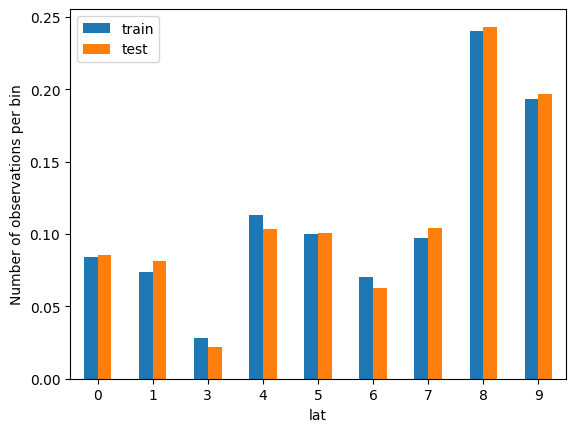

In [338]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# lat
# calculate proportion of observations per interval
t1 = train_mtd_1.groupby(['lat'])['lat'].count() / len(train_mtd_1)
t2 = test_mtd_1.groupby(['lat'])['lat'].count() / len(test_mtd_1)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

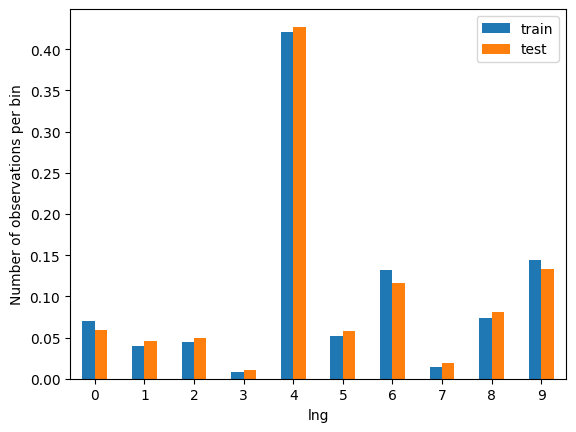

In [339]:
# lng

t1 = train_mtd_1.groupby(['lng'])['lng'].count() / len(train_mtd_1)
t2 = test_mtd_1.groupby(['lng'])['lng'].count() / len(test_mtd_1)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

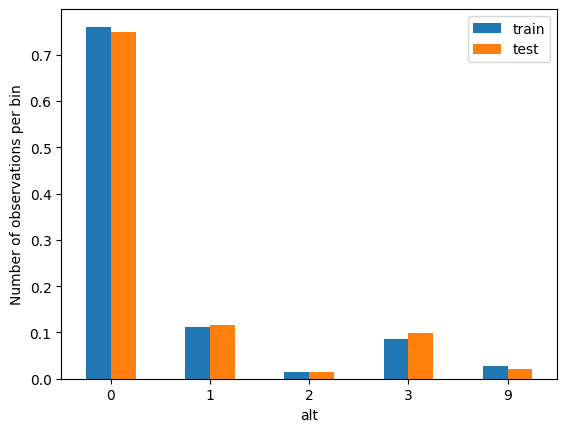

In [340]:
# alt

t1 = train_mtd_1.groupby(['alt'])['alt'].count() / len(train_mtd_1)
t2 = test_mtd_1.groupby(['alt'])['alt'].count() / len(test_mtd_1)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Method 2: Sorting the Continuous Numerical Variables Values in Intervals of Equal Frequency

Equal-frequency discretization divides the values of the variable into intervals that carry the same proportion of observations. The interval width is determined by quantiles, and therefore different intervals may have different widths. 

In summary, equal-frequency discretization using quantiles consists of dividing the continuous variable into N quantiles, with N to be defined by the user. This discretization technique is particularly useful for skewed variables as it spreads the observations over the different bins equally. 

### Equal-Frequency Discretization with Feature-engine

In [341]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(q=10, variables = ['lat', 'lng', 'alt'])

disc.fit(X_train_final_enc)

EqualFrequencyDiscretiser(variables=['lat', 'lng', 'alt'])

In [342]:
# in the binner dict, we can see the limits of the intervals
# for each variable

disc.binner_dict_

{'lat': [-inf,
  1.4605483080880883,
  45.79937387723302,
  54.897327152148904,
  70.53597193596374,
  84.96671671901358,
  92.94557985218133,
  98.5377100068285,
  103.17844795997188,
  111.97518555500739,
  inf],
 'lng': [-inf,
  -73.5228,
  -1.01694,
  5.97139,
  7.42056,
  14.7647,
  39.9578,
  50.5106,
  101.738,
  126.417,
  inf],
 'alt': [-inf, 3.0, 7.0, 10.0, 18.0, 45.0, 153.0, 162.0, 264.0, 678.0, inf]}

In [343]:
# transform train and test sets

train_mtd_2 = disc.transform(X_train_final_enc)
test_mtd_2 = disc.transform(X_test_final_enc)

Text(0, 0.5, 'Number of observations per bin')

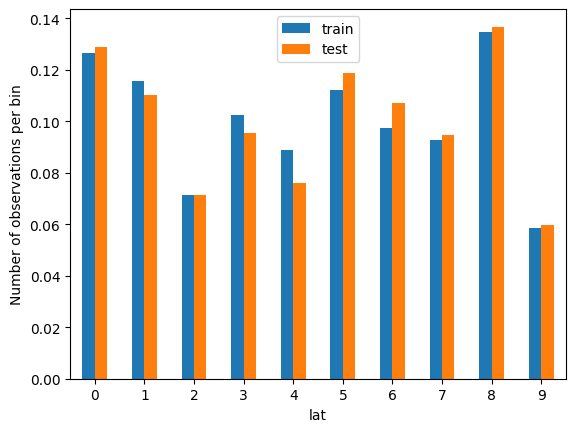

In [344]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# lat
# calculate proportion of observations per interval
t1 = train_mtd_2.groupby(['lat'])['lat'].count() / len(train_mtd_2)
t2 = test_mtd_2.groupby(['lat'])['lat'].count() / len(test_mtd_2)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

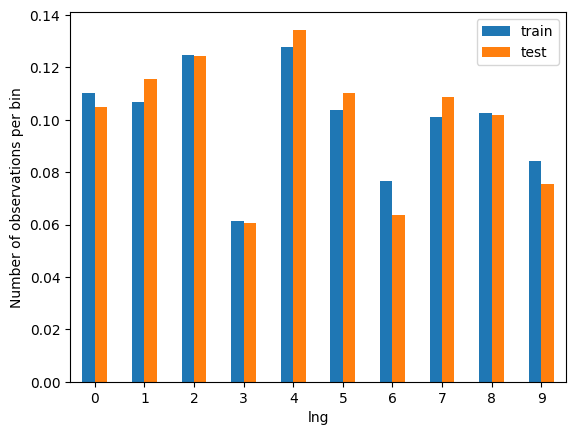

In [345]:
# lng

t1 = train_mtd_2.groupby(['lng'])['lng'].count() / len(train_mtd_2)
t2 = test_mtd_2.groupby(['lng'])['lng'].count() / len(test_mtd_2)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

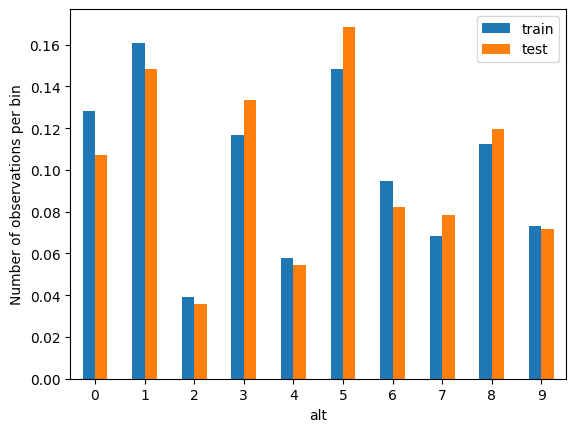

In [346]:
# alt

t1 = train_mtd_2.groupby(['alt'])['alt'].count() / len(train_mtd_2)
t2 = test_mtd_2.groupby(['alt'])['alt'].count() / len(test_mtd_2)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Method 3: Performing Discretization followed by Categorical Encoding

After discretization, the intervals of the variable can be treated as a discrete numerical variable, or as categories in a categorical variable. If treated as categorical, we can follow up the discretization by reordering the intervals according to the target value, as we did in the Encoding with integers in an ordered manner recipe in Method 6 of Step 5: Categorical Data Encoding to create a monotonic relationship between the intervals and the target. 

### Equal-Frequency Discretization with Feature-engine

In [347]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(
    q=10, variables=['lat', 'lng', 'alt'], return_object=True)

disc.fit(X_train_final_enc)

EqualFrequencyDiscretiser(return_object=True, variables=['lat', 'lng', 'alt'])

In [348]:
X_train_final_enc.dtypes

race_name                         float64
circuit_name                      float64
location                          float64
country                           float64
lat                               float64
                                   ...   
driver_name_Nick Heidfeld           int32
driver_name_Michael Schumacher      int32
driver_name_Brendon Hartley         int32
driver_name_Yuki Tsunoda            int32
driver_name_Alexander Rossi         int32
Length: 73, dtype: object

In [349]:
# transform train and test

train_mtd_3 = disc.transform(X_train_final_enc)
test_mtd_3 = disc.transform(X_test_final_enc)

In [350]:
train_mtd_3.dtypes

race_name                         float64
circuit_name                      float64
location                          float64
country                           float64
lat                                object
                                   ...   
driver_name_Nick Heidfeld           int32
driver_name_Michael Schumacher      int32
driver_name_Brendon Hartley         int32
driver_name_Yuki Tsunoda            int32
driver_name_Alexander Rossi         int32
Length: 73, dtype: object

In [351]:
train_mtd_3[['lat', 'lng', 'alt']]

,lat,lng,alt
674,5,2,5
2427,4,9,4
3100,2,6,1
3430,3,0,6
3059,2,6,1
...,...,...,...
1033,6,0,3
3264,8,4,5
1653,8,5,7
2607,2,7,7


Text(0, 0.5, 'lap')

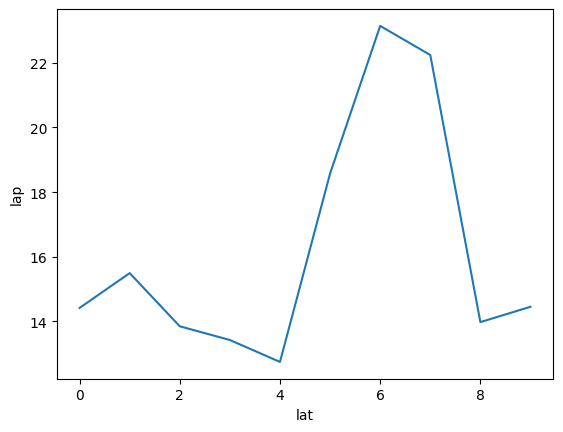

In [352]:
# let's explore if the bins have a linear relationship with the target

# plotting the variable 'lat' vs the target 'lap'
pd.concat([train_mtd_3, y_train], axis=1).groupby('lat')['lap'].mean().plot()
plt.ylabel('lap')

From the graph above, the bins of lat Variable do not have a linear relationship with the target.

Text(0, 0.5, 'lap')

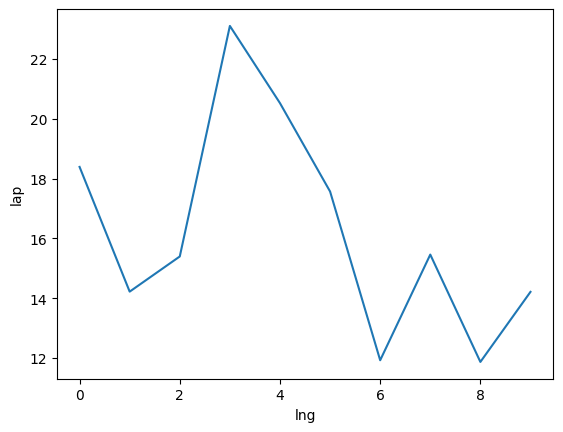

In [353]:
# plotting the variable 'lng' vs the target 'lap'
pd.concat([train_mtd_3, y_train], axis=1).groupby('lng')['lap'].mean().plot()
plt.ylabel('lap')

From the graph above, the bins of lng Variable do not have a linear relationship with the target.

Text(0, 0.5, 'lap')

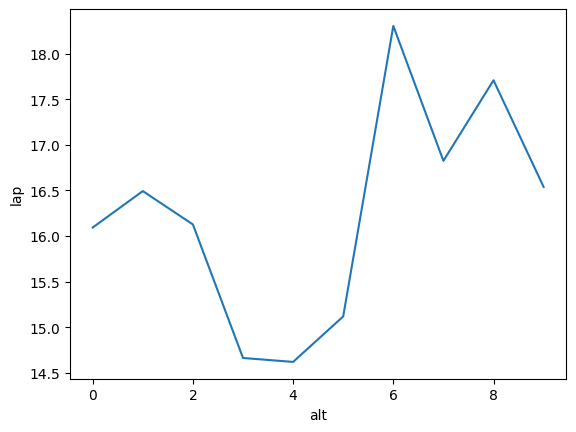

In [354]:
# plotting the variable 'alt' vs the target 'lap'
pd.concat([train_mtd_3, y_train], axis=1).groupby('alt')['lap'].mean().plot()
plt.ylabel('lap')

From the graph above, the bins of alt Variable do have a linear relationship with the target.

In [355]:
# let's order lat, lng, alt bins to obtain the monotonic relationship between bins and target

enc = OrdinalEncoder(encoding_method = 'ordered',
                     variables= ['lat', 'lng', 'alt'])  


enc.fit(train_mtd_3, y_train)

OrdinalEncoder(variables=['lat', 'lng', 'alt'])

In [356]:
# we can fnd the list of encoded variables here
enc.variables

['lat', 'lng', 'alt']

In [357]:
# we can find a list of the re-ordered bins mappings here
enc.encoder_dict_

{'lat': {4: 0, 3: 1, 2: 2, 8: 3, 0: 4, 9: 5, 1: 6, 5: 7, 7: 8, 6: 9},
 'lng': {8: 0, 6: 1, 9: 2, 1: 3, 2: 4, 7: 5, 5: 6, 0: 7, 4: 8, 3: 9},
 'alt': {4: 0, 3: 1, 5: 2, 0: 3, 2: 4, 1: 5, 9: 6, 7: 7, 8: 8, 6: 9}}

In [358]:
# let's transform the data sets
train_final_mtd_3 = enc.transform(train_mtd_3)
test_final_mtd_3 = enc.transform(test_mtd_3)

Text(0, 0.5, 'lat')

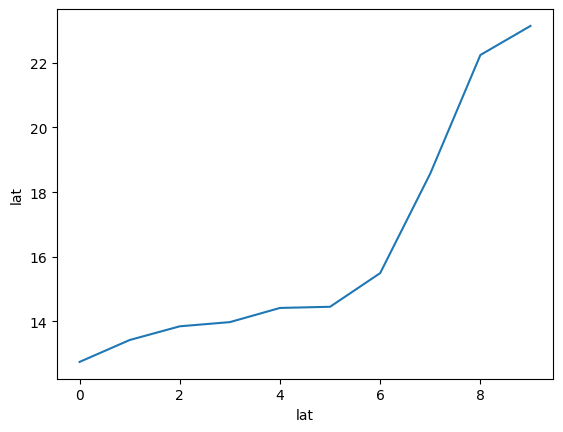

In [359]:
# let's explore the monotonic relationship between bins and target

# plotting the variable 'lat' vs the target 'lap'
pd.concat([train_final_mtd_3, y_train], axis=1).groupby('lat')['lap'].mean().plot()
plt.ylabel('lat')

Text(0, 0.5, 'lap')

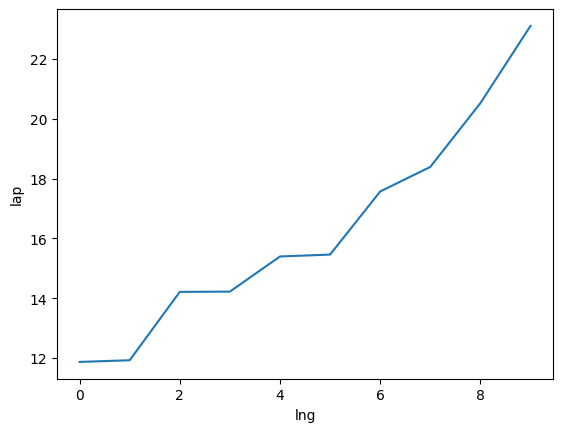

In [360]:
# plotting the variable 'lng' vs the target 'lap'
pd.concat([train_final_mtd_3, y_train], axis=1).groupby('lng')['lap'].mean().plot()
plt.ylabel('lap')

Text(0, 0.5, 'lap')

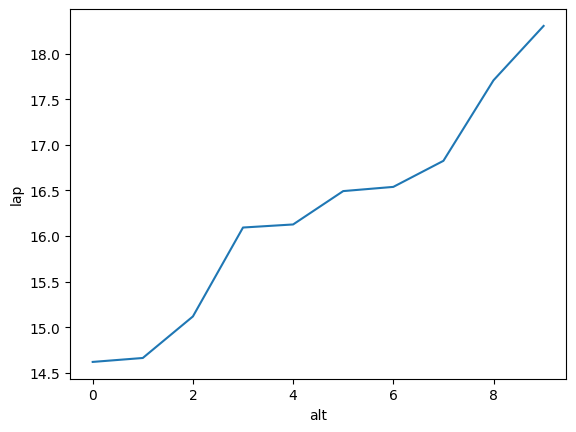

In [361]:
# plotting the variable 'alt' vs the target 'lap'
pd.concat([train_final_mtd_3, y_train], axis=1).groupby('alt')['lap'].mean().plot()
plt.ylabel('lap')

### Method 4: Allocating the Variable Values in Arbitrary Intervals

In the previous methods, we have created intervals based on variable values and distribution. Sometimes, however, users want to divide the variables into intervals, the boundaries of which are arbitrarily determined by the user. 

This method is able to discretize a variable into user pre-defined intervals using pandas.

First I need to determine the Interval Edges or Limits of lat, lng, alt Variables.

<Axes: >

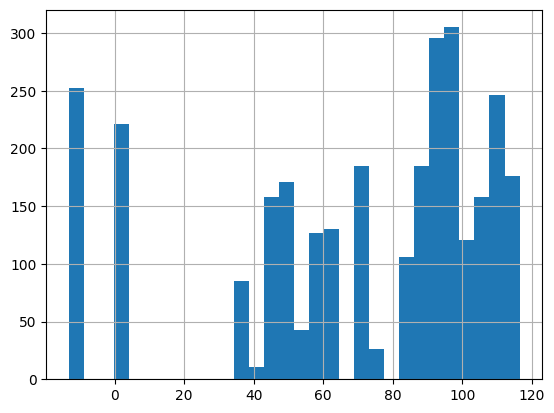

In [362]:
# let's plot a histogram to understand the value range of the variable lat

X_train_final_enc['lat'].hist(bins=30)

<Axes: >

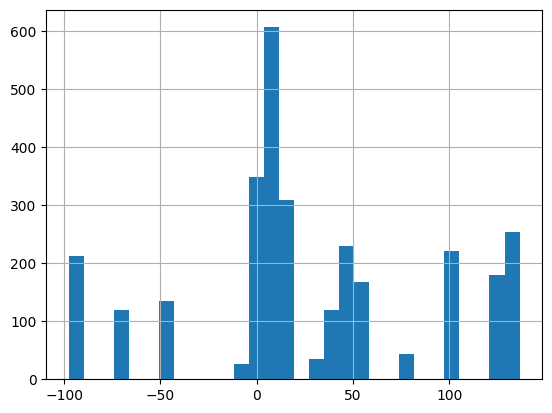

In [363]:
# let's plot a histogram to understand the value range of the variable lng

X_train_final_enc['lng'].hist(bins=30)

<Axes: >

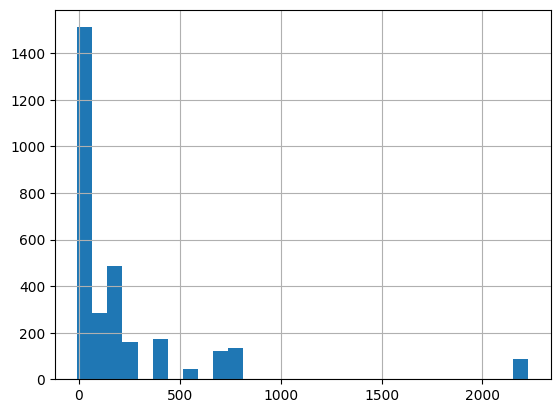

In [364]:
# let's plot a histogram to understand the value range of the variable alt

X_train_final_enc['alt'].hist(bins=30)

### Arbitrary Interval Width Discretization with Pandas on lat and lng Variable

I would only be using this method on lat and lng Variables as the value range of alt Variable is too big to use Arbitrary Interval Width Discretization.

### Arbitrary Interval Width Discretization with Pandas on lat Variable

In [365]:
# bin boundaries - we will use with pandas cut()
intervals = [-100, -50, 0, 50, 100, np.Inf]

# bin labels - we will use with pandas cut()

labels = ['(-100)-(-50)', '(-50)-0', '0-50', '50-100', '>100']

In [366]:
# discretize lat Variable

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
X_train['lat_labels'] = pd.cut(
    X_train_final_enc['lat'], bins=intervals, labels=labels, include_lowest=True)

# let's create a version of the discretized variable where the values are
# the interval limits
X_train['lat_intervals'] = pd.cut(
    X_train_final_enc['lat'], bins=intervals, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(X_train[['lat', 'lat_labels', 'lat_intervals']].head())

            lat lat_labels  lat_intervals
674   88.099370     50-100  (50.0, 100.0]
2427  70.811669     50-100  (50.0, 100.0]
3100  49.428265       0-50    (0.0, 50.0]
3430  59.186889     50-100  (50.0, 100.0]
3059  49.428265       0-50    (0.0, 50.0]


In [367]:
# let's check the number of observations per bin

X_train['lat_intervals'].value_counts()

(50.0, 100.0]        1403
(100.0, inf]          701
(0.0, 50.0]           646
(-50.0, 0.0]          252
(-100.001, -50.0]       0
Name: lat_intervals, dtype: int64

### Arbitrary Interval Width Discretization with Pandas on Ing Variable

In [368]:
# bin boundaries - we will use with pandas cut()
intervals = [-100, -50, 0, 50, 100, np.Inf]

# bin labels - we will use with pandas cut()

labels = ['(-100)-(-50)', '(-50)-0', '0-50', '50-100', '>100']

In [369]:
# discretize lng Variable

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
X_train['lng_labels'] = pd.cut(
    X_train_final_enc['lng'], bins=intervals, labels=labels, include_lowest=True)

# let's create a version of the discretized variable where the values are
# the interval limits
X_train['lng_intervals'] = pd.cut(
    X_train_final_enc['lng'], bins=intervals, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(X_train[['lng', 'lng_labels', 'lng_intervals']].head())

            lng    lng_labels      lng_intervals
674     2.26111          0-50        (0.0, 50.0]
2427  136.54100          >100       (100.0, inf]
3100   50.51060        50-100      (50.0, 100.0]
3430  -97.64110  (-100)-(-50)  (-100.001, -50.0]
3059   50.51060        50-100      (50.0, 100.0]


In [370]:
# let's check the number of observations per bin

X_train['lng_intervals'].value_counts()

(0.0, 50.0]          1287
(100.0, inf]          654
(50.0, 100.0]         372
(-50.0, 0.0]          358
(-100.001, -50.0]     331
Name: lng_intervals, dtype: int64

### Decision on the Ideal Method to Bin lat Variable 

After trying all the different above available methods to Bin lat Variable, I decided to use Method 1: Dividing the Continuous Numerical Variables into Intervals of Equal Width and followed by Method 3: Performing Discretization followed by Categorical Encoding to Bin lat Variable.

This is because... 

1. Comparing Method 1 to Method 3, Method 3 performs Discretization followed by Categorical Encoding while Method 1 only perfoms Discretization. After discretization, the intervals of the variable can be treated as a discrete numerical variable, or as categories in a categorical variable. For me, I decided to treat the intervals of lat variable as a discrete numerical variable. This is so that it will create a monotonic relationship between the intervals and the target. This is useful for data modelling later on. Thus, since I am treating lat as categorical, I need to use Method 3 which is to follow up the discretization by reordering the intervals according to the target value. 


2. When I am using Method 3 to Bin lat Variable, I realised that the bins of lat Variable do not have a linear relationship with the target when using Method 2 in Method 3 to perform Discretization on lat Variable. Since lat Variable do not have a linear relationship with the target when using Method 2 in Method 3 to perform Discretization on lat Variable, it is necessary to do Categorical Encoding after performing Discretization to create a monotonic relationship between the intervals and the target.


3. When using Method 4: Allocating the Variable Values in Arbitrary Intervals, I needed to spend more time to determine the interval limits of lat Variable before binning lat Variable. Even after spending time to determine the interval limits of lat Variable, the number of bins I determined for lat Variable is a little bit too less and it may affect the model performance. In addition, I needed to code extra lines of codes to Bin lat Variable as method 4 allows users to arbitrarily divide the variables into intervals that they would want. With more lines of codes, it is more time-consuming and increases the processing time of the Jupyter Notebook. 

### Decision on the Ideal Method to Bin lng Variable 

After trying all the different above available methods to Bin lng Variable, I decided to use Method 1: Dividing the Continuous Numerical Variables into Intervals of Equal Width and followed by Method 3: Performing Discretization followed by Categorical Encoding to Bin lng Variable.

This is because... 

1. Comparing Method 1 to Method 3, Method 3 performs Discretization followed by Categorical Encoding while Method 1 only perfoms Discretization. After discretization, the intervals of the variable can be treated as a discrete numerical variable, or as categories in a categorical variable. For me, I decided to treat the intervals of lng variable as a discrete numerical variable. This is so that it will create a monotonic relationship between the intervals and the target. This is useful for data modelling later on. Thus, since I am treating lat as categorical, I need to use Method 3 which is to follow up the discretization by reordering the intervals according to the target value. 


2. When I am using Method 3 to Bin lng Variable, I realised that the bins of lng Variable do not have a linear relationship with the target when using Method 2 in Method 3 to perform Discretization on lat Variable. Since lng Variable do not have a linear relationship with the target when using Method 2 in Method 3 to perform Discretization on lng Variable, it is necessary to do Categorical Encoding after performing Discretization to create a monotonic relationship between the intervals and the target.


3. When using Method 4: Allocating the Variable Values in Arbitrary Intervals, I needed to spend more time to determine the interval limits of lng Variable before binning lng Variable. Even after spending time to determine the interval limits of lng Variable, the number of bins I determined for lng Variable is a little bit too less and it may affect the model performance. In addition, I needed to code extra lines of codes to Bin lng Variable as method 4 allows users to arbitrarily divide the variables into intervals that they would want. With more lines of codes, it is more time-consuming and increases the processing time of the Jupyter Notebook. 

 ### Decision on the Ideal Method to Bin alt Variable 

After trying all the different above available methods to Bin alt Variable, I decided to use Method 1: Dividing the Continuous Numerical Variables into Intervals of Equal Width and followed by Method 3: Performing Discretization followed by Categorical Encoding to Bin alt Variable.

This is because...

1. Comparing Method 1 to Method 3, Method 3 performs Discretization followed by Categorical Encoding while Method 1 only perfoms Discretization. After discretization, the intervals of the variable can be treated as a discrete numerical variable, or as categories in a categorical variable. For me, I decided to treat the intervals of alt variable as a discrete numerical variable. This is so that it will create a monotonic relationship between the intervals and the target. This is useful for data modelling later on. Thus, since I am treating alt as categorical, I need to use Method 3 which is to follow up the discretization by reordering the intervals according to the target value. 


2. When I am using Method 3 to Bin alt Variable, I realised that the bins of alt Variable do not have a linear relationship with the target when using Method 2 in Method 3 to perform Discretization on alt Variable. Since alt Variable do not have a linear relationship with the target when using Method 2 in Method 3 to perform Discretization on Item_Visibility Variable, it is necessary to do Categorical Encoding after performing Discretization to create a monotonic relationship between the intervals and the target.


3. Method 4 is about Allocating the Variable Values in Arbitrary Intervals. As mentioned earlier, I could not use this method on alt variable as the value range of alt Variable is too hug to use Arbitrary Interval Width Discretization.

In [371]:
# Based on the above decisions, I would:

# Perform Discretization by Dividing the Continuous Numerical Variables into Intervals of Equal Width (Method 1) 
# followed by Categorical Encoding (Method 3)
# to Bin lat, lng, alt Variables

In [372]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins=10, variables = ['lat', 'lng', 'alt'], return_object=True)

disc.fit(X_train_final_enc)

EqualWidthDiscretiser(return_object=True, variables=['lat', 'lng', 'alt'])

In [373]:
# the limits of the intervals are stored in the binner_dict_

disc.binner_dict_

{'lat': [-inf,
  -0.25244018378711885,
  12.722080810315802,
  25.696601804418727,
  38.671122798521644,
  51.64564379262456,
  64.62016478672749,
  77.59468578083042,
  90.56920677493332,
  103.54372776903625,
  inf],
 'lng': [-inf,
  -74.22288999999999,
  -50.80468,
  -27.386470000000003,
  -3.968260000000001,
  19.44995,
  42.86815999999999,
  66.28637,
  89.70457999999999,
  113.12278999999998,
  inf],
 'alt': [-inf,
  216.4,
  439.8,
  663.2,
  886.6,
  1110.0,
  1333.4,
  1556.8,
  1780.2,
  2003.6000000000001,
  inf]}

In [374]:
X_train_final_enc.dtypes

race_name                         float64
circuit_name                      float64
location                          float64
country                           float64
lat                               float64
                                   ...   
driver_name_Nick Heidfeld           int32
driver_name_Michael Schumacher      int32
driver_name_Brendon Hartley         int32
driver_name_Yuki Tsunoda            int32
driver_name_Alexander Rossi         int32
Length: 73, dtype: object

In [375]:
# transform train and test

train_mtd_3 = disc.transform(X_train_final_enc)
test_mtd_3 = disc.transform(X_test_final_enc)

In [376]:
train_mtd_3.dtypes

race_name                         float64
circuit_name                      float64
location                          float64
country                           float64
lat                                object
                                   ...   
driver_name_Nick Heidfeld           int32
driver_name_Michael Schumacher      int32
driver_name_Brendon Hartley         int32
driver_name_Yuki Tsunoda            int32
driver_name_Alexander Rossi         int32
Length: 73, dtype: object

In [377]:
train_mtd_3[['lat', 'lng', 'alt']]

,lat,lng,alt
674,7,4,0
2427,6,9,0
3100,4,6,0
3430,5,0,0
3059,4,6,0
...,...,...,...
1033,8,1,0
3264,9,4,0
1653,9,4,1
2607,5,7,0


Text(0, 0.5, 'Number of observations per bin')

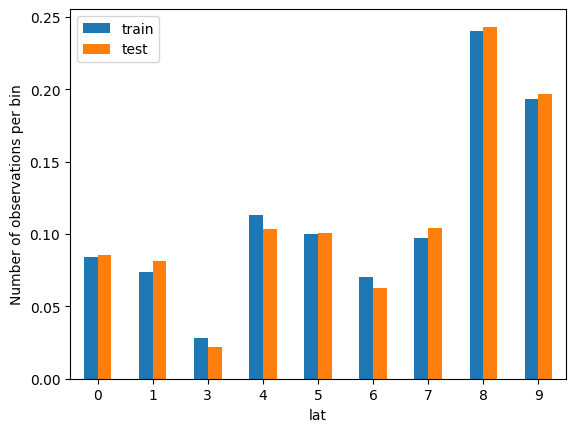

In [378]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# lat
# calculate proportion of observations per interval
t1 = train_mtd_3.groupby(['lat'])['lat'].count() / len(train_mtd_3)
t2 = test_mtd_3.groupby(['lat'])['lat'].count() / len(test_mtd_3)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

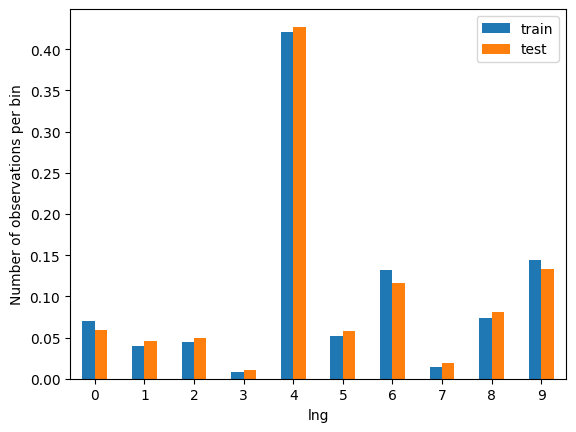

In [379]:
# lng

t1 = train_mtd_3.groupby(['lng'])['lng'].count() / len(train_mtd_3)
t2 = test_mtd_3.groupby(['lng'])['lng'].count() / len(test_mtd_3)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

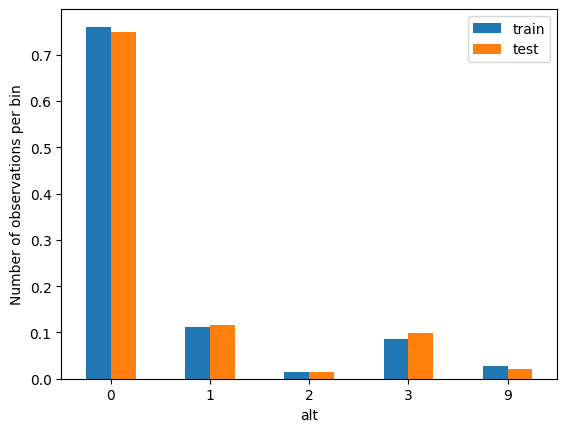

In [380]:
# alt

t1 = train_mtd_3.groupby(['alt'])['alt'].count() / len(train_mtd_3)
t2 = test_mtd_3.groupby(['alt'])['alt'].count() / len(test_mtd_3)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'lap')

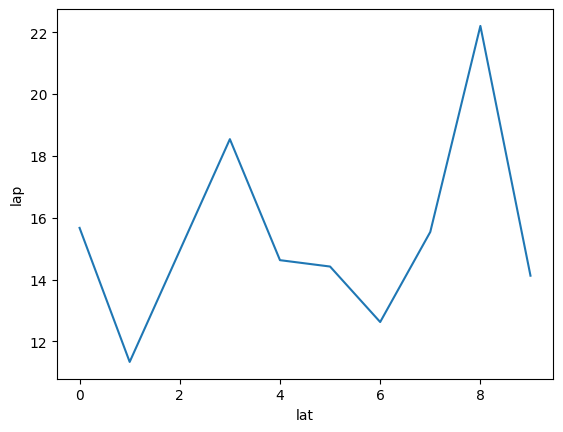

In [381]:
# let's explore if the bins have a linear relationship with the target

# plotting the variable 'lat' vs the target 'lap'
pd.concat([train_mtd_3, y_train], axis=1).groupby('lat')['lap'].mean().plot()
plt.ylabel('lap')

From the graph above, the bins of lat Variable do not have a linear relationship with the target.

Text(0, 0.5, 'lap')

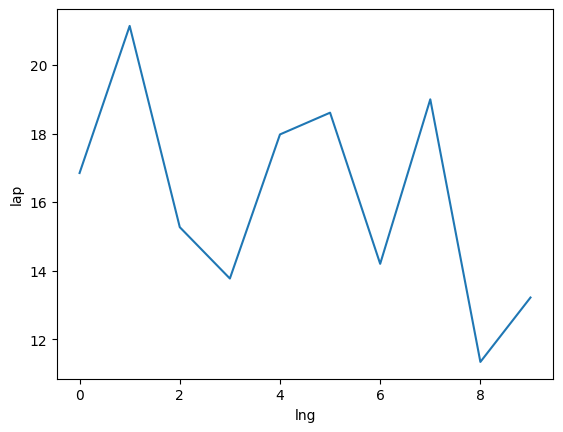

In [382]:
# plotting the variable 'lng' vs the target 'lap'
pd.concat([train_mtd_3, y_train], axis=1).groupby('lng')['lap'].mean().plot()
plt.ylabel('lap')

From the graph above, the bins of lng Variable do not have a linear relationship with the target.

Text(0, 0.5, 'lap')

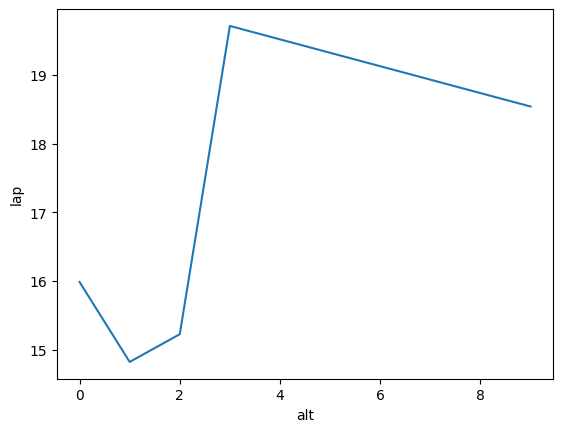

In [383]:
# plotting the variable 'alt' vs the target 'lap'
pd.concat([train_mtd_3, y_train], axis=1).groupby('alt')['lap'].mean().plot()
plt.ylabel('lap')

From the graph above, the bins of alt Variable do not have a linear relationship with the target.

In [384]:
# let's order lat, lng and alt bins to obtain the monotonic relationship between bins and target

enc = OrdinalEncoder(encoding_method = 'ordered',
                     variables= ['lat', 'lng', 'alt'])  

enc.fit(train_mtd_3, y_train)

OrdinalEncoder(variables=['lat', 'lng', 'alt'])

In [385]:
# we can fnd the list of encoded variables here
enc.variables

['lat', 'lng', 'alt']

In [386]:
# we can find a list of the re-ordered bins mappings here
enc.encoder_dict_

{'lat': {1: 0, 6: 1, 9: 2, 5: 3, 4: 4, 7: 5, 0: 6, 3: 7, 8: 8},
 'lng': {8: 0, 9: 1, 3: 2, 6: 3, 2: 4, 0: 5, 4: 6, 5: 7, 7: 8, 1: 9},
 'alt': {1: 0, 2: 1, 0: 2, 9: 3, 3: 4}}

In [387]:
# let's transform the data sets
X_train_final_bin = enc.transform(train_mtd_3)
X_test_final_bin = enc.transform(test_mtd_3)

Text(0, 0.5, 'lap')

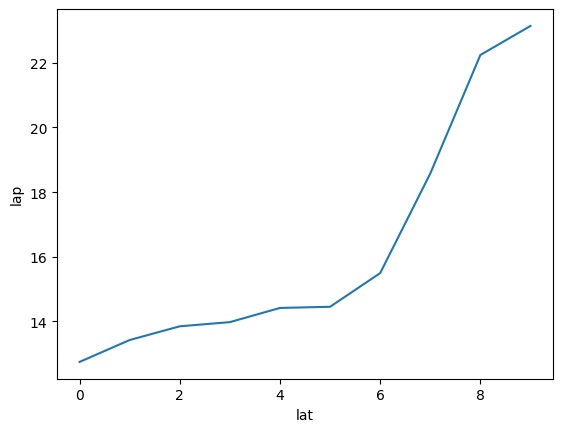

In [388]:
# let's explore the monotonic relationship between bins and target

# plotting the variable 'lat' vs the target 'lap'
pd.concat([train_final_mtd_3, y_train], axis=1).groupby('lat')['lap'].mean().plot()
plt.ylabel('lap')

Text(0, 0.5, 'lap')

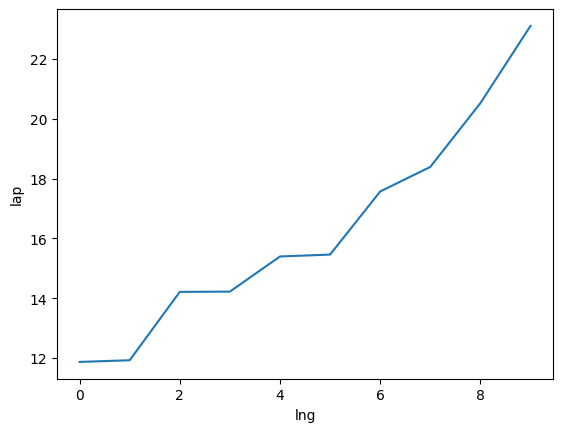

In [389]:
# plotting the variable 'lng' vs the target 'lap'
pd.concat([train_final_mtd_3, y_train], axis=1).groupby('lng')['lap'].mean().plot()
plt.ylabel('lap')

Text(0, 0.5, 'lap')

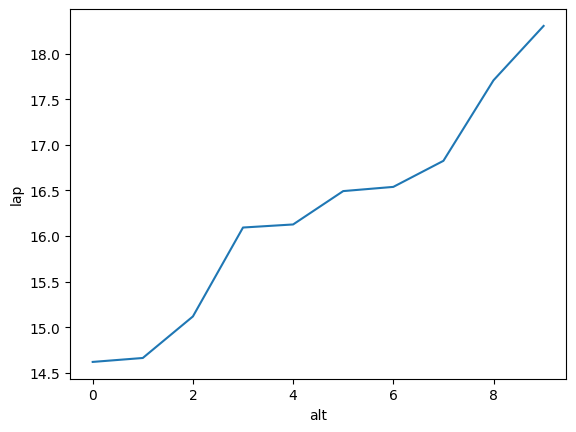

In [390]:
# plotting the variable 'alt' vs the target 'lap'
pd.concat([train_final_mtd_3, y_train], axis=1).groupby('alt')['lap'].mean().plot()
plt.ylabel('lap')

I would now be using 'X_train_final_bin' and 'X_test_final_bin' instead of 'X_train_final_enc' and 'X_test_final_enc' for the remaining steps.

### Step 4: Machine Learning Modelling

In [391]:
# Displaying the no. of rows and columns in X_train_final_bin in the format of (no. of rows, no. of columns)
print(X_train_final_bin.shape) 

(3002, 73)


### Building a Naive Baseline Model

#### Changing y_trains's Lap's int64 Data Type to float Data Type

In [392]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

16.235176548967356
The train mean target value is 16.24.


In [393]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_final_bin.iloc[:,0]]
y_train_preds_naive[0:5]

[16.24, 16.24, 16.24, 16.24, 16.24]

In [394]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_final_bin.iloc[:,0]]
y_test_preds_naive[0:5]

[16.24, 16.24, 16.24, 16.24, 16.24]

In [395]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 100.90.
The Naive Baseline Model's MSE on test data is 101.62.

The Naive Baseline Model's RMSE on train data is 10.04.
The Naive Baseline Model's RMSE on test data is 10.08.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


### Building a Simple Machine Learning Model

The simple machine learning model that I would be building is Linear Regression.

### Linear Regression

In [396]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train_final_bin, y_train)

In [397]:
y_train_preds_linreg = linreg.predict(X_train_final_bin)
y_test_preds_linreg = linreg.predict(X_test_final_bin)

In [398]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")

The LinReg Model's MSE on train data is 78.1010.
The LinReg Model's MSE on test data is 83.6824.

The LinReg Model's RMSE on train data is 8.8375.
The LinReg Model's RMSE on test data is 9.1478.

The LinReg Model's R2 on train data is 0.2259.
The LinReg Model's R2 on test data is 0.1765.


I am happy with my model performance.

### Report

Due to time constraint, my report is written together with the codes. Please refer to the codes.